In [1]:
import os
import datetime
import time
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch_geometric.loader.dataloader import DataLoader
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR

from torch_geometric.data import Data
import torch_geometric
import networkx as nx

from sklearn.model_selection import train_test_split

from ClusterDatasetTransformer import ClusterDataset
from train_transformer import *
from data_statistics import *

from IPython.display import display

from Transformer import Transformer
from lang import Lang
from LossFunction import Loss

In [2]:
# CUDA Setup
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


In [3]:
input_length = 60
max_seq_length = 60
batch_size = 64
max_nodes = 66

In [4]:
converter = Lang(max_nodes)
vocab_size = converter.n_words

In [5]:
# Load the dataset
hist_folder = "/eos/user/c/czeh/histo/"
data_folder_training = "/eos/user/c/czeh/graph_data/processed"
store_folder_training = "/eos/user/c/czeh/graph_data_trans"
data_folder_test = "/eos/user/c/czeh/graph_data_test/processed"
store_folder_test = "/eos/user/c/czeh/graph_data_trans_test"

model_folder = "/eos/user/c/czeh/model"
dataset_training = ClusterDataset(converter, store_folder_training, data_folder_training, max_nodes=max_nodes, input_length=input_length)
dataset_test = ClusterDataset(converter, store_folder_test, data_folder_test, max_nodes=max_nodes, input_length=input_length)

Processing...


/eos/user/c/czeh/graph_data_trans/raw/data_id_0.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([5, 6, 7, 8])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([6, 7, 8])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([7, 8])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 7])
tensor([7])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9,
        12, 14, 16, 10,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  7, 13])
tensor([13])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  7, 13, 15])
tensor([15])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 17,
        10, 11, 14, 15, 26,  7,  9, 18, 21,  3, 13, 27, 28, 31,  5,  6,  8, 12,
        16, 20, 23, 24, 25, 29])
tensor([19, 22, 29, 30, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 17, 10,
        11, 14, 15, 26,  7,  9, 18, 21,  3, 13, 27, 28, 31,  5,  6,  8, 12, 16,
        20, 23, 24, 25, 29, 32])
tensor([19, 22, 30, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 17, 10, 11,
        14, 15, 26,  7,  9, 18, 21,  3, 13, 27, 28, 31,  5,  6,  8, 12, 16, 20,
        23, 24, 25, 29, 32, 19])
tensor([19, 22, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 28, 29, 39, 36, 38, 25,
        31, 41, 42, 43, 30, 32, 37,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        15, 16, 18, 19, 20, 22])
tensor([14, 17, 22, 23, 24, 26, 27, 33, 34, 35, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 28, 29, 39, 36, 38, 25, 31,
        41, 42, 43, 30, 32, 37,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15,
        16, 18, 19, 20, 22, 23])
tensor([14, 17, 23, 24, 26, 27, 33, 34, 35, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 28, 29, 39, 36, 38, 25, 31, 41,
        42, 43, 30, 32, 37,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16,
        18, 19, 20, 22, 23, 24])
tensor([14, 17, 24, 26, 27, 33, 34, 35, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 19, 21, 29, 14, 16, 17, 20, 22, 30, 31, 23, 24,
        25, 26, 28,  3,  4,  5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 18, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 19, 21, 29, 14, 16, 17, 20, 22, 30, 31, 23, 24, 25,
        26, 28,  3,  4,  5,  6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 15, 18, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 19, 21, 29, 14, 16, 17, 20, 22, 30, 31, 23, 24, 25, 26,
        28,  3,  4,  5,  6,  7])
tensor([ 7,  8,  9, 10, 11, 12, 13, 15, 18, 27])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 11, 12,
        14, 15, 20, 21, 25, 27])
tensor([ 6, 13, 19, 24, 26, 27, 31, 32, 35, 36, 39, 40, 41, 42, 43, 44, 45, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 11, 12, 14,
        15, 20, 21, 25, 27, 31])
tensor([ 6, 13, 19, 24, 26, 31, 32, 35, 36, 39, 40, 41, 42, 43, 44, 45, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 11, 12, 14, 15,
        20, 21, 25, 27, 31, 32])
tensor([ 6, 13, 19, 24,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  7,  8,  9, 10, 11, 12, 14, 15, 20, 21, 25, 27, 31, 32, 39, 41, 42,
        44, 45, 54, 13, 19, 26, 40, 35, 24, 36,  6, 43,  3, 22, 30, 48, 29, 38,
        46, 53, 16, 17, 23, 37])
tensor([18, 33, 34, 37, 47, 49, 50, 51, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  8,  9, 10, 11, 12, 14, 15, 20, 21, 25, 27, 31, 32, 39, 41, 42, 44,
        45, 54, 13, 19, 26, 40, 35, 24, 36,  6, 43,  3, 22, 30, 48, 29, 38, 46,
        53, 16, 17, 23, 37, 47])
tensor([18, 33, 34, 47, 49, 50, 51, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         8,  9, 10, 11, 12, 14, 15, 20, 21, 25, 27, 31, 32, 39, 41, 42, 44, 45,
        54, 13, 19, 26, 40, 35, 24, 36,  6, 43,  3, 22, 30, 48, 29, 38, 46, 53,
        16, 17, 23, 37, 47, 49])
tensor([18, 33, 34, 49, 50, 51, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  9,
        15, 16, 22, 26, 28, 33, 43, 45, 51, 57, 58, 59, 61, 30, 11, 48, 46, 17,
         3,  5, 34, 20, 31, 36])
tensor([ 8, 10, 12, 13, 14, 18, 19, 21, 24, 25, 27, 29, 32, 35, 36, 37, 38, 39,
        40, 41, 44, 47, 49, 50, 52, 53, 54, 55, 56, 60])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  9, 15,
        16, 22, 26, 28, 33, 43, 45, 51, 57, 58, 59, 61, 30, 11, 48, 46, 17,  3,
         5, 34, 20, 31, 36, 21])
tensor([ 8, 10, 12, 13, 14, 18, 19, 21, 24, 25, 27, 29, 32, 35, 37, 38, 39, 40,
        41, 44, 47, 49, 50, 52, 53, 54, 55, 56, 60])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  9, 15, 16,
        22, 26, 28, 33, 

tensor([ 0,  1,  4,  6,  7,  9, 15, 16, 22, 26, 28, 33, 43, 45, 51, 57, 58, 59,
        61, 30, 11, 48, 46, 17,  3,  5, 34, 20, 31, 36, 21, 27, 32, 38, 41, 12,
         8, 13, 24, 35, 37, 52, 53, 54, 60, 25, 14, 29, 40, 50, 56, 10, 18, 39,
        44, 47, 49, 19, 55,  3])
tensor([3])
in else
Stop
tensor([ 1,  4,  6,  7,  9, 15, 16, 22, 26, 28, 33, 43, 45, 51, 57, 58, 59, 61,
        30, 11, 48, 46, 17,  3,  5, 34, 20, 31, 36, 21, 27, 32, 38, 41, 12,  8,
        13, 24, 35, 37, 52, 53, 54, 60, 25, 14, 29, 40, 50, 56, 10, 18, 39, 44,
        47, 49, 19, 55,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 23,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_105.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 20, 26, 27, 28, 31, 32, 33, 35,
        40, 41, 45, 46, 50, 58, 59, 23, 37, 39, 55, 49, 43,  3, 25, 48, 17, 19,
        42, 13, 24,  8, 57,  7])
tensor([ 5,  6,  7,  9, 11, 12, 14, 15, 16, 18, 29, 30, 34, 36, 38, 44, 51, 53,
        54, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4, 10, 20, 26, 27, 28, 31, 32, 33, 35, 40,
        41, 45, 46, 50, 58, 59, 23, 37, 39, 55, 49, 43,  3, 25, 48, 17, 19, 42,
        13, 24,  8, 57,  7,  9])
tensor([ 5,  6,  9, 11, 12, 14, 15, 16, 18, 29, 30, 34, 36, 38, 44, 51, 53, 54,
        56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4, 10, 20, 26, 27, 28, 31, 32, 33, 35, 40, 41,
        45, 46, 50, 58, 59, 23, 37, 39, 55, 49, 43,  3, 25, 48, 17, 19, 42, 13,
        24,  8, 57,  7, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  9, 10, 11, 13, 14])
tensor([14, 15, 16, 17, 20, 21, 22, 23, 24, 28, 29, 30, 32, 33, 34, 35, 41, 42,
        43, 44, 45, 46, 47, 49, 50, 51, 52, 54, 55, 62])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         9, 10, 11, 13, 14, 15])
tensor([15, 16, 17, 20, 21, 22, 23, 24, 28, 29, 30, 32, 33, 34, 35, 41, 42, 43,
        44, 45, 46, 47, 49, 50, 51, 52, 54, 55, 62])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  7,  9, 10, 11, 13, 14, 15, 20, 21, 23, 28, 30,
        32, 33, 34, 35, 42, 44, 46, 47, 49, 50, 51, 55, 16, 22, 45, 17, 41, 43,
        24, 54, 29, 52, 62,  3])
tensor([3])
in else
1
[27 54 59  4  8 32 57  2 21 23 33 49 52 53 22 35 15 36 44 14]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  7,  9, 10, 11, 13, 14, 15, 20, 21, 23, 28, 30, 32,
        33, 34, 35, 42, 44, 46, 47, 49, 50, 51, 55, 16, 22, 45, 17, 41, 43, 24,
        54, 29, 52, 62,  3, 31])
tensor([31, 58, 63,  8, 12, 36, 61,  6, 25, 27, 37, 53, 56, 57, 26, 39, 19, 40,
        48, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  7,  9, 10, 11, 13, 14, 15, 20, 21, 23, 28, 30, 32, 33,
        34, 35, 42, 44, 46, 47, 49, 50, 51, 55, 16, 22, 45, 17, 41, 43, 24, 54,
        29, 52, 62,  3, 31, 58])


tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16])
tensor([ 5, 16, 17, 18, 19, 20, 23, 24, 29, 34, 35, 36, 39, 41, 44, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 18])
tensor([ 5, 17, 18, 19, 20, 23, 24, 29, 34, 35, 36, 39, 41, 44, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  8,  9, 10, 11, 12,
        13, 14, 15, 16, 18, 19])
tensor([ 5, 17, 19, 20, 23, 24, 29, 34,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20,
        23, 24, 29, 34, 35, 36, 39, 41, 44, 45,  5, 17,  3, 25, 26, 31, 38, 43,
        21, 22, 37, 46, 47, 28])
tensor([28, 30, 32, 33, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23,
        24, 29, 34, 35, 36, 39, 41, 44, 45,  5, 17,  3, 25, 26, 31, 38, 43, 21,
        22, 37, 46, 47, 28, 30])
tensor([30, 32, 33, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 23, 24,
        29, 34, 35, 36, 39, 41, 44, 45,  5, 17,  3, 25, 26, 31, 38, 43, 21, 22,
        37, 46, 47, 28, 30, 32])
tensor([32, 33, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  6,  7,  8,  9

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 12, 17,
        18, 19, 20, 21, 22, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 41, 24, 27,
        16, 23, 33, 42, 36,  3])
tensor([3])
in else
1
[ 2  5  9  4 28  6 10 24  3  7 11]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 12, 17, 18,
        19, 20, 21, 22, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 41, 24, 27, 16,
        23, 33, 42, 36,  3,  6])
tensor([ 6,  9, 13,  8, 32, 10, 14, 28,  7, 11, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 12, 17, 18, 19,
        20, 21, 22, 25, 26, 29, 30, 31, 34, 35, 37, 38, 39, 41, 24, 27, 16, 23,
        33, 42, 36,  3,  6,  9])
tensor([ 7,  8,  9, 10, 11, 13, 14, 15, 28, 32])
tensor([

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 38, 22, 23, 13, 16, 19, 28, 29, 39, 43, 17, 24, 34, 37,  3,  4,  6,
        14, 15, 18, 25, 26, 27])
tensor([ 5,  7,  8,  9, 10, 11, 12, 20, 21, 27, 30, 32, 33, 35, 36, 40, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        38, 22, 23, 13, 16, 19, 28, 29, 39, 43, 17, 24, 34, 37,  3,  4,  6, 14,
        15, 18, 25, 26, 27, 36])
tensor([ 5,  7,  8,  9, 10, 11, 12, 20, 21, 30, 32, 33, 35, 36, 40, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 38,
        22, 23, 13, 16, 19, 28, 29, 39, 43, 17, 24, 34, 37,  3,  4,  6, 14, 15,
        18, 25, 26, 27, 36, 41])
tensor([ 5,  7,  8,  9,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20,  7, 11, 17, 12,
        14, 10, 16, 18, 24, 25])
tensor([ 8,  9, 13, 15, 21, 22, 25, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20,  7, 11, 17, 12, 14,
        10, 16, 18, 24, 25, 26])
tensor([ 8,  9, 13, 15, 21, 22, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20,  7, 11, 17, 12, 14, 10,
        16, 18, 24, 25, 26,  9])
tensor([ 8,  9, 13, 15, 21, 22, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 12, 14, 16, 17, 19, 20,
        21, 22, 24, 26, 36, 41])
tensor([13, 15, 25, 31, 34, 41, 44, 45, 46, 48, 51, 53, 54, 55, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 12, 14, 16, 17, 19, 20, 21,
        22, 24, 26, 36, 41, 48])
tensor([13, 15, 25, 31, 34, 44, 45, 46, 48, 51, 53, 54, 55, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 12, 14, 16, 17, 19, 20, 21, 22,
        24, 26, 36, 41, 48, 51])
tensor([13, 15, 25, 31, 34, 44, 45, 46, 51, 53,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8,  9, 12, 14, 16, 17, 19, 20, 21, 22, 24, 26, 36, 41, 48, 51, 53, 54,
        55, 58, 25, 31, 45, 46, 34, 15, 44, 13,  3, 33, 28, 50, 11, 29, 10, 32,
        38, 39, 43, 62, 23, 27])
tensor([18, 27, 30, 37, 40, 42, 47, 49, 52, 57, 59, 60, 61, 63, 64])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 12, 14, 16, 17, 19, 20, 21, 22, 24, 26, 36, 41, 48, 51, 53, 54, 55,
        58, 25, 31, 45, 46, 34, 15, 44, 13,  3, 33, 28, 50, 11, 29, 10, 32, 38,
        39, 43, 62, 23, 27, 49])
tensor([18, 30, 37, 40, 42, 47, 49, 52, 57, 59, 60, 61, 63, 64])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9,
        12, 14, 16, 17, 19, 20, 21, 22, 24, 26, 36, 41, 48, 51, 53, 54, 55, 58,
        25, 31, 45, 46, 34, 15, 44, 13,  3, 33, 28, 50, 11, 29, 10, 32, 38, 39,
        43, 62, 23, 27, 49, 59])
tensor([18, 30, 37, 40, 42, 47, 52, 57, 59, 60,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19,  5, 11, 13, 14, 15,
        16, 21, 10, 12, 17, 18])
tensor([18, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19,  5, 11, 13, 14, 15, 16,
        21, 10, 12, 17, 18, 20])
tensor([20])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19,  5, 11, 13, 14, 15, 16, 21,
        10, 12, 17, 18, 20,  3])
tensor([3])
in else
1
[0 2 3 4 5]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 22, 15, 16, 17, 20, 11, 27,  6,  7,  9, 10, 12, 13, 18, 19, 23,
        26, 28, 29, 30, 32, 14])
tensor([14, 21, 24, 25, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 22, 15, 16, 17, 20, 11, 27,  6,  7,  9, 10, 12, 13, 18, 19, 23, 26,
        28, 29, 30, 32, 14, 21])
tensor([21, 24, 25, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        22, 15, 16, 17, 20, 11, 27,  6,  7,  9, 10, 12, 13, 18, 19, 23, 26, 28,
        29, 30, 32, 14, 21, 24])
tensor([24, 25, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  8,
         9, 10, 11, 12, 13, 14, 16, 18, 19, 25, 28, 32, 33, 34, 35, 37, 20, 22,
        23, 24, 36, 17, 27, 29])
tensor([15, 21, 26, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  8,  9,
        10, 11, 12, 13, 14, 16, 18, 19, 25, 28, 32, 33, 34, 35, 37, 20, 22, 23,
        24, 36, 17, 27, 29, 21])
tensor([15, 21, 26, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  8,  9, 10,
        11, 12, 13, 14, 16, 18, 19, 25, 28, 32, 33, 34, 35, 37, 20, 22, 23, 24,
        36, 17, 27, 29, 21, 31])
tensor([15, 26, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,
         8,  9, 10, 11, 12, 13])
tensor([13])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 15])
tensor([15])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,  8,  9,
        10, 11, 12, 13, 15, 16])
tensor([16])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  6,  7,  8, 11, 15, 16, 19, 20, 21, 22, 23, 24, 26,
        27,  9, 14, 18, 10, 12])
tensor([12, 13, 17, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  6,  7,  8, 11, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27,
         9, 14, 18, 10, 12, 13])
tensor([13, 17, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  6,  7,  8, 11, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27,  9,
        14, 18, 10, 12, 13, 25])
tensor([17, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

/eos/user/c/czeh/graph_data_trans/raw/data_id_119.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 18, 24])
tensor([11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 18, 24, 17])
tensor([11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 18, 24, 17, 21])
tensor([11, 12, 13

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  5,  9, 11])
tensor([ 7,  8, 10, 11, 12, 14, 15, 16, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  5,  9, 11, 14])
tensor([ 7,  8, 10, 12, 14, 15, 16, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  5,  9, 11, 14, 16])
tensor([ 7,  8, 10, 12, 15, 16, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8,  7, 11,  6, 24, 26, 27, 29, 30, 25, 28,  3,  4,  5,  9,
        10, 12, 13, 14, 15, 16])
tensor([16, 17, 18, 19, 20, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  8,  7, 11,  6, 24, 26, 27, 29, 30, 25, 28,  3,  4,  5,  9, 10,
        12, 13, 14, 15, 16, 19])
tensor([17, 18, 19, 20, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  8,  7, 11,  6, 24, 26, 27, 29, 30, 25, 28,  3,  4,  5,  9, 10, 12,
        13, 14, 15, 16, 19, 20])
tensor([17, 18, 20, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 23, 11, 12, 17, 18, 19, 24,  7,  9, 10, 13, 14, 15, 20, 21, 25, 28,
        29, 30, 31, 32, 33, 16])
tensor([16, 22, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        23, 11, 12, 17, 18, 19, 24,  7,  9, 10, 13, 14, 15, 20, 21, 25, 28, 29,
        30, 31, 32, 33, 16, 22])
tensor([22, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23,
        11, 12, 17, 18, 19, 24,  7,  9, 10, 13, 14, 15, 20, 21, 25, 28, 29, 30,
        31, 32, 33, 16, 22, 26])
tensor([26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  7, 10, 12, 13, 14, 15, 16, 20, 22, 23, 25, 24,  3,  8,  9, 17,  5,
         6, 11, 18, 19,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 21,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_123.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  8,  9, 10, 11, 17, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39])
tensor([0, 0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8,  9, 10, 11, 17, 19, 20, 23, 26, 27, 29, 30, 31, 32, 33, 35,
        36, 37, 38, 34, 28, 21])
tensor([21, 25, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  8,  9, 10, 11, 17, 19, 20, 23, 26, 27, 29, 30, 31, 32, 33, 35, 36,
        37, 38, 34, 28, 21, 25])
tensor([25, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         8,  9, 10, 11, 17, 19, 20, 23, 26, 27, 29, 30, 31, 32, 33, 35, 36, 37,
        38, 34, 28, 21, 25, 39])
tensor([39])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4, 11, 12, 13, 15, 20,  8, 10, 21,  3, 22, 14,  7,  9, 16, 23, 24,
        17, 18, 19,  5,  6,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4, 11, 12, 13, 15, 20,  8, 10, 21,  3, 22, 14,  7,  9, 16, 23, 24, 17,
        18, 19,  5,  6,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_125.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 23, 29])
tensor([ 6, 14, 20, 21, 22, 24, 25, 29, 32, 33])
tensor([ 0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 29,
         6, 14, 20, 22, 32, 33, 24, 25, 21,  3,  4,  5,  8,  9, 10, 11, 13, 15,
        17, 19, 26, 27, 28, 12])
tensor([ 7, 12, 16, 18, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 29,  6,
        14, 20, 22, 32, 33, 24, 25, 21,  3,  4,  5,  8,  9, 10, 11, 13, 15, 17,
        19, 26, 27, 28, 12, 16])
tensor([ 7, 16, 18, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 29,  6, 14,
        20, 22, 32, 33, 24, 25, 21,  3,  4,  5,  8,  9, 10, 11, 13, 15, 17, 19,
        26, 27, 28, 12, 16, 18])
tensor([ 7, 18, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12,
        20, 29,  5,  9, 16, 18, 21, 27, 33,  6,  7, 14, 17, 23, 26, 30, 34, 35,
        36, 38, 22, 25, 31,  3])
tensor([3])
in else
0
[ 0  4  6  7 11 15 28 35 36 37  9 24]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 20,
        29,  5,  9, 16, 18, 21, 27, 33,  6,  7, 14, 17, 23, 26, 30, 34, 35, 36,
        38, 22, 25, 31,  3,  4])
tensor([ 4,  8, 10, 11, 15, 19, 32, 39, 40, 41, 13, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 20, 29,
         5,  9, 16, 18, 21, 27, 33,  6,  7, 14, 17, 23, 26, 30, 34, 35, 36, 38,
        22, 25, 31,  3,  4,  8])
tensor([ 8, 10, 11, 13, 15, 19, 28, 32, 39, 40, 41

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 11,
         3, 25, 26, 27, 19, 20])
tensor([20, 22, 23, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 11,  3,
        25, 26, 27, 19, 20, 24])
tensor([22, 23, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 11,  3, 25,
        26, 27, 19, 20, 24, 28])
tensor([22, 23, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        26, 27, 33, 34, 36, 37, 40, 23, 39, 41, 42, 28, 29, 35,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12])
tensor([12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 30, 31, 32, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26,
        27, 33, 34, 36, 37, 40, 23, 39, 41, 42, 28, 29, 35,  3,  4,  5,  6,  7,
         8,  9, 10, 11, 12, 14])
tensor([13, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 30, 31, 32, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27,
        33, 34, 36, 37, 40, 23, 39, 41, 42, 28, 29, 35,  3,  4,  5,  6,  7,  8,
         9, 10, 11, 12, 14, 15])
tensor([13, 15, 16, 17, 18, 20, 21, 22,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  7,  8, 11,
        12, 17, 18,  5,  9, 10])
tensor([ 6, 10, 13, 14, 15, 16, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  7,  8, 11, 12,
        17, 18,  5,  9, 10, 13])
tensor([ 6, 13, 14, 15, 16, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  7,  8, 11, 12, 17,
        18,  5,  9, 10, 13, 19])
tensor([ 6, 14, 15, 16, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 29,  8, 19, 20, 23, 25,  7, 14, 16,
        17, 18, 27, 36, 15, 31])
tensor([ 6, 13, 26, 28, 31, 33, 35, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 29,  8, 19, 20, 23, 25,  7, 14, 16, 17,
        18, 27, 36, 15, 31, 13])
tensor([ 6, 13, 26, 28, 33, 35, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 29,  8, 19, 20, 23, 25,  7, 14, 16, 17, 18,
        27, 36, 15, 31, 13, 35])
tensor([ 6, 26, 28, 33, 35, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 10])
tensor([ 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29,  9, 20,
        21, 24, 26, 12,  8, 14])
tensor([ 5,  7, 13, 14, 15, 16, 17, 18, 19, 27, 28, 31, 33, 34, 36, 37, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29,  9, 20, 21,
        24, 26, 12,  8, 14, 16])
tensor([ 5,  7, 13, 15, 16, 17, 18, 19, 27, 28, 31, 33, 34, 36, 37, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29,  9, 20, 21, 24,
        26, 12,  8, 14, 16, 18])
tensor([ 5,  7, 13, 15, 17, 18,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4, 11, 12, 14])
tensor([ 6, 14, 15, 16, 17, 18, 23, 26, 28, 29, 35, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4, 11, 12, 14, 17])
tensor([ 6, 15, 16, 17, 18, 23, 26, 28, 29, 35, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4, 11, 12, 14, 17, 18])
tensor([ 6, 15, 16, 18, 23, 26, 28, 29, 35, 36, 39])
tensor([ 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 26, 50, 16])
tensor([ 5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 24, 25, 30, 32, 36,
        38, 40, 44, 46, 53, 54, 56, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 26, 50, 16, 18])
tensor([ 5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 17, 18, 24, 25, 30, 32, 36, 38,
        40, 44, 46, 53, 54, 56, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 50, 16, 18, 24,
        44, 54, 13, 25,  8, 36,  7,  9, 11, 12, 17, 53, 58,  5,  6, 38, 46, 14,
        15, 32, 40, 30, 56,  3])
tensor([3])
in else
1
[ 0  6 15 16 23 24 25 29 30 31 33 38 39 43 44 48 55 56 19 35 37 53 47 27
 41]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 50, 16, 18, 24, 44,
        54, 13, 25,  8, 36,  7,  9, 11, 12, 17, 53, 58,  5,  6, 38, 46, 14, 15,
        32, 40, 30, 56,  3,  4])
tensor([ 4, 10, 19, 20, 27, 28, 29, 33, 34, 35, 37, 42, 43, 47, 48, 52, 59, 60,
        23, 39, 41, 57, 51, 31, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 50, 16, 18, 24, 44, 54,
        13, 25,  8, 36,  7,  9, 11, 12, 17, 53, 58,  5,  6, 38,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  9,
        11, 12, 15, 16, 17, 22])
tensor([ 7, 22, 23, 28, 30, 34, 39, 40, 42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  9, 11,
        12, 15, 16, 17, 22, 23])
tensor([ 7, 23, 28, 30, 34, 39, 40, 42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  9, 11, 12,
        15, 16, 17, 22, 23, 30])
tensor([ 7, 28, 30, 34, 39, 40, 42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  9, 11, 12, 15, 16, 17, 22, 23, 30,
        34, 39, 40, 42, 45,  7, 28, 46,  3, 20, 24, 37, 38, 10,  8, 19, 29, 32,
        33, 13, 14, 36, 18, 21])
tensor([21, 25, 31, 35, 41, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  9, 11, 12, 15, 16, 17, 22, 23, 30, 34,
        39, 40, 42, 45,  7, 28, 46,  3, 20, 24, 37, 38, 10,  8, 19, 29, 32, 33,
        13, 14, 36, 18, 21, 25])
tensor([25, 31, 35, 41, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  9, 11, 12, 15, 16, 17, 22, 23, 30, 34, 39,
        40, 42, 45,  7, 28, 46,  3, 20, 24, 37, 38, 10,  8, 19, 29, 32, 33, 13,
        14, 36, 18, 21, 25, 35])
tensor([31, 35, 41, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         6, 12, 18, 24, 26,  5, 10, 16, 17, 19, 21, 22, 23, 27, 30,  8, 25, 15,
         7,  9, 13, 14, 20,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,
        12, 18, 24, 26,  5, 10, 16, 17, 19, 21, 22, 23, 27, 30,  8, 25, 15,  7,
         9, 13, 14, 20,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 11, 28])
tensor([28])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10, 18, 19,
        22, 25, 29, 32,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_137.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 6])
tensor([ 6, 11, 12])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  6, 11])
tensor([11, 12])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 27, 31, 33, 34,
         5,  8, 12, 17, 19, 35])
tensor([ 7, 11, 14, 16, 20, 22, 24, 25, 28, 29, 30, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 27, 31, 33, 34,  5,
         8, 12, 17, 19, 35, 11])
tensor([ 7, 11, 14, 16, 20, 22, 24, 25, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 27, 31, 33, 34,  5,  8,
        12, 17, 19, 35, 11, 22])
tensor([ 7, 14, 16, 20, 22, 24, 25, 28, 29, 30])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 13, 16, 18, 23, 25,
         5,  7,  8, 11, 15, 17])
tensor([ 6,  9, 10, 14, 17, 19, 20, 21, 22, 24, 26, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 13, 16, 18, 23, 25,  5,
         7,  8, 11, 15, 17, 19])
tensor([ 6,  9, 10, 14, 19, 20, 21, 22, 24, 26, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 13, 16, 18, 23, 25,  5,  7,
         8, 11, 15, 17, 19, 21])
tensor([ 6,  9, 10, 14, 20, 21, 22, 24, 26, 29])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 22,  9, 14, 15, 16, 17, 21,
         5,  6,  3,  4,  8, 11])
tensor([ 7, 10, 11, 12, 13, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 22,  9, 14, 15, 16, 17, 21,  5,
         6,  3,  4,  8, 11, 12])
tensor([ 7, 10, 12, 13, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 20, 22,  9, 14, 15, 16, 17, 21,  5,  6,
         3,  4,  8, 11, 12, 13])
tensor([ 7, 10, 13, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  8,  9, 10, 11, 12, 13, 20, 22,  3, 18, 27,  6, 17, 19, 25, 26, 28,
        15, 16, 21, 24, 29,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         8,  9, 10, 11, 12, 13, 20, 22,  3, 18, 27,  6, 17, 19, 25, 26, 28, 15,
        16, 21, 24, 29,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_141.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 6])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14, 21, 25, 29, 30, 33])
tensor([15, 17, 28, 33, 36, 37, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        21, 25, 29, 30, 33, 36])
tensor([15, 17, 28, 36, 37, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 21,
        25, 29, 30, 33, 36, 37])
tensor([15, 17, 28, 37, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 14,  3,  4,
        18, 20, 21, 22, 23, 24])
tensor([24, 25, 26, 28, 29, 30, 31, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 14,  3,  4, 18,
        20, 21, 22, 23, 24, 25])
tensor([25, 26, 28, 29, 30, 31, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 14,  3,  4, 18, 20,
        21, 22, 23, 24, 25, 26])
tensor([26, 28, 29, 30, 31, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16,  9, 15, 20,
        21, 26,  8, 32, 35, 14])
tensor([12, 14, 18, 19, 22, 24, 25, 31, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16,  9, 15, 20, 21,
        26,  8, 32, 35, 14, 19])
tensor([12, 18, 19, 22, 24, 25, 31, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16,  9, 15, 20, 21, 26,
         8, 32, 35, 14, 19, 25])
tensor([12, 18, 22, 24, 25, 31, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 7])
tensor([ 6,  7,  8,  9, 10, 11, 12, 16, 17, 18, 22, 23, 24, 25, 26, 29, 30])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 7, 8])
tensor([ 6,  8,  9, 10, 11, 12, 16, 17, 18, 22, 23, 24, 25, 26, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  7,  8, 10])
tensor([ 6,  9, 10, 11, 12, 16, 17, 18, 22, 23, 24, 25, 26, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         6,  8, 10, 12, 13, 14])
tensor([ 7,  9, 14, 15, 16, 17, 18, 20, 21, 25, 29, 30, 34, 36, 37, 41, 43, 47,
        50, 51, 53, 55, 56, 57])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,
         8, 10, 12, 13, 14, 17])
tensor([ 7,  9, 15, 16, 17, 18, 20, 21, 25, 29, 30, 34, 36, 37, 41, 43, 47, 50,
        51, 53, 55, 56, 57])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,
         8, 10, 12, 13, 14, 17, 20, 21, 34, 50, 51, 55, 56,  9, 15, 16, 29, 30,
        36, 37, 43,  7, 41, 47, 18, 53, 25, 57,  3, 38, 54, 28, 19, 39, 40, 45,
        24, 42,  5, 22, 27, 33])
tensor([11, 26, 31, 32, 33, 35, 44, 48, 49, 58, 59])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  8,
        10, 12, 13, 14, 17, 20, 21, 34, 50, 51, 55, 56,  9, 15, 16, 29, 30, 36,
        37, 43,  7, 41, 47, 18, 53, 25, 57,  3, 38, 54, 28, 19, 39, 40, 45, 24,
        42,  5, 22, 27, 33, 58])
tensor([11, 26, 31, 32, 35, 44, 48, 49, 58, 59])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  8, 10,
        12, 13, 14, 17, 20, 21, 34, 50, 51, 55, 56,  9, 15, 16, 29, 30, 36, 37,
        43,  7, 41, 47, 18, 53, 25, 57,  3, 38, 54, 28, 19, 39, 40, 45, 24, 42,
         5, 22, 27, 33, 58, 26])
tensor([11, 26, 31, 32, 35, 44, 48, 49, 59])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4, 10, 15, 18, 19, 20, 25,  5,  6, 24,  3,
        23,  7, 11,  8,  9, 12])
tensor([12, 13, 14, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4, 10, 15, 18, 19, 20, 25,  5,  6, 24,  3, 23,
         7, 11,  8,  9, 12, 13])
tensor([13, 14, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4, 10, 15, 18, 19, 20, 25,  5,  6, 24,  3, 23,  7,
        11,  8,  9, 12, 13, 21])
tensor([14, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 33, 20, 25, 27, 32, 34,
        14, 24, 19, 26, 28, 30, 31,  3,  4,  5,  6,  9, 10, 11, 13, 22, 23,  8,
        12, 15, 16, 18,  7,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 33, 20, 25, 27, 32, 34, 14,
        24, 19, 26, 28, 30, 31,  3,  4,  5,  6,  9, 10, 11, 13, 22, 23,  8, 12,
        15, 16, 18,  7,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_15.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
        24, 25, 26])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7, 10,
        11, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26,  8, 23, 25,  9, 13, 21,  3,
        34, 35, 27, 28, 30, 31])
tensor([29, 31, 32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7, 10, 11,
        14, 15, 16, 17, 18, 19, 20, 22, 24, 26,  8, 23, 25,  9, 13, 21,  3, 34,
        35, 27, 28, 30, 31, 32])
tensor([29, 32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7, 10, 11, 14,
        15, 16, 17, 18, 19, 20, 22, 24, 26,  8, 23, 25,  9, 13, 21,  3, 34, 35,
        27, 28, 30, 31, 32, 33])
tensor([29, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  7,  9, 10, 11, 14, 21, 25, 27, 31,  8,
         3, 16, 30, 13, 18, 26])
tensor([12, 15, 17, 19, 20, 22, 23, 26, 32, 33, 34, 35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7,  9, 10, 11, 14, 21, 25, 27, 31,  8,  3,
        16, 30, 13, 18, 26, 12])
tensor([12, 15, 17, 19, 20, 22, 23, 32, 33, 34, 35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  9, 10, 11, 14, 21, 25, 27, 31,  8,  3, 16,
        30, 13, 18, 26, 12, 22])
tensor([15, 17, 19, 20, 22, 23, 32, 33, 34, 35,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16])
tensor([16, 17, 18, 19, 20, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17])
tensor([17, 18, 19, 20, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10, 11, 12,
        13, 14, 15, 16, 17, 18])
tensor([18, 19, 20, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7,  8, 10, 11, 12, 13, 15, 18, 20, 21, 23,
        24, 26, 35, 37, 38,  9])
tensor([ 9, 14, 16, 17, 19, 22, 32, 34, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  8, 10, 11, 12, 13, 15, 18, 20, 21, 23, 24,
        26, 35, 37, 38,  9, 16])
tensor([14, 16, 17, 19, 22, 32, 34, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  7,  8, 10, 11, 12, 13, 15, 18, 20, 21, 23, 24, 26,
        35, 37, 38,  9, 16, 17])
tensor([14, 17, 19, 22, 32, 34, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,
         8,  9, 10, 11, 12, 13])
tensor([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31, 32, 33, 34, 35, 36, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  8,
         9, 10, 11, 12, 13, 15])
tensor([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 19,
        20, 23, 26, 29, 34, 35, 36, 37, 39, 21, 22, 24, 25, 38, 18, 28, 30, 33,
        27, 31, 32, 14,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_155.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 25, 26, 27, 28,
        31, 32, 33])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 25, 26, 27, 28, 31,
        32, 33])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 17, 19, 21, 22,
        23, 29, 34, 35, 24,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 17, 19, 21, 22, 23,
        29, 34, 35, 24,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_156.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([5, 7])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

in else
1
[13 21 28  1 19 20 30  3 17 18 31 23 22]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  6,  9, 10, 11, 12, 14, 15, 18, 20, 28, 29, 30, 13, 16,
        19, 33, 31,  8,  3, 17])
tensor([17, 25, 32,  5, 23, 24, 34,  7, 21, 22, 35, 27, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  6,  9, 10, 11, 12, 14, 15, 18, 20, 28, 29, 30, 13, 16, 19,
        33, 31,  8,  3, 17, 25])
tensor([ 5,  7, 21, 22, 23, 24, 25, 26, 27, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  6,  9, 10, 11, 12, 14, 15, 18, 20, 28, 29, 30, 13, 16, 19, 33,
        31,  8,  3, 17, 25, 32])
tensor([ 5, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,
        11, 13, 14, 15, 16, 17])
tensor([17])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 11,
        13, 14, 15, 16, 17, 18])
tensor([18])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 11, 13,
        14, 15, 16, 17, 18, 19])
tensor([19])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 24, 10, 15, 20, 22, 23,
        16, 14, 19,  3,  4,  5])
tensor([ 5,  6,  8,  9, 11, 12, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 24, 10, 15, 20, 22, 23, 16,
        14, 19,  3,  4,  5,  6])
tensor([ 6,  8,  9, 11, 12, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 24, 10, 15, 20, 22, 23, 16, 14,
        19,  3,  4,  5,  6,  8])
tensor([ 8,  9, 11, 12, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13,
        20, 14, 11, 15, 22, 29, 31, 27, 16,  3,  4,  5,  6,  7,  8, 10, 17, 18,
        19, 21, 24, 25, 28, 30])
tensor([ 9, 12, 23, 26, 30, 32, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 20,
        14, 11, 15, 22, 29, 31, 27, 16,  3,  4,  5,  6,  7,  8, 10, 17, 18, 19,
        21, 24, 25, 28, 30, 33])
tensor([ 9, 12, 23, 26, 32, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 20, 14,
        11, 15, 22, 29, 31, 27, 16,  3,  4,  5,  6,  7,  8, 10, 17, 18, 19, 21,
        24, 25, 28, 30, 33, 35])
tensor([ 9, 12, 23, 26, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 21, 29,  3])
tensor([3])
in else
0
[ 2  3  4  5  6  7  8  9 12 13 15 16 19 20 22 23 24 11 21 10 14]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 21, 29,  3,  6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 19, 20, 23, 24, 26, 27, 28, 15,
        25, 14, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 28, 31, 19,  6])
tensor([ 6, 10, 12, 13, 14, 17, 18, 20, 21, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 28, 31, 19,  6, 10])
tensor([10, 12, 13, 14, 17, 18, 20, 21, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        28, 31, 19,  6, 10, 12])
tensor([12, 13, 14, 17, 18, 20, 21, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16, 18, 24, 17,
        21, 19, 20, 25, 22, 23])
tensor([23])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16, 18, 24, 17, 21,
        19, 20, 25, 22, 23,  3])
tensor([3])
in else
1
[ 0  1  2  4  7  8  9 10 11  5  6]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16, 18, 24, 17, 21, 19,
        20, 25, 22, 23,  3,  4])
tensor([ 4,  5,  6,  8, 11, 12, 13, 14, 15,  9, 10])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 10, 12, 13, 16, 19, 23, 25, 26, 27, 30, 31, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 10])
tensor([10, 12, 13, 16, 19, 23, 25, 26, 27, 30, 31, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8,  9, 10, 12])
tensor([12, 13, 16, 19, 23, 25, 26, 27, 30, 31, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        24, 29, 16,  3,  7,  8])
tensor([ 5,  6,  8, 10, 11, 12, 13, 14, 15, 17, 19, 20, 25, 27, 28, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 24,
        29, 16,  3,  7,  8, 20])
tensor([ 5,  6, 10, 11, 12, 13, 14, 15, 17, 19, 20, 25, 27, 28, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

in else
1
[ 0  5 14 17 18 19 22 26]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 24, 29, 16,  3,  7,  8, 20, 11,
        13, 15, 36, 40,  5,  6, 19, 25, 32, 37, 17, 12, 33, 34, 38, 10, 39, 28,
        27, 31, 35, 14,  3,  4])
tensor([ 4,  9, 18, 21, 22, 23, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 24, 29, 16,  3,  7,  8, 20, 11, 13,
        15, 36, 40,  5,  6, 19, 25, 32, 37, 17, 12, 33, 34, 38, 10, 39, 28, 27,
        31, 35, 14,  3,  4,  9])
tensor([ 9, 18, 21, 22, 23, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 24, 29, 16,  3,  7,  8, 20, 11, 13, 15,
        36, 40,  5,  6, 19, 25, 32, 37, 17, 12, 33, 34, 38, 10, 39, 28, 27, 31,
        35, 14,  3,  4,  9, 18])
tensor([18, 21, 22, 23, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 24, 23,  3, 15, 25, 13, 26, 17, 19, 12, 21, 30, 16, 32,
        29, 14, 31, 28, 33,  3])
tensor([3])
in else
1
[ 0  1  2  3  5  6  7 14 16 18 23  4]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 24, 23,  3, 15, 25, 13, 26, 17, 19, 12, 21, 30, 16, 32, 29,
        14, 31, 28, 33,  3,  4])
tensor([ 4,  5,  6,  7,  9, 10, 11, 18, 20, 22, 27,  8])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 24, 23,  3, 15, 25, 13, 26, 17, 19, 12, 21, 30, 16, 32, 29, 14,
        31, 28, 33,  3,  4,  5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 18, 20, 22, 27

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        15, 46,  3,  4,  8, 14, 19, 20, 22, 23, 24, 29, 30, 31, 32, 34, 40, 42,
        43, 45, 47, 48, 49, 50])
tensor([27, 28, 44, 50, 51, 52, 53, 54, 55, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15,
        46,  3,  4,  8, 14, 19, 20, 22, 23, 24, 29, 30, 31, 32, 34, 40, 42, 43,
        45, 47, 48, 49, 50, 52])
tensor([27, 28, 44, 51, 52, 53, 54, 55, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15, 46,
         3,  4,  8, 14, 19, 20, 22, 23, 24, 29, 30, 31, 32, 34, 40, 42, 43, 45,
        47, 48, 49, 50, 52, 53])
tensor([27, 28, 44, 51, 53, 54, 55, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1, 15, 46,  3,  4,  8, 14, 19, 20, 22,
        23, 24, 29, 30, 31, 32, 34, 40, 42, 43, 45, 47, 48, 49, 50, 52, 53, 54,
        55, 57, 58, 27, 28, 44, 51,  3, 10, 11, 41,  5,  9, 12, 16, 21, 37,  6,
        25, 35, 17, 33, 39, 13])
tensor([ 7, 13, 18, 26, 36, 38, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  1, 15, 46,  3,  4,  8, 14, 19, 20, 22, 23,
        24, 29, 30, 31, 32, 34, 40, 42, 43, 45, 47, 48, 49, 50, 52, 53, 54, 55,
        57, 58, 27, 28, 44, 51,  3, 10, 11, 41,  5,  9, 12, 16, 21, 37,  6, 25,
        35, 17, 33, 39, 13, 38])
tensor([ 7, 18, 26, 36, 38, 56])
tensor([ 0,  0,  0,  0,  0,  0,  1, 15, 46,  3,  4,  8, 14, 19, 20, 22, 23, 24,
        29, 30, 31, 32, 34, 40, 42, 43, 45, 47, 48, 49, 50, 52, 53, 54, 55, 57,
        58, 27, 28, 44, 51,  3, 10, 11, 41,  5,  9, 12, 16, 21, 37,  6, 25, 35,
        17, 33, 39, 13, 38,  7])
tensor([ 7, 18, 26, 36, 56])
tensor([ 0,  0,  0,  0,  0,  1, 15, 46,  3,  4,  8, 14, 19, 20, 22, 23, 24, 29,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5, 13, 14, 15, 16])
tensor([16, 21, 23, 24, 25, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5, 13, 14, 15, 16, 21])
tensor([21, 23, 24, 25, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
        13, 14, 15, 16, 21, 23])
tensor([23, 24, 25, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 10,
        11, 12, 13, 14, 17, 18])
tensor([18, 20, 21, 23, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 10, 11,
        12, 13, 14, 17, 18, 20])
tensor([20, 21, 23, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 10, 11, 12,
        13, 14, 17, 18, 20, 21])
tensor([21, 23, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  9, 10, 11,
        12, 13, 14, 15, 16, 19])
tensor([ 6,  8, 19, 20, 21, 24, 25, 26, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  9, 10, 11, 12,
        13, 14, 15, 16, 19, 20])
tensor([ 6,  8, 20, 21, 24, 25, 26, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  9, 10, 11, 12, 13,
        14, 15, 16, 19, 20, 21])
tensor([ 6,  8, 21, 24, 25, 26, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  8,  9, 10, 11, 23, 28, 32, 34,  3, 31, 22, 29, 17,
        18, 19, 21, 30,  7, 16])
tensor([ 6, 12, 13, 14, 15, 16, 20, 24, 25, 26, 27, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  8,  9, 10, 11, 23, 28, 32, 34,  3, 31, 22, 29, 17, 18,
        19, 21, 30,  7, 16, 25])
tensor([ 6, 12, 13, 14, 15, 20, 24, 25, 26, 27, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  8,  9, 10, 11, 23, 28, 32, 34,  3, 31, 22, 29, 17, 18, 19,
        21, 30,  7, 16, 25, 36])
tensor([ 6, 12, 13, 14, 15, 20, 24, 26, 27, 35, 36, 37]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 32, 11, 30, 28, 31, 33, 35,  5, 19, 27, 38, 15,
         7,  8, 36, 37, 25,  3])
tensor([3])
in else
0
[ 0  2  5 12 13 16 18 19 22 30  6  8  9 20 10]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 32, 11, 30, 28, 31, 33, 35,  5, 19, 27, 38, 15,  7,
         8, 36, 37, 25,  3,  4])
tensor([ 4,  6,  9, 16, 17, 20, 22, 23, 26, 34, 10, 12, 13, 24, 14])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 32, 11, 30, 28, 31, 33, 35,  5, 19, 27, 38, 15,  7,  8,
        36, 37, 25,  3,  4,  6])
tensor([ 6,  9, 10, 12, 13, 14, 16, 17, 20,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 13, 14, 15, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8, 12, 14,
        15, 16, 18, 19, 20, 21])
tensor([10, 11, 13, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8, 12, 14, 15,
        16, 18, 19, 20, 21, 22])
tensor([10, 11, 13, 17, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8, 12, 14, 15, 16,
        18, 19, 20, 21, 22, 24])
tensor([10, 11, 13, 17, 23, 24, 25, 26,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 10, 15, 16, 19, 20])
tensor([11, 20, 21, 22, 26, 27, 28, 32, 33, 35, 36, 37, 38, 39, 42, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9,
        10, 15, 16, 19, 20, 21])
tensor([11, 21, 22, 26, 27, 28, 32, 33, 35, 36, 37, 38, 39, 42, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10,
        15, 16, 19, 20, 21, 22])
tensor([11, 22, 26, 27, 28, 32,

/eos/user/c/czeh/graph_data_trans/raw/data_id_179.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        26, 27])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26,
        27])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26, 27])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 20, 21, 22, 26, 27,  7, 19,  3, 31, 35, 37, 30, 23, 28, 36,
        25, 33, 24, 34,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 29,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_18.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5, 10, 13, 14, 15, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15,
        16, 17, 18, 20, 21, 24])
tensor([ 6, 11, 19, 22, 24, 25, 26, 28, 31, 35, 38, 39, 40, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 16,
        17, 18, 20, 21, 24, 25])
tensor([ 6, 11, 19, 22, 25, 26, 28, 31, 35, 38, 39, 40, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
        18, 20, 21, 24, 25, 26])
tensor([ 6, 11, 19, 22, 26, 28, 31, 35, 38, 39, 40, 43]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 13, 16, 19,  9, 10])
tensor([10, 11, 12, 14, 15, 17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        13, 16, 19,  9, 10, 11])
tensor([11, 12, 14, 15, 17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13,
        16, 19,  9, 10, 11, 14])
tensor([12, 14, 15, 17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26])
tensor([26])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_183.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 12,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_184.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  8, 10])
tensor([ 6,  9, 10, 11, 12, 13, 15, 17, 22, 23, 24, 28, 29, 35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8, 10, 12])
tensor([ 6,  9, 11, 12, 1

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 10, 12, 15,
        22, 28, 36,  6, 23, 24, 35, 11, 17, 29, 37,  9, 38, 13,  3,  4,  5,  7,
        14, 16, 19, 20, 21, 26])
tensor([18, 26, 27, 30, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 10, 12, 15, 22,
        28, 36,  6, 23, 24, 35, 11, 17, 29, 37,  9, 38, 13,  3,  4,  5,  7, 14,
        16, 19, 20, 21, 26, 30])
tensor([18, 27, 30, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 10, 12, 15, 22, 28,
        36,  6, 23, 24, 35, 11, 17, 29, 37,  9, 38, 13,  3,  4,  5,  7, 14, 16,
        19, 20, 21, 26, 30, 32])
tensor([18, 27, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,
         8, 12, 31,  6, 10, 29,  9,  3,  4,  5, 11, 13, 14, 16, 17, 18, 20, 21,
        22, 23, 25, 27, 28, 32])
tensor([15, 19, 24, 26, 30, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,  8,
        12, 31,  6, 10, 29,  9,  3,  4,  5, 11, 13, 14, 16, 17, 18, 20, 21, 22,
        23, 25, 27, 28, 32, 15])
tensor([15, 19, 24, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,  8, 12,
        31,  6, 10, 29,  9,  3,  4,  5, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23,
        25, 27, 28, 32, 15, 24])
tensor([19, 24, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23,  8,  9, 18, 22,  5,  7,
        13, 19, 29, 30, 12, 28])
tensor([ 6, 15, 16, 21, 24, 25, 26, 27, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23,  8,  9, 18, 22,  5,  7, 13,
        19, 29, 30, 12, 28, 24])
tensor([ 6, 15, 16, 21, 24, 25, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 23,  8,  9, 18, 22,  5,  7, 13, 19,
        29, 30, 12, 28, 24, 15])
tensor([ 6, 15, 16, 21, 25, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21,
        25, 26,  6,  9, 27, 28, 30, 33, 38, 15,  7,  8, 11, 12, 13, 18, 29, 31,
        17,  3,  4,  5, 10, 16])
tensor([16, 19, 20, 22, 23, 32, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 25,
        26,  6,  9, 27, 28, 30, 33, 38, 15,  7,  8, 11, 12, 13, 18, 29, 31, 17,
         3,  4,  5, 10, 16, 19])
tensor([19, 20, 22, 23, 32, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 25, 26,
         6,  9, 27, 28, 30, 33, 38, 15,  7,  8, 11, 12, 13, 18, 29, 31, 17,  3,
         4,  5, 10, 16, 19, 22])
tensor([20, 22, 23, 32, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7, 12, 14, 16, 20,  3])
tensor([3])
in else
1
[ 6  2  5  7 11 13 15 14]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
        12, 14, 16, 20,  3, 10])
tensor([10,  6,  9, 11, 15, 17, 19, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7, 12,
        14, 16, 20,  3, 10,  6])
tensor([ 6,  9, 11, 15, 17, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 33, 19, 24, 26, 31, 32, 34, 13, 23, 18, 25, 27,
        29, 30,  3,  4,  5,  6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 33, 19, 24, 26, 31, 32, 34, 13, 23, 18, 25, 27, 29,
        30,  3,  4,  5,  6,  8])
tensor([ 7,  8,  9, 10, 11, 12, 14, 15, 17, 21, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 33, 19, 24, 26, 31, 32, 34, 13, 23, 18, 25, 27, 29, 30,
         3,  4,  5,  6,  8,  9])
tensor([ 7,  9, 10, 11, 12, 14, 15, 17, 21, 22])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  7,  9, 10, 13, 14, 33, 34, 36, 39, 41,
        42, 54, 19, 32, 25, 55])
tensor([ 6, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  7,  9, 10, 13, 14, 33, 34, 36, 39, 41, 42,
        54, 19, 32, 25, 55,  6])
tensor([6])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  7,  9, 10, 13, 14, 33, 34, 36, 39, 41, 42, 54,
        19, 32, 25, 55,  6,  3])
tensor([3])
in else
1
[16 47  7  8 12 13 17 19 22 23 40 41 45 46 25 34 18 24 26 39 44 49 27 11
 14 31 33 36 42 48 20]
tensor([ 0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  7,  9, 10, 13, 14, 33, 34, 36, 39, 41, 42, 54, 19, 32, 25, 55,  6,
         3, 20, 51, 11, 12, 16, 17, 21, 23, 26, 27, 44, 45, 49, 50, 29, 38, 22,
        28, 30, 43, 48, 53, 31])
tensor([15, 18, 24, 31, 35, 37, 40, 46, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  9, 10, 13, 14, 33, 34, 36, 39, 41, 42, 54, 19, 32, 25, 55,  6,  3,
        20, 51, 11, 12, 16, 17, 21, 23, 26, 27, 44, 45, 49, 50, 29, 38, 22, 28,
        30, 43, 48, 53, 31, 15])
tensor([15, 18, 24, 35, 37, 40, 46, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         9, 10, 13, 14, 33, 34, 36, 39, 41, 42, 54, 19, 32, 25, 55,  6,  3, 20,
        51, 11, 12, 16, 17, 21, 23, 26, 27, 44, 45, 49, 50, 29, 38, 22, 28, 30,
        43, 48, 53, 31, 15, 18])
tensor([18, 24, 35, 37, 40, 46, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15, 21,
        23, 26, 29, 17, 18, 20, 22, 24, 31, 14, 27, 35, 25, 32, 33, 34,  3,  4,
         6,  9, 10, 11, 12, 13])
tensor([ 5,  7,  8, 13, 16, 19, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15, 21, 23,
        26, 29, 17, 18, 20, 22, 24, 31, 14, 27, 35, 25, 32, 33, 34,  3,  4,  6,
         9, 10, 11, 12, 13,  5])
tensor([ 5,  7,  8, 16, 19, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15, 21, 23, 26,
        29, 17, 18, 20, 22, 24, 31, 14, 27, 35, 25, 32, 33, 34,  3,  4,  6,  9,
        10, 11, 12, 13,  5,  7])
tensor([ 7,  8, 16, 19, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         8,  9, 11, 12, 16, 17])
tensor([ 7, 10, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 33, 34, 35, 40, 41, 43, 48, 49])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,
         9, 11, 12, 16, 17, 18])
tensor([ 7, 10, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31, 33, 34, 35, 40, 41, 43, 48, 49])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  8,  9, 11, 12, 16, 17, 18, 21, 24, 25, 27, 29,
        30, 33, 34, 35, 40, 41, 43, 48, 49, 13, 14, 20, 23, 28, 31, 10, 15,  7,
        19, 26, 22,  3, 44, 47])
tensor([36, 37, 38, 39, 42, 45, 46, 47, 50, 51, 52, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  8,  9, 11, 12, 16, 17, 18, 21, 24, 25, 27, 29, 30,
        33, 34, 35, 40, 41, 43, 48, 49, 13, 14, 20, 23, 28, 31, 10, 15,  7, 19,
        26, 22,  3, 44, 47, 51])
tensor([36, 37, 38, 39, 42, 45, 46, 50, 51, 52, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8,  9, 11, 12, 16, 17, 18, 21, 24, 25, 27, 29, 30, 33,
        34, 35, 40, 41, 43, 48, 49, 13, 14, 20, 23, 28, 31, 10, 15,  7, 19, 26,
        22,  3, 44, 47, 51, 36])
tensor([36, 37, 38, 39, 42, 45, 46, 50, 52, 53])
tensor([ 0,  0,  0,  0

/eos/user/c/czeh/graph_data_trans/raw/data_id_196.pt
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2])
tensor([2])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 6])
tensor([6])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 7])
tensor([7])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 7, 8])
tensor([8])
Group is null
tensor([0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 13, 14, 15, 18, 22, 25, 27, 11,
        21, 20, 24,  3, 19, 26])
tensor([ 6, 12, 16, 17, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  7,  8,  9, 10, 13, 14, 15, 18, 22, 25, 27, 11, 21,
        20, 24,  3, 19, 26,  6])
tensor([ 6, 12, 16, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  7,  8,  9, 10, 13, 14, 15, 18, 22, 25, 27, 11, 21, 20,
        24,  3, 19, 26,  6, 12])
tensor([12, 16, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        29, 14, 16, 20, 22, 30,  9, 12, 15, 27, 10, 13, 24, 25, 11, 17, 28, 31,
        18, 32, 23,  3,  4,  5])
tensor([ 5,  6,  7,  8, 19, 21, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29,
        14, 16, 20, 22, 30,  9, 12, 15, 27, 10, 13, 24, 25, 11, 17, 28, 31, 18,
        32, 23,  3,  4,  5,  6])
tensor([ 6,  7,  8, 19, 21, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29, 14,
        16, 20, 22, 30,  9, 12, 15, 27, 10, 13, 24, 25, 11, 17, 28, 31, 18, 32,
        23,  3,  4,  5,  6,  7])
tensor([ 7,  8, 19, 21, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  8, 10, 11,
        16, 22, 27, 34, 44, 49,  6,  7, 13, 14, 17, 19, 25, 39, 46, 56,  5,  9,
        41, 50, 58, 12, 21, 31])
tensor([15, 18, 20, 26, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  8, 10, 11, 16,
        22, 27, 34, 44, 49,  6,  7, 13, 14, 17, 19, 25, 39, 46, 56,  5,  9, 41,
        50, 58, 12, 21, 31, 15])
tensor([15, 18, 20, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  8, 10, 11, 16, 22,
        27, 34, 44, 49,  6,  7, 13, 14, 17, 19, 25, 39, 46, 56,  5,  9, 41, 50,
        58, 12, 21, 31, 15, 26])
tensor([18, 20, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 25,
        21, 28, 31, 32,  8, 16])
tensor([ 5,  7, 11, 13, 14, 16, 17, 20, 23, 24, 26, 27, 30, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 25, 21,
        28, 31, 32,  8, 16, 30])
tensor([ 5,  7, 11, 13, 14, 17, 20, 23, 24, 26, 27, 30, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 25, 21, 28,
        31, 32,  8, 16, 30, 33])
tensor([ 5,  7, 11, 13, 14, 17, 20, 23, 24, 26, 27, 33]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 23, 20, 26])
tensor([12, 13, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 23, 20, 26, 19])
tensor([12, 13, 14, 15, 16, 18, 19, 21, 22, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 23, 20, 26, 19, 24])
tensor([12, 13, 14, 15, 16, 18, 21, 22, 24, 25])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8, 18])
tensor([ 9, 11, 12, 15, 16, 18, 21, 31, 32, 33, 34, 35, 45, 46, 47, 50, 53, 54,
        55, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8, 18, 34])
tensor([ 9, 11, 12, 15, 16, 21, 31, 32, 33, 34, 35, 45, 46, 47, 50, 53, 54, 55,
        56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8, 18, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  8, 18, 34, 35, 45, 47, 53, 55,  9, 11, 12, 15,
        32, 33, 46, 50, 56, 31, 21, 54, 16,  3, 26,  7, 14, 22, 25, 44, 49, 51,
        23, 13, 20, 27, 37, 38])
tensor([10, 17, 19, 24, 29, 30, 36, 38, 39, 40, 41, 42, 43, 48, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  8, 18, 34, 35, 45, 47, 53, 55,  9, 11, 12, 15, 32,
        33, 46, 50, 56, 31, 21, 54, 16,  3, 26,  7, 14, 22, 25, 44, 49, 51, 23,
        13, 20, 27, 37, 38, 48])
tensor([10, 17, 19, 24, 29, 30, 36, 39, 40, 41, 42, 43, 48, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8, 18, 34, 35, 45, 47, 53, 55,  9, 11, 12, 15, 32, 33,
        46, 50, 56, 31, 21, 54, 16,  3, 26,  7, 14, 22, 25, 44, 49, 51, 23, 13,
        20, 27, 37, 38, 48, 52])
tensor([10, 17, 19, 24, 29, 30, 36, 39, 40, 41,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 22, 24,  3, 20, 29,  7,
        19, 21, 27, 28, 30, 17])
tensor([17, 18, 23, 26, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 22, 24,  3, 20, 29,  7, 19,
        21, 27, 28, 30, 17, 18])
tensor([18, 23, 26, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 22, 24,  3, 20, 29,  7, 19, 21,
        27, 28, 30, 17, 18, 23])
tensor([23, 26, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 11, 13, 18, 19, 20, 22, 31, 32, 33, 10, 12, 16, 25, 26, 17, 21, 28,
        29, 14, 15, 23, 27, 30])
tensor([24, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        11, 13, 18, 19, 20, 22, 31, 32, 33, 10, 12, 16, 25, 26, 17, 21, 28, 29,
        14, 15, 23, 27, 30, 24])
tensor([24])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11,
        13, 18, 19, 20, 22, 31, 32, 33, 10, 12, 16, 25, 26, 17, 21, 28, 29, 14,
        15, 23, 27, 30, 24,  3])
tensor([3])
in else
1
[0 1 2 3 5]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 13, 14, 15, 20, 22, 24, 27, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 12])
tensor([ 7, 10, 11, 12, 13, 14, 15, 20, 22, 24, 27, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8,  9, 12, 13])
tensor([ 7, 10, 11, 13, 14, 15, 20, 22, 24, 27, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

in else
1
[4 1 3 5 2]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 11, 12, 13, 14, 16,
        17, 18, 19, 20,  3,  8])
tensor([8, 5, 7, 9, 6])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 11, 12, 13, 14, 16, 17,
        18, 19, 20,  3,  8,  5])
tensor([5, 6, 7, 9])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 11, 12, 13, 14, 16, 17, 18,
        19, 20,  3,  8,  5,  7])
tensor([6, 7, 9])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  8,  9, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25,
        26, 27, 28, 29, 30, 31])
tensor([31])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8,  9, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26,
        27, 28, 29, 30, 31, 13])
tensor([13])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  8,  9, 10, 12, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27,
        28, 29, 30, 31, 13, 23])
tensor([23])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49, 56, 58, 17, 20,
        26, 42, 54, 38, 52, 43])
tensor([35, 43, 46, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49, 56, 58, 17, 20, 26,
        42, 54, 38, 52, 43, 46])
tensor([35, 46, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49, 56, 58, 17, 20, 26, 42,
        54, 38, 52, 43, 46, 53])
tensor([35, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  1, 32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49,
        56, 58, 17, 20, 26, 42, 54, 38, 52, 43, 46, 53, 35,  3,  4,  5,  6,  7,
         8,  9, 12, 16, 19, 23, 24, 25, 33, 34, 39, 40, 41, 44, 45, 47, 51, 57,
        61, 62, 63, 64, 65, 10])
tensor([10, 11, 13, 18, 29, 30, 37])
tensor([ 0,  0,  0,  0,  1, 32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49, 56,
        58, 17, 20, 26, 42, 54, 38, 52, 43, 46, 53, 35,  3,  4,  5,  6,  7,  8,
         9, 12, 16, 19, 23, 24, 25, 33, 34, 39, 40, 41, 44, 45, 47, 51, 57, 61,
        62, 63, 64, 65, 10, 11])
tensor([11, 13, 18, 29, 30, 37])
tensor([ 0,  0,  0,  1, 32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49, 56, 58,
        17, 20, 26, 42, 54, 38, 52, 43, 46, 53, 35,  3,  4,  5,  6,  7,  8,  9,
        12, 16, 19, 23, 24, 25, 33, 34, 39, 40, 41, 44, 45, 47, 51, 57, 61, 62,
        63, 64, 65, 10, 11, 37])
tensor([13, 18, 29, 30, 37])
tensor([ 0,  0,  1, 32, 14, 15, 21, 22, 31, 48, 50, 27, 28, 36, 49, 56, 58, 17,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         7,  9, 10, 11, 12, 13])
tensor([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,
         9, 10, 11, 12, 13, 14])
tensor([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7,  9,
        10, 11, 12, 13, 14, 15])
tensor([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  9, 11, 12, 13, 14, 16,
        18, 19, 20, 22, 23, 24])
tensor([24])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  9, 11, 12, 13, 14, 16, 18,
        19, 20, 22, 23, 24, 25])
tensor([25])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  9, 11, 12, 13, 14, 16, 18, 19,
        20, 22, 23, 24, 25, 26])
tensor([26])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 11])
tensor([11, 12, 14, 15, 16, 19, 20, 23, 24, 27, 31, 33, 42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8,  9, 11, 12])
tensor([12, 14, 15, 16, 19, 20, 23, 24, 27, 31, 33, 42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  8,  9, 11, 12, 14])
tensor([14, 15, 16, 19, 20, 23, 24, 27, 31, 33,

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  8,  9, 11, 12, 14, 15, 16, 19, 20, 23, 24, 27, 33, 45, 46, 31, 42,
         3, 30, 39, 44, 22, 10, 13, 34, 36, 37,  7, 17, 21, 26, 28, 41, 48, 32,
        29, 35, 38, 40, 25,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         8,  9, 11, 12, 14, 15, 16, 19, 20, 23, 24, 27, 33, 45, 46, 31, 42,  3,
        30, 39, 44, 22, 10, 13, 34, 36, 37,  7, 17, 21, 26, 28, 41, 48, 32, 29,
        35, 38, 40, 25,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_214.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6, 11, 13, 22])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 26, 31,  9, 23,  7])
tensor([ 7,  8, 10, 15, 19, 20, 24, 27, 28, 33, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        26, 31,  9, 23,  7, 15])
tensor([ 8, 10, 15, 19, 20, 24, 27, 28, 33, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26,
        31,  9, 23,  7, 15, 20])
tensor([ 8, 10, 19, 20, 24, 27, 28, 33, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 31,  9, 23,  7, 15, 20, 33,  8,
        10, 19, 27, 36, 24, 28,  3,  4,  5,  6, 11, 12, 13, 14, 16, 17, 21, 22,
        30, 32, 34, 25, 35,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 26, 31,  9, 23,  7, 15, 20, 33,  8, 10,
        19, 27, 36, 24, 28,  3,  4,  5,  6, 11, 12, 13, 14, 16, 17, 21, 22, 30,
        32, 34, 25, 35,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_216.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 38, 34])
tensor([ 6,  9, 12, 15, 16, 17, 18, 20, 21, 22, 25, 27, 28, 29, 30, 31, 32, 3

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 38, 34, 45,
         9, 20,  6, 12, 17, 18, 22, 28, 32, 39, 42, 44, 47, 15, 29, 16, 21, 27,
        31, 40, 48, 25, 36, 37])
tensor([30, 37, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 38, 34, 45,  9,
        20,  6, 12, 17, 18, 22, 28, 32, 39, 42, 44, 47, 15, 29, 16, 21, 27, 31,
        40, 48, 25, 36, 37, 50])
tensor([30, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 38, 34, 45,  9, 20,
         6, 12, 17, 18, 22, 28, 32, 39, 42, 44, 47, 15, 29, 16, 21, 27, 31, 40,
        48, 25, 36, 37, 50, 30])
tensor([30])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 10,
        11, 12, 14, 15, 16, 19])
tensor([19, 26, 27, 30, 31, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 10, 11,
        12, 14, 15, 16, 19, 27])
tensor([26, 27, 30, 31, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 10, 11, 12,
        14, 15, 16, 19, 27, 30])
tensor([26, 30, 31, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 19, 22,
        23, 26, 28, 29, 31, 35])
tensor([15, 35, 36, 37, 38, 39, 40, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 19, 22, 23,
        26, 28, 29, 31, 35, 36])
tensor([15, 36, 37, 38, 39, 40, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 19, 22, 23, 26,
        28, 29, 31, 35, 36, 37])
tensor([15, 37, 38, 39, 40, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 18, 19, 22, 23, 26, 28, 29, 31, 35, 36, 37, 38,
        39, 40, 42, 15,  3,  4, 16,  6,  8, 11, 20, 33,  5, 12, 27, 32, 34,  7,
         9, 14, 17, 21, 41, 10])
tensor([10, 13, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 18, 19, 22, 23, 26, 28, 29, 31, 35, 36, 37, 38, 39,
        40, 42, 15,  3,  4, 16,  6,  8, 11, 20, 33,  5, 12, 27, 32, 34,  7,  9,
        14, 17, 21, 41, 10, 13])
tensor([13, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 18, 19, 22, 23, 26, 28, 29, 31, 35, 36, 37, 38, 39, 40,
        42, 15,  3,  4, 16,  6,  8, 11, 20, 33,  5, 12, 27, 32, 34,  7,  9, 14,
        17, 21, 41, 10, 13, 24])
tensor([24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 18, 19, 22, 23, 26

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  9, 10, 11, 15, 16, 17, 18, 21, 25, 29, 36, 39,  8, 23, 30,
        32, 28, 38,  3, 12, 33])
tensor([ 7, 13, 14, 19, 22, 26, 27, 31, 33, 34, 35, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  9, 10, 11, 15, 16, 17, 18, 21, 25, 29, 36, 39,  8, 23, 30, 32,
        28, 38,  3, 12, 33, 37])
tensor([ 7, 13, 14, 19, 22, 26, 27, 31, 34, 35, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  9, 10, 11, 15, 16, 17, 18, 21, 25, 29, 36, 39,  8, 23, 30, 32, 28,
        38,  3, 12, 33, 37,  7])
tensor([ 7, 13, 14, 19, 22, 26, 27, 31, 34, 35])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 19,  5,  7, 12, 14, 24, 25,  3,  4,  6,
         8,  9, 10, 13, 15, 16])
tensor([11, 16, 20, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 19,  5,  7, 12, 14, 24, 25,  3,  4,  6,  8,
         9, 10, 13, 15, 16, 20])
tensor([11, 20, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 19,  5,  7, 12, 14, 24, 25,  3,  4,  6,  8,  9,
        10, 13, 15, 16, 20, 21])
tensor([11, 21, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30,
        38, 39, 41, 21, 26, 40, 31,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14, 15,
        16, 17, 18, 19, 22, 29])
tensor([ 7, 13, 20, 23, 24, 25, 27, 28, 29, 33, 34, 35, 36, 37, 42, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 38,
        39, 41, 21, 26, 40, 31,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14, 15, 16,
        17, 18, 19, 22, 29, 33])
tensor([ 7, 13, 20, 23, 24, 25, 27, 28, 33, 34, 35, 36, 37, 42, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 38, 39,
        41, 21, 26, 40, 31,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14, 15, 16, 17,
        18, 19, 22, 29, 33, 34])
tensor([ 7, 13, 20, 23, 24, 25, 27, 28,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  6,  7,  9, 10, 11, 13, 16, 21, 22, 23, 25, 26, 34,
        35, 37, 38, 40, 47, 48])
tensor([ 5,  8, 28, 29, 30, 48, 49, 50, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  6,  7,  9, 10, 11, 13, 16, 21, 22, 23, 25, 26, 34, 35,
        37, 38, 40, 47, 48, 49])
tensor([ 5,  8, 28, 29, 30, 49, 50, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  6,  7,  9, 10, 11, 13, 16, 21, 22, 23, 25, 26, 34, 35, 37,
        38, 40, 47, 48, 49, 50])
tensor([ 5,  8, 28, 29, 30, 50, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  9, 10, 11, 13, 16, 21, 22,
        23, 25, 26, 34, 35, 37, 38, 40, 47, 48, 49, 50, 54,  5, 28, 30,  8, 29,
         3, 27, 41, 53, 19, 51, 12, 14, 15, 32, 39, 42, 43, 45, 44, 17, 18, 24,
        46, 52, 20, 31, 33,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  9, 10, 11, 13, 16, 21, 22, 23,
        25, 26, 34, 35, 37, 38, 40, 47, 48, 49, 50, 54,  5, 28, 30,  8, 29,  3,
        27, 41, 53, 19, 51, 12, 14, 15, 32, 39, 42, 43, 45, 44, 17, 18, 24, 46,
        52, 20, 31, 33,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_222.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4, 12])
tensor([12, 13])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

in else
1
[ 0  1  2  5  6  8 13 20 22 23 26]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 16,  8, 15, 21,  7, 20, 29, 31, 13, 14, 19, 11, 22,
        18, 25, 28, 23,  3,  4])
tensor([ 4,  5,  6,  9, 10, 12, 17, 24, 26, 27, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 16,  8, 15, 21,  7, 20, 29, 31, 13, 14, 19, 11, 22, 18,
        25, 28, 23,  3,  4,  5])
tensor([ 5,  6,  9, 10, 12, 17, 24, 26, 27, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 16,  8, 15, 21,  7, 20, 29, 31, 13, 14, 19, 11, 22, 18, 25,
        28, 23,  3,  4,  5,  6])
tensor([ 6,  9, 10, 12, 17, 24, 26

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 25, 38, 42, 10, 31, 34, 39, 46,  5,  7,
         8,  9, 11, 15, 22, 23])
tensor([23, 26, 28, 35, 36, 37, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 25, 38, 42, 10, 31, 34, 39, 46,  5,  7,  8,
         9, 11, 15, 22, 23, 26])
tensor([26, 28, 35, 36, 37, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 25, 38, 42, 10, 31, 34, 39, 46,  5,  7,  8,  9,
        11, 15, 22, 23, 26, 28])
tensor([28, 35, 36, 37, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 25, 38,
        42, 10, 31, 34, 39, 46,  5,  7,  8,  9, 11, 15, 22, 23, 26, 28, 35, 36,
        37, 43, 44,  3,  4, 12, 13, 14, 16, 19, 20, 24, 27, 30, 33, 40, 41, 17,
        18, 32, 45,  6,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_225.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5, 20])
tensor([20])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  6,  8,  9, 10])
tensor([10, 11, 12, 13, 15, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  6,  8,  9, 10, 12])
tensor([11, 12, 13, 15, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         6,  8,  9, 10, 12, 13])
tensor([11, 13, 15, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 16, 10, 11, 19, 24,  6,  7,  8, 22, 27,
        30, 34,  9, 18, 25,  3])
tensor([3])
in else
1
[ 0  1  9 10 11 13 16 17 19 22 24 25 27 28 29 31]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 16, 10, 11, 19, 24,  6,  7,  8, 22, 27, 30,
        34,  9, 18, 25,  3,  4])
tensor([ 4,  5, 13, 14, 15, 17, 20, 21, 23, 26, 28, 29, 31, 32, 33, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 16, 10, 11, 19, 24,  6,  7,  8, 22, 27, 30, 34,
         9, 18, 25,  3,  4,  5])
tensor([ 5, 13, 14, 15

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 20, 14, 11, 15, 25, 22, 27,
        24, 16,  3,  4,  5,  6])
tensor([ 6,  7,  8,  9, 10, 12, 17, 18, 19, 21, 23, 26, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 20, 14, 11, 15, 25, 22, 27, 24,
        16,  3,  4,  5,  6,  7])
tensor([ 7,  8,  9, 10, 12, 17, 18, 19, 21, 23, 26, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 13, 20, 14, 11, 15, 25, 22, 27, 24, 16,
         3,  4,  5,  6,  7,  8])
tensor([ 8,  9, 10, 12, 17, 18, 19, 21,

Stop
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 3, 2])
tensor([2])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 9])
tensor([9])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8,  9, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 21,
        29,  5,  3,  4,  7, 10, 16, 17, 19, 22, 23, 24, 26, 36, 11, 13, 20, 14,
         3, 32, 12, 30, 28, 31])
tensor([ 6,  8,  9, 15, 25, 27, 31, 33, 34, 35, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 21, 29,
         5,  3,  4,  7, 10, 16, 17, 19, 22, 23, 24, 26, 36, 11, 13, 20, 14,  3,
        32, 12, 30, 28, 31, 35])
tensor([ 6,  8,  9, 15, 25, 27, 33, 34, 35, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18, 21, 29,  5,
         3,  4,  7, 10, 16, 17, 19, 22, 23, 24, 26, 36, 11, 13, 20, 14,  3, 32,
        12, 30, 28, 31, 35,  6])
tensor([ 6,  8,  9, 15, 25, 27, 33, 34, 37, 38, 39])
tensor([ 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  9, 15,  3,  4, 20, 22, 23, 24, 25,
        26, 27, 28, 29, 31, 32])
tensor([32, 33, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  9, 15,  3,  4, 20, 22, 23, 24, 25, 26,
        27, 28, 29, 31, 32, 33])
tensor([33, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  9, 15,  3,  4, 20, 22, 23, 24, 25, 26, 27,
        28, 29, 31, 32, 33, 34])
tensor([34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,
         7,  8, 11, 14, 15, 16])
tensor([ 9, 10, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,
         8, 11, 14, 15, 16, 18])
tensor([ 9, 10, 12, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,
        11, 14, 15, 16, 18, 19])
tensor([ 9, 10, 12, 13, 17, 19, 20, 21, 22, 23,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 19, 20, 23,
        27, 28, 30, 34, 37, 38])
tensor([16, 26, 38, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 19, 20, 23, 27,
        28, 30, 34, 37, 38, 40])
tensor([16, 26, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 19, 20, 23, 27, 28,
        30, 34, 37, 38, 40, 16])
tensor([16, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 7])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 18, 19, 20, 25, 26, 27, 28, 29, 32, 33])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 7, 8])
tensor([ 6,  8,  9, 10, 11, 12, 13, 18, 19, 20, 25, 26, 27, 28, 29, 32, 33])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 7, 8, 9])
tensor([ 6,  9, 10, 11, 12, 13, 18, 19, 20, 25, 26, 27, 28, 29, 32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28,
        29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 12])
tensor([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29,
        30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8,  9, 12, 14])
tensor([11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,

/eos/user/c/czeh/graph_data_trans/raw/data_id_237.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 6])
tensor([ 6, 14, 15, 16, 20, 21, 23, 24, 25, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  5,  6, 14])
tensor([14, 15, 16, 20, 21, 23, 24, 25, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  5,  6, 14, 15])
tensor([15, 16, 20, 21, 23, 24, 25, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 12, 13, 16, 17, 18])
tensor([10, 11, 14, 15, 18, 21, 23, 28, 29, 30, 32, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9,
        12, 13, 16, 17, 18, 21])
tensor([10, 11, 14, 15, 21, 23, 28, 29, 30, 32, 34, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 12,
        13, 16, 17, 18, 21, 23])
tensor([10, 11, 14, 15, 23, 28, 29, 30, 32, 34,

/eos/user/c/czeh/graph_data_trans/raw/data_id_239.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  9, 10, 12, 13])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  9, 10, 12, 13])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7])
tensor([ 7,  9, 10, 12, 13])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 9])
tensor([ 9, 10, 12, 13])
ten

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,
         6,  7,  8,  9, 10, 11])
tensor([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,
         7,  8,  9, 10, 11, 12])
tensor([12, 13, 14, 15, 16, 17, 18, 19, 20, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,
         8,  9, 10, 11, 12, 13])
tensor([13, 14, 15, 16, 17, 18, 19, 20, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8, 10, 11, 12, 13, 15, 18, 19, 21, 22, 23, 24, 26, 33, 35, 36,
         9, 17, 31, 20, 37, 14])
tensor([14, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         7,  8, 10, 11, 12, 13, 15, 18, 19, 21, 22, 23, 24, 26, 33, 35, 36,  9,
        17, 31, 20, 37, 14, 34])
tensor([34])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8, 10, 11, 12, 13, 15, 18, 19, 21, 22, 23, 24, 26, 33, 35, 36,  9, 17,
        31, 20, 37, 14, 34,  3])
tensor([3])
in else
1
[25 21 24 28 23 26]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 13, 14, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 10])
tensor([ 7, 10, 11, 12, 13, 14, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 20,
        24, 16, 17, 22, 25, 13])
tensor([13, 14, 15, 19, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 20, 24,
        16, 17, 22, 25, 13, 14])
tensor([14, 15, 19, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 20, 24, 16,
        17, 22, 25, 13, 14, 15])
tensor([15, 19, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 10,
        11, 13, 14, 15, 16, 17])
tensor([17])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 10, 11,
        13, 14, 15, 16, 17, 18])
tensor([18])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 10, 11, 13,
        14, 15, 16, 17, 18, 19])
tensor([19])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 29, 33, 10, 32, 21,  5, 12, 15,  9, 20, 22,
        13, 26, 17,  3,  4,  6])
tensor([ 6,  7,  8, 11, 14, 16, 18, 23, 24, 25, 27, 28, 30, 31, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 29, 33, 10, 32, 21,  5, 12, 15,  9, 20, 22, 13,
        26, 17,  3,  4,  6,  7])
tensor([ 7,  8, 11, 14, 16, 18, 23, 24, 25, 27, 28, 30, 31, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 29, 33, 10, 32, 21,  5, 12, 15,  9, 20, 22, 13, 26,
        17,  3,  4,  6,  7,  8])
tensor([ 8, 11, 14, 16, 18, 23, 24, 25, 27, 28,

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        11, 13, 16, 17, 18, 19])
tensor([19])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11,
        13, 16, 17, 18, 19, 20])
tensor([20])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 13,
        16, 17, 18, 19, 20, 21])
tensor([21])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32, 33, 38, 41,
        43, 44, 46, 48, 49, 50])
tensor([28, 29, 45, 50, 51, 52, 53, 54, 55, 56, 57, 59])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32, 33, 38, 41, 43,
        44, 46, 48, 49, 50, 51])
tensor([28, 29, 45, 51, 52, 53, 54, 55, 56, 57, 59])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32, 33, 38, 41, 43, 44,
        46, 48, 49, 50, 51, 52])
tensor([28, 29, 45, 52, 53, 54, 55, 56, 57, 59])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32,
        33, 38, 41, 43, 44, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 28, 29,
        45, 53,  3, 10, 11, 42,  5,  9, 12, 13, 18, 21, 36, 40,  6, 15, 26, 34,
        39, 14, 37,  7, 27, 35])
tensor([35, 58])
tensor([ 0,  0,  0,  0,  1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32, 33,
        38, 41, 43, 44, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 28, 29, 45,
        53,  3, 10, 11, 42,  5,  9, 12, 13, 18, 21, 36, 40,  6, 15, 26, 34, 39,
        14, 37,  7, 27, 35, 58])
tensor([58])
Group is null
tensor([ 0,  0,  0,  1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32, 33, 38,
        41, 43, 44, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 28, 29, 45, 53,
         3, 10, 11, 42,  5,  9, 12, 13, 18, 21, 36, 40,  6, 15, 26, 34, 39, 14,
        37,  7, 27, 35, 58,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  1,  4,  8, 16, 19, 20, 22, 23, 24, 25, 30, 31, 32, 33, 38, 41,
        43, 44, 46, 48, 49, 50, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        34,  5,  8,  9, 15, 20, 12, 14, 32, 36, 39,  6,  7, 16, 19, 26, 37, 13,
        33, 11, 35, 38, 28, 27])
tensor([27, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 34,
         5,  8,  9, 15, 20, 12, 14, 32, 36, 39,  6,  7, 16, 19, 26, 37, 13, 33,
        11, 35, 38, 28, 27, 31])
tensor([31])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 34,  5,
         8,  9, 15, 20, 12, 14, 32, 36, 39,  6,  7, 16, 19, 26, 37, 13, 33, 11,
        35, 38, 28, 27, 31,  3])
tensor([3])
in else
1
[ 0  6 14 17 18 19 21 26]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  9, 10, 11, 12, 13,
        14, 16, 17, 19, 20, 24])
tensor([ 7, 15, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  9, 10, 11, 12, 13, 14,
        16, 17, 19, 20, 24, 27])
tensor([ 7, 15, 18, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  9, 10, 11, 12, 13, 14, 16,


tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,
         5,  7,  9, 12, 15, 16])
tensor([10, 11, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,  5,
         7,  9, 12, 15, 16, 11])
tensor([10, 11])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,  5,  7,
         9, 12, 15, 16, 11, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  8, 10, 13, 14, 15, 18, 22, 24, 25, 26, 29,
        34, 35, 30,  3, 28, 33])
tensor([11, 12, 16, 17, 19, 20, 21, 23, 27, 31, 32, 33, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  7,  8, 10, 13, 14, 15, 18, 22, 24, 25, 26, 29, 34,
        35, 30,  3, 28, 33, 19])
tensor([11, 12, 16, 17, 19, 20, 21, 23, 27, 31, 32, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  7,  8, 10, 13, 14, 15, 18, 22, 24, 25, 26, 29, 34, 35,
        30,  3, 28, 33, 19, 11])
tensor([11, 12, 16, 17, 20, 21, 23, 27, 31, 32, 36, 37]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 11, 12, 14, 15, 16,
        18, 19, 21, 23, 25, 26])
tensor([13, 17, 20, 22, 24, 26, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 11, 12, 14, 15, 16, 18,
        19, 21, 23, 25, 26, 30])
tensor([13, 17, 20, 22, 24, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 11, 12, 14, 15, 16, 18, 19,
        21, 23, 25, 26, 30, 13])
tensor([13, 17, 20, 22, 24, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4, 33,  7, 10, 16, 27, 31,  5,  6, 30, 36, 41,  8,  9,
        11, 19, 21, 40, 42, 13])
tensor([13, 20, 25, 26, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4, 33,  7, 10, 16, 27, 31,  5,  6, 30, 36, 41,  8,  9, 11,
        19, 21, 40, 42, 13, 25])
tensor([20, 25, 26, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4, 33,  7, 10, 16, 27, 31,  5,  6, 30, 36, 41,  8,  9, 11, 19,
        21, 40, 42, 13, 25, 26])
tensor([20, 26, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  8,  9, 10, 11, 14])
tensor([12, 14, 15, 16, 17, 18, 21, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         8,  9, 10, 11, 14, 15])
tensor([12, 15, 16, 17, 18, 21, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,
         9, 10, 11, 14, 15, 16])
tensor([12, 16, 17, 18, 21, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 13, 14, 23, 29,  8,  9, 11, 12, 27, 32, 15, 24, 30,  6,
        34, 26, 31,  3,  4,  5])
tensor([ 5,  7, 10, 17, 18, 19, 20, 21, 22, 25, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 13, 14, 23, 29,  8,  9, 11, 12, 27, 32, 15, 24, 30,  6, 34,
        26, 31,  3,  4,  5,  7])
tensor([ 7, 10, 17, 18, 19, 20, 21, 22, 25, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 13, 14, 23, 29,  8,  9, 11, 12, 27, 32, 15, 24, 30,  6, 34, 26,
        31,  3,  4,  5,  7, 10])
tensor([10, 17, 18, 19, 20, 21, 22, 25, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 16, 18, 24, 17, 21, 19, 20, 25, 22, 23,
         3,  4,  5,  6,  8, 11])
tensor([ 9, 10, 11, 12, 13, 14, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 16, 18, 24, 17, 21, 19, 20, 25, 22, 23,  3,
         4,  5,  6,  8, 11, 12])
tensor([ 9, 10, 12, 13, 14, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 16, 18, 24, 17, 21, 19, 20, 25, 22, 23,  3,  4,
         5,  6,  8, 11, 12, 13])
tensor([ 9, 10, 13, 14, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  8,  9, 12, 17, 18, 19, 20, 26, 27, 24,  3,
        25, 10, 11, 16, 21,  7])
tensor([ 7, 13, 14, 22, 23, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  8,  9, 12, 17, 18, 19, 20, 26, 27, 24,  3, 25,
        10, 11, 16, 21,  7, 13])
tensor([13, 14, 22, 23, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  8,  9, 12, 17, 18, 19, 20, 26, 27, 24,  3, 25, 10,
        11, 16, 21,  7, 13, 14])
tensor([14, 22, 23, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  8,  9, 10, 11, 12, 26, 29, 32, 34, 23,
         3, 33, 24, 25, 30, 14])
tensor([ 6,  7, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 31, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  8,  9, 10, 11, 12, 26, 29, 32, 34, 23,  3,
        33, 24, 25, 30, 14, 19])
tensor([ 6,  7, 13, 15, 16, 17, 18, 19, 20, 21, 27, 28, 31, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  8,  9, 10, 11, 12, 26, 29, 32, 34, 23,  3, 33,
        24, 25, 30, 14, 19, 20])
tensor([ 6,  7, 13, 15, 16, 17, 18, 20,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 34,  5, 10, 11, 16, 23, 28,  7,
         9, 24, 38, 12, 18, 37])
tensor([ 8, 15, 17, 20, 21, 25, 27, 29, 31, 32, 33, 35, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 34,  5, 10, 11, 16, 23, 28,  7,  9,
        24, 38, 12, 18, 37, 15])
tensor([ 8, 15, 17, 20, 21, 25, 27, 29, 31, 32, 33, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 34,  5, 10, 11, 16, 23, 28,  7,  9, 24,
        38, 12, 18, 37, 15, 31])
tensor([ 8, 17, 20, 21, 25, 27, 29, 31, 32, 33, 35, 36]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 21, 25, 11,  9, 14])
tensor([14, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        21, 25, 11,  9, 14, 23])
tensor([23])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21,
        25, 11,  9, 14, 23,  3])
tensor([3])
in else
0
[ 0  1  2  3  6  9 11 13 14 16 22 23  4  8 15 20]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 31, 15, 17, 22, 24])
tensor([10, 11, 12, 13, 14, 16, 19, 20, 24, 25, 26, 27, 29, 30, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        31, 15, 17, 22, 24, 32])
tensor([10, 11, 12, 13, 14, 16, 19, 20, 25, 26, 27, 29, 30, 32, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 31,
        15, 17, 22, 24, 32, 10])
tensor([10, 11, 12, 13, 14, 16,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9,
        10, 11, 12, 13, 15, 18])
tensor([ 6, 18, 19, 20, 21, 24, 25, 26, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10,
        11, 12, 13, 15, 18, 19])
tensor([ 6, 19, 20, 21, 24, 25, 26, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 11,
        12, 13, 15, 18, 19, 20])
tensor([ 6, 20, 21, 24, 25, 26, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 35, 50,  3,
         4,  5,  7,  8,  9, 10])
tensor([ 6, 10, 11, 16, 22, 23, 29, 34, 37, 41, 43, 44, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 35, 50,  3,  4,
         5,  7,  8,  9, 10, 11])
tensor([ 6, 11, 16, 22, 23, 29, 34, 37, 41, 43, 44, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 35, 50,  3,  4,  5,
         7,  8,  9, 10, 11, 16])
tensor([ 6, 16, 22, 23, 29, 34, 37, 41, 43, 44, 57, 58]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 35, 50,  3,  4,  5,  7,  8,  9, 10, 11, 16, 41, 43, 44,
        57, 22, 23, 34, 37, 29, 58,  6,  3, 24, 54, 12, 13, 17, 46, 47, 48, 53,
        14, 15, 19, 20, 25, 30])
tensor([18, 21, 26, 27, 28, 30, 31, 32, 33, 36, 38, 39, 40, 42, 45, 49, 51, 52,
        55, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 35, 50,  3,  4,  5,  7,  8,  9, 10, 11, 16, 41, 43, 44, 57,
        22, 23, 34, 37, 29, 58,  6,  3, 24, 54, 12, 13, 17, 46, 47, 48, 53, 14,
        15, 19, 20, 25, 30, 39])
tensor([18, 21, 26, 27, 28, 31, 32, 33, 36, 38, 39, 40, 42, 45, 49, 51, 52, 55,
        56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 35, 50,  3,  4,  5,  7,  8,  9, 10, 11, 16, 41, 43, 44, 57, 22,
        23, 34, 37, 29, 58,  6,  3, 24, 54, 12, 13, 17, 46, 47, 48, 53, 14, 15,
        19, 20, 25, 30, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 16, 18, 19,
        22, 23, 24, 25, 26, 28])
tensor([ 6, 11, 17, 20, 28, 32, 36, 39, 40, 41, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 16, 18, 19, 22,
        23, 24, 25, 26, 28, 32])
tensor([ 6, 11, 17, 20, 32, 36, 39, 40, 41, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  7,  8,  9, 10, 12, 13, 14, 15, 16, 18, 19, 22, 23,
        24, 25, 26, 28, 32, 36])
tensor([ 6, 11, 17, 20, 36, 39, 40, 41, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 17, 18, 19, 14, 12,
        13, 16, 20, 21, 22, 15])
tensor([15])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 17, 18, 19, 14, 12, 13,
        16, 20, 21, 22, 15,  3])
tensor([3])
in else
1
[0 1 2 6 4 5]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 17, 18, 19, 14, 12, 13, 16,
        20, 21, 22, 15,  3,  4])
tensor([ 4,  5,  6, 10,  8,  9])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
     

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7, 10, 11, 13, 20, 22])
tensor([ 6,  8,  9, 12, 18, 22, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
        10, 11, 13, 20, 22, 28])
tensor([ 6,  8,  9, 12, 18, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7, 10,
        11, 13, 20, 22, 28,  6])
tensor([ 6,  8,  9, 12, 18, 24, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,
        14, 16, 19, 20, 21, 25])
tensor([18, 25, 27, 28, 29, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8, 14,
        16, 19, 20, 21, 25, 27])
tensor([18, 27, 28, 29, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8, 14, 16,
        19, 20, 21, 25, 27, 28])
tensor([18, 28, 29, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27, 15,  7, 10,
        29, 30, 32, 38, 16,  8])
tensor([ 6,  8,  9, 12, 13, 18, 20, 24, 31, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27, 15,  7, 10, 29,
        30, 32, 38, 16,  8,  9])
tensor([ 6,  9, 12, 13, 18, 20, 24, 31, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27, 15,  7, 10, 29, 30,
        32, 38, 16,  8,  9, 12])
tensor([ 6, 12, 13, 18, 20, 24, 31, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  9, 14, 19, 25, 27,
         5,  8, 12, 16, 18, 20])
tensor([ 6,  7, 10, 11, 15, 17, 20, 21, 22, 23, 24, 26, 28, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  9, 14, 19, 25, 27,  5,
         8, 12, 16, 18, 20, 22])
tensor([ 6,  7, 10, 11, 15, 17, 21, 22, 23, 24, 26, 28, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  9, 14, 19, 25, 27,  5,  8,
        12, 16, 18, 20, 22, 23])
tensor([ 6,  7, 10, 11, 15, 17, 21, 23, 24, 26, 28, 31]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8,  9, 12, 14, 17, 21])
tensor([10, 11, 13, 16, 20, 21, 25, 26, 27, 31, 32, 33, 36, 37, 39, 42, 43, 44,
        47, 49, 51, 55, 64, 66, 67, 68, 69])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 12, 14, 17, 21, 25])
tensor([10, 11, 13, 16, 20, 25, 26, 27, 31, 32, 33, 36, 37, 39, 42, 43, 44, 47,
        49, 51, 55, 64, 66, 67, 68, 69])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         7,  8,  9, 12, 14, 17, 21, 25, 26, 27, 31, 33, 36, 37, 43, 44, 47, 49,
        51, 55, 64, 66, 67, 68, 69, 42, 10, 11, 39, 20, 16, 32, 13,  3, 35, 15,
        19, 23, 24, 34, 52, 54])
tensor([18, 22, 28, 29, 30, 38, 40, 41, 45, 46, 48, 50, 53, 54, 56, 57, 58, 60,
        61, 65])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8,  9, 12, 14, 17, 21, 25, 26, 27, 31, 33, 36, 37, 43, 44, 47, 49, 51,
        55, 64, 66, 67, 68, 69, 42, 10, 11, 39, 20, 16, 32, 13,  3, 35, 15, 19,
        23, 24, 34, 52, 54, 29])
tensor([18, 22, 28, 29, 30, 38, 40, 41, 45, 46, 48, 50, 53, 56, 57, 58, 60, 61,
        65])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 12, 14, 17, 21, 25, 26, 27, 31, 33, 36, 37, 43, 44, 47, 49, 51, 55,
        64, 66, 67, 68, 69, 42, 10, 11, 39, 20, 16, 32, 13,  3, 35, 15, 19, 23,
        24, 34, 52, 54, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 14, 15,  5,  7, 11, 12, 16, 19, 10, 13, 20,  3,
         4,  6,  9, 17, 21, 22])
tensor([ 8, 22, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 14, 15,  5,  7, 11, 12, 16, 19, 10, 13, 20,  3,  4,
         6,  9, 17, 21, 22, 23])
tensor([ 8, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 14, 15,  5,  7, 11, 12, 16, 19, 10, 13, 20,  3,  4,  6,
         9, 17, 21, 22, 23, 24])
tensor([ 8, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 11,
        12, 13, 14, 15, 16, 17])
tensor([17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 11, 12,
        13, 14, 15, 16, 17, 18])
tensor([18])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 11, 12, 13,
        14, 15, 16, 17, 18,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  8,  9, 13, 14, 15, 17, 18, 19, 21, 24, 25, 27, 28, 29, 30, 31, 32,
        35, 37, 42, 43, 45, 49])
tensor([ 7, 10, 11, 12, 16, 20, 22, 23, 26, 34, 49, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         8,  9, 13, 14, 15, 17, 18, 19, 21, 24, 25, 27, 28, 29, 30, 31, 32, 35,
        37, 42, 43, 45, 49, 50])
tensor([ 7, 10, 11, 12, 16, 20, 22, 23, 26, 34, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,
         9, 13, 14, 15, 17, 18, 19, 21, 24, 25, 27, 28, 29, 30, 31, 32, 35, 37,
        42, 43, 45, 49, 50, 10])
tensor([ 7, 10, 11, 12, 16, 20, 22, 23, 26, 34])
tensor([ 0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 13, 14, 15, 17, 18, 19,
        21, 24, 25, 27, 28, 29, 30, 31, 32, 35, 37, 42, 43, 45, 49, 50, 10, 22,
        34, 11, 16, 26, 12,  7, 20, 23,  3, 46, 48, 52, 55, 38, 41, 47, 53, 54,
        39, 40, 51, 44,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_275.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 12])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 12])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,
         6,  7, 11, 23, 24, 25])
tensor([25, 26, 27, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,  6,
         7, 11, 23, 24, 25, 27])
tensor([26, 27, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,  6,  7,
        11, 23, 24, 25, 27, 28])
tensor([26, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 16,
        17, 18, 19, 20, 25, 30])
tensor([10, 12, 13, 14, 15, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 16, 17,
        18, 19, 20, 25, 30, 31])
tensor([10, 12, 13, 14, 15, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 16, 17, 18,
        19, 20, 25, 30, 31, 32])
tensor([10, 12, 13, 14, 15, 21, 22, 23,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 22, 15, 23, 26, 28])
tensor([14, 17, 18, 19, 21, 24, 25, 28, 29, 31, 32, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        22, 15, 23, 26, 28, 19])
tensor([14, 17, 18, 19, 21, 24, 25, 29, 31, 32, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 22,
        15, 23, 26, 28, 19, 17])
tensor([14, 17, 18, 21, 24, 25, 29, 31, 32, 33, 34, 35]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 22, 15, 23, 26, 28, 19, 17, 21,
        24, 31, 14, 35, 29, 18, 33, 25, 32, 34,  3,  4,  5,  6,  7,  8,  9, 10,
        12, 20, 27, 11, 13, 16])
tensor([16, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 22, 15, 23, 26, 28, 19, 17, 21, 24,
        31, 14, 35, 29, 18, 33, 25, 32, 34,  3,  4,  5,  6,  7,  8,  9, 10, 12,
        20, 27, 11, 13, 16, 30])
tensor([30])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 22, 15, 23, 26, 28, 19, 17, 21, 24, 31,
        14, 35, 29, 18, 33, 25, 32, 34,  3,  4,  5,  6,  7,  8,  9, 10, 12, 20,
        27, 11, 13, 16, 30,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 7])
tensor([7])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 7, 8])
tensor([8])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 5, 6, 7, 8, 9])
tensor([9])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         5,  6,  7,  8,  9, 10])
tensor([10])
Group is null
tensor(

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 29,
        30, 34, 35, 40, 43, 45, 48, 49, 54, 56])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 29, 30,
        34, 35, 40, 43, 45, 48, 49, 54, 56])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 29, 30, 34,
        35, 40, 43, 45, 48, 49, 54, 56])
tensor([ 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10,
        11, 12, 13, 16, 17, 21, 22, 24, 30, 40, 43, 45, 48, 49, 54, 56,  7, 15,
        23, 29, 34, 14, 18, 35])
tensor([35])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11,
        12, 13, 16, 17, 21, 22, 24, 30, 40, 43, 45, 48, 49, 54, 56,  7, 15, 23,
        29, 34, 14, 18, 35,  3])
tensor([3])
in else
1
[51 22 15 27 29 48 23 37 38 43 16 32 33 35 34 24 28 42 47 46 49 40]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 12,
        13, 16, 17, 21, 22, 24, 30, 40, 43, 45, 48, 49, 54, 56,  7, 15, 23, 29,
        34, 14, 18, 35,  3, 55])
tensor([55, 26, 19, 31, 33, 52, 27, 41, 42, 47, 20, 36, 37, 39, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  5,  6,  8, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  5,  6,  8, 10, 11])
tensor([11])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         5,  6,  8, 10, 11, 12])
tensor([12])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7, 10,
        11, 12, 16, 17, 18, 23])
tensor([ 9, 19, 23, 24, 27, 30, 31, 32, 34, 38, 40, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7, 10, 11,
        12, 16, 17, 18, 23, 27])
tensor([ 9, 19, 24, 27, 30, 31, 32, 34, 38, 40, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7, 10, 11, 12,
        16, 17, 18, 23, 27, 31])
tensor([ 9, 19, 24, 30, 31, 32, 34, 38, 40, 41])
tensor([ 0,  0,  0,  0

Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 9])
tensor([9])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8,  9, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  8,  9, 10, 12])
tensor([12])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  7,  8, 10, 13, 14])
tensor([ 6,  9, 11, 12, 14, 16, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  8, 10, 13, 14, 16])
tensor([ 6,  9, 11, 12, 16, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         8, 10, 13, 14, 16, 17])
tensor([ 6,  9, 11, 12, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  8, 12, 19, 38, 47, 48, 51, 60,  6,  9,
        11, 14, 18, 35, 37, 49])
tensor([15, 16, 21, 34, 49, 50, 55, 57, 59, 61])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  8, 12, 19, 38, 47, 48, 51, 60,  6,  9, 11,
        14, 18, 35, 37, 49, 50])
tensor([15, 16, 21, 34, 50, 55, 57, 59, 61])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  8, 12, 19, 38, 47, 48, 51, 60,  6,  9, 11, 14,
        18, 35, 37, 49, 50, 55])
tensor([15, 16, 21, 34, 55, 57, 59, 61])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  8,
        12, 19, 38, 47, 48, 51, 60,  6,  9, 11, 14, 18, 35, 37, 49, 50, 55, 57,
        61, 34, 16, 21, 59, 15,  3, 27, 28,  7, 56, 23, 24, 46, 54, 41, 22, 42,
        45, 53, 13, 29, 40, 52])
tensor([10, 17, 20, 25, 26, 31, 32, 33, 39, 43, 44, 52, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  8, 12,
        19, 38, 47, 48, 51, 60,  6,  9, 11, 14, 18, 35, 37, 49, 50, 55, 57, 61,
        34, 16, 21, 59, 15,  3, 27, 28,  7, 56, 23, 24, 46, 54, 41, 22, 42, 45,
        53, 13, 29, 40, 52, 58])
tensor([10, 17, 20, 25, 26, 31, 32, 33, 39, 43, 44, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  8, 12, 19,
        38, 47, 48, 51, 60,  6,  9, 11, 14, 18, 35, 37, 49, 50, 55, 57, 61, 34,
        16, 21, 59, 15,  3, 27, 28,  7, 56, 23, 24, 46, 54, 41, 22, 42, 45, 53,
        13, 29, 40, 52, 58, 20])
tensor([10, 17, 20, 25, 26, 31, 32, 33, 39, 43, 44])
tensor([ 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  8, 10, 11, 12, 13, 14, 15, 20, 22,
        23, 26, 27,  7,  9, 17])
tensor([17, 18, 19, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  8, 10, 11, 12, 13, 14, 15, 20, 22, 23,
        26, 27,  7,  9, 17, 19])
tensor([18, 19, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  8, 10, 11, 12, 13, 14, 15, 20, 22, 23, 26,
        27,  7,  9, 17, 19, 24])
tensor([18, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 13, 20, 21, 22, 28, 29, 35, 36,
        40, 42, 49, 50, 51, 52])
tensor([ 7, 18, 27, 30, 31, 38, 39, 52, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  8,  9, 10, 11, 13, 20, 21, 22, 28, 29, 35, 36, 40,
        42, 49, 50, 51, 52, 56])
tensor([ 7, 18, 27, 30, 31, 38, 39, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8,  9, 10, 11, 13, 20, 21, 22, 28, 29, 35, 36, 40, 42,
        49, 50, 51, 52, 56, 27])
tensor([ 7, 18, 27, 30, 31, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 13, 20,
        21, 22, 28, 29, 35, 36, 40, 42, 49, 50, 51, 52, 56, 27, 30, 38,  7, 39,
        31, 18,  3, 43, 25, 55, 19, 53, 33, 12, 14, 15, 41, 44, 45, 47, 37, 32,
        46, 17, 48, 54, 16, 26])
tensor([24, 26, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 13, 20, 21,
        22, 28, 29, 35, 36, 40, 42, 49, 50, 51, 52, 56, 27, 30, 38,  7, 39, 31,
        18,  3, 43, 25, 55, 19, 53, 33, 12, 14, 15, 41, 44, 45, 47, 37, 32, 46,
        17, 48, 54, 16, 26, 24])
tensor([24, 34])
tensor([ 0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 13, 20, 21, 22,
        28, 29, 35, 36, 40, 42, 49, 50, 51, 52, 56, 27, 30, 38,  7, 39, 31, 18,
         3, 43, 25, 55, 19, 53, 33, 12, 14, 15, 41, 44, 45, 47, 37, 32, 46, 17,
        48, 54, 16, 26, 24, 34])
tensor([34])
Group is null
tensor([ 0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 13, 20, 21, 22, 28,
        29, 35, 36, 40, 42, 49, 50, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 10, 12,
        13, 15, 16, 20, 29, 32])
tensor([11, 28, 32, 33, 34, 35, 36, 38, 39, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 10, 12, 13,
        15, 16, 20, 29, 32, 33])
tensor([11, 28, 33, 34, 35, 36, 38, 39, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 10, 12, 13, 15,
        16, 20, 29, 32, 33, 35])
tensor([11, 28, 34, 35, 36, 38, 39, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  6, 10, 12, 13, 15, 16, 20, 29, 32, 33, 35, 36, 38, 39, 41,
        34, 11, 28,  3, 19, 26, 31, 37,  5,  8, 14, 17, 18, 22, 24, 27, 42,  9,
        23, 25, 40, 21, 30,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  6, 10, 12, 13, 15, 16, 20, 29, 32, 33, 35, 36, 38, 39, 41, 34,
        11, 28,  3, 19, 26, 31, 37,  5,  8, 14, 17, 18, 22, 24, 27, 42,  9, 23,
        25, 40, 21, 30,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_293.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 29, 26])
tensor([21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
tensor([

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29, 26, 35,
        37, 21, 24, 25, 28, 30, 33, 34, 36, 27, 31, 38, 32,  3,  4,  5,  6,  7,
         9, 11, 12, 13, 14, 15])
tensor([ 8, 10, 15, 16, 17, 18, 19, 20, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29, 26, 35, 37,
        21, 24, 25, 28, 30, 33, 34, 36, 27, 31, 38, 32,  3,  4,  5,  6,  7,  9,
        11, 12, 13, 14, 15, 16])
tensor([ 8, 10, 16, 17, 18, 19, 20, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 29, 26, 35, 37, 21,
        24, 25, 28, 30, 33, 34, 36, 27, 31, 38, 32,  3,  4,  5,  6,  7,  9, 11,
        12, 13, 14, 15, 16, 17])
tensor([ 8, 10, 17, 18, 19, 20, 22, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  8, 13,
        21, 23, 25,  7,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 24,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_295.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  8,  9, 11, 12, 13, 15, 16, 19, 20, 21, 23, 27, 28, 40, 41])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 11, 12, 13, 15,
        16, 19, 20, 21, 23, 28, 40, 41, 27,  3, 26, 39, 42, 30, 31, 10, 14, 29,
        33, 34,  7, 24, 22, 36])
tensor([17, 25, 32, 35, 36, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 11, 12, 13, 15, 16,
        19, 20, 21, 23, 28, 40, 41, 27,  3, 26, 39, 42, 30, 31, 10, 14, 29, 33,
        34,  7, 24, 22, 36, 44])
tensor([17, 25, 32, 35, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 11, 12, 13, 15, 16, 19,
        20, 21, 23, 28, 40, 41, 27,  3, 26, 39, 42, 30, 31, 10, 14, 29, 33, 34,
         7, 24, 22, 36, 44, 17])
tensor([17, 25, 32, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 21, 22, 23, 26, 27, 30, 32, 33, 35, 38, 39, 40, 41, 42, 44,
        15, 18, 45,  3,  4,  9])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 24, 25, 29, 31,
        36, 37, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 21, 22, 23, 26, 27, 30, 32, 33, 35, 38, 39, 40, 41, 42, 44, 15,
        18, 45,  3,  4,  9, 19])
tensor([ 5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 19, 20, 24, 25, 29, 31, 36,
        37, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 21, 22, 23, 26, 27, 30, 32, 33, 35, 38, 39, 40, 41, 42, 44, 15, 18,
        45,  3, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 11, 30, 37, 41, 45])
tensor([ 6, 13, 15, 16, 17, 19, 20, 21, 24, 25, 26, 27, 28, 29, 32, 33, 34, 38,
        40, 43, 44, 45, 46, 47])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        11, 30, 37, 41, 45, 19])
tensor([ 6, 13, 15, 16, 17, 19, 20, 21, 24, 25, 26, 27, 28, 29, 32, 33, 34, 38,
        40, 43, 44, 46, 47])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 11, 30, 37, 41, 45, 19,  6, 13, 16, 17, 21,
        26, 29, 40, 43, 46, 27, 44, 15, 20, 25, 34, 38, 47, 33, 24, 32, 28,  3,
         4,  5,  7,  8,  9, 12])
tensor([12, 22, 23, 31, 39, 42, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 11, 30, 37, 41, 45, 19,  6, 13, 16, 17, 21, 26,
        29, 40, 43, 46, 27, 44, 15, 20, 25, 34, 38, 47, 33, 24, 32, 28,  3,  4,
         5,  7,  8,  9, 12, 22])
tensor([22, 23, 31, 39, 42, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 11, 30, 37, 41, 45, 19,  6, 13, 16, 17, 21, 26, 29,
        40, 43, 46, 27, 44, 15, 20, 25, 34, 38, 47, 33, 24, 32, 28,  3,  4,  5,
         7,  8,  9, 12, 22, 23])
tensor([23, 31, 39, 42, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 27, 30, 31, 24, 46, 10, 37, 40, 44, 14, 25, 28,
        36, 43, 47, 51, 45, 15])
tensor([15, 16, 17, 18, 23, 26, 29, 34, 35, 38, 39, 48, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 27, 30, 31, 24, 46, 10, 37, 40, 44, 14, 25, 28, 36,
        43, 47, 51, 45, 15, 16])
tensor([16, 17, 18, 23, 26, 29, 34, 35, 38, 39, 48, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 27, 30, 31, 24, 46, 10, 37, 40, 44, 14, 25, 28, 36, 43,
        47, 51, 45, 15, 16, 17])
tensor([17, 18, 23, 26, 29, 34, 35, 38, 39, 48, 50])
tensor([ 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 27, 30, 31, 24, 46, 10, 37, 40,
        44, 14, 25, 28, 36, 43, 47, 51, 45, 15, 16, 17, 18, 29, 38, 50, 39, 23,
        34, 35, 48, 26,  3,  4,  5,  7,  8,  9, 11, 13, 20, 21, 32, 33, 41, 42,
        49,  6, 22, 19, 12,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1, 27, 30, 31, 24, 46, 10, 37, 40, 44,
        14, 25, 28, 36, 43, 47, 51, 45, 15, 16, 17, 18, 29, 38, 50, 39, 23, 34,
        35, 48, 26,  3,  4,  5,  7,  8,  9, 11, 13, 20, 21, 32, 33, 41, 42, 49,
         6, 22, 19, 12,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_299.pt
/eos/user/c/czeh/graph_data_trans/raw/data_id_3.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 25, 26,
        27])
tensor([0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8, 12])
tensor([ 7,  9, 10, 12, 13, 14])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8, 12, 13])
tensor([ 7,  9, 10, 13, 14])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8, 12, 13,  7])
tensor([ 7,  9, 10, 14])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,
         9, 10, 12, 13, 14, 15, 16, 17, 18, 21,  7, 11,  3, 26, 25, 28, 19, 20,
        22, 23, 27, 24,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_32.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 7])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 7, 8])
tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 19, 24, 26, 28, 34, 35, 37, 14, 20, 21, 22, 23, 27,
        29, 36, 30, 31, 33,  3])
tensor([3])
in else
0
[ 0  4  8  9 12 14  1  5 13  6  7 21  2 28  3 11]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 19, 24, 26, 28, 34, 35, 37, 14, 20, 21, 22, 23, 27, 29,
        36, 30, 31, 33,  3,  4])
tensor([ 4,  8, 12, 13, 16, 18,  5,  9, 17, 10, 11, 25,  6, 32,  7, 15])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 19, 24, 26, 28, 34, 35, 37, 14, 20, 21, 22, 23, 27, 29, 36,
        30, 31, 33,  3,  4,  8])
tensor([ 5,  6,  7,  8

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 37, 22, 25, 27, 34,  9, 20, 28, 10, 11,
        15, 16, 18, 40, 42, 32])
tensor([12, 13, 14, 17, 21, 23, 26, 32, 36, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 37, 22, 25, 27, 34,  9, 20, 28, 10, 11, 15,
        16, 18, 40, 42, 32, 23])
tensor([12, 13, 14, 17, 21, 23, 26, 36, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 37, 22, 25, 27, 34,  9, 20, 28, 10, 11, 15, 16,
        18, 40, 42, 32, 23, 14])
tensor([12, 13, 14, 17, 21, 26, 36, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12,
        24, 33,  5,  9, 16, 21])
tensor([ 6,  7, 14, 17, 18, 19, 21, 25, 26, 28, 30, 34, 36, 37, 38, 39, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 24,
        33,  5,  9, 16, 21, 25])
tensor([ 6,  7, 14, 17, 18, 19, 25, 26, 28, 30, 34, 36, 37, 38, 39, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 24, 33,
         5,  9, 16, 21, 25, 30])
tensor([ 6,  7, 14, 17,

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 12, 24, 33,  5,  9, 16, 21, 25, 30, 36, 41,  6,  7, 14, 18, 19, 28,
        38, 39, 42, 26, 37, 17, 34,  3,  4,  8, 10, 11, 15, 20, 22, 23, 29, 35,
        43, 44, 45, 32,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 46,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_36.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([5, 6, 7, 8])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9,
        10, 11, 12, 13, 14, 15])
tensor([15, 16, 17, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16])
tensor([16, 17, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17])
tensor([17, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 22, 23, 24,
        30, 32, 35, 17, 25, 29, 33, 20, 31, 27, 28, 34,  3,  4,  5,  7,  8,  9,
        10, 11, 12, 14, 15, 18])
tensor([ 6, 13, 16, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 22, 23, 24, 30,
        32, 35, 17, 25, 29, 33, 20, 31, 27, 28, 34,  3,  4,  5,  7,  8,  9, 10,
        11, 12, 14, 15, 18, 19])
tensor([ 6, 13, 16, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 22, 23, 24, 30, 32,
        35, 17, 25, 29, 33, 20, 31, 27, 28, 34,  3,  4,  5,  7,  8,  9, 10, 11,
        12, 14, 15, 18, 19,  6])
tensor([ 6, 13, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  8,  9, 12, 13, 17, 18, 19, 20, 21, 24, 28, 29, 30,
        37, 38, 40,  7, 10, 11])
tensor([11, 22, 23, 33, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  8,  9, 12, 13, 17, 18, 19, 20, 21, 24, 28, 29, 30, 37,
        38, 40,  7, 10, 11, 22])
tensor([22, 23, 33, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 12, 13, 17, 18, 19, 20, 21, 24, 28, 29, 30, 37, 38,
        40,  7, 10, 11, 22, 33])
tensor([23, 33, 36, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  6,  7,  8,  9, 11, 14, 15, 16, 17, 19,
        20,  5, 10, 12, 13,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  6,  7,  8,  9, 11, 14, 15, 16, 17, 19, 20,
         5, 10, 12, 13,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 18,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_40.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

0
[ 0  4  6  7 10 16 17 27 35 36 37 23]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 22, 28,
         5,  9, 15, 19, 23, 26, 32, 37,  6,  7, 13, 17, 18, 25, 29, 33, 34, 35,
        38, 24, 16, 30,  3,  4])
tensor([ 4,  8, 10, 11, 14, 20, 21, 31, 39, 40, 41, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 22, 28,  5,
         9, 15, 19, 23, 26, 32, 37,  6,  7, 13, 17, 18, 25, 29, 33, 34, 35, 38,
        24, 16, 30,  3,  4,  8])
tensor([ 8, 10, 11, 14, 20, 21, 27, 31, 39, 40, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 22, 28,  5,  9,
        15, 19, 23, 26, 32, 37,  6,  7, 13, 17, 18, 25, 29, 33, 34, 35, 38, 24,
        16, 30,  3,  4,  8, 10])
tensor([10, 11, 14, 20, 21, 27,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 17, 18,
        19, 20, 23, 26, 27, 28])
tensor([21, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 17, 18, 19,
        20, 23, 26, 27, 28, 30])
tensor([21, 25, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 17, 18, 19, 20,
        23, 26, 27, 28, 30, 31])
tensor([21, 25, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 24, 11,
        23, 31,  3, 10, 20, 21])
tensor([ 6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28,
        29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 24, 11, 23,
        31,  3, 10, 20, 21,  6])
tensor([ 6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 18, 19, 22, 25, 26, 27, 28, 29,
        30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 24, 11, 23, 31,
         3, 10, 20, 21, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  7,  8,  9, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  7,  8,  9, 10, 11])
tensor([11])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         7,  8,  9, 10, 11, 12])
tensor([12])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 12, 14, 19, 21, 11, 13, 16, 18,
        23, 10, 17, 20, 24, 22])
tensor([15, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  8, 12, 14, 19, 21, 11, 13, 16, 18, 23,
        10, 17, 20, 24, 22, 15])
tensor([15])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  8, 12, 14, 19, 21, 11, 13, 16, 18, 23, 10,
        17, 20, 24, 22, 15,  3])
tensor([3])
in else
0
[0 1 2 3 5]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 7])
tensor([ 7,  8,  9, 11, 12, 13, 14, 15, 17, 18, 19, 21])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 5, 6, 7, 8])
tensor([ 8,  9, 11, 12, 13, 14, 15, 17, 18, 19, 21])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 5, 6, 7, 8, 9])
tensor([ 9, 11, 12, 13, 14, 15, 17, 18, 19, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  8,  9,  5,  6, 16, 17, 18,  3,  4,  7, 10, 11, 12, 13,
        14, 15, 19, 21, 22, 23])
tensor([23, 24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8,  9,  5,  6, 16, 17, 18,  3,  4,  7, 10, 11, 12, 13, 14,
        15, 19, 21, 22, 23, 25])
tensor([24, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  8,  9,  5,  6, 16, 17, 18,  3,  4,  7, 10, 11, 12, 13, 14, 15,
        19, 21, 22, 23, 25, 24])
tensor([24])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 20, 21, 22, 32, 34, 35, 37,
        38, 17, 25, 26, 44,  3])
tensor([3])
in else
0
[24 39 20 38 26 10 15 25 35 37 44 48 11 19 29 36 42 45 46 27 14 23 41 43
 49 47]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 20, 21, 22, 32, 34, 35, 37, 38,
        17, 25, 26, 44,  3, 28])
tensor([28, 43, 24, 42, 30, 14, 19, 29, 39, 41, 48, 52, 15, 23, 33, 40, 46, 49,
        50, 31, 18, 27, 45, 47, 53, 51])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8,  9, 10, 11, 12, 13, 16, 20, 21, 22, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 16, 20, 21, 22, 32, 34, 35, 37, 38, 17, 25, 26, 44,  3, 28,
        43, 24, 42, 30, 14, 19, 29, 39, 41, 48, 52, 15, 23, 33, 40, 46, 49, 50,
        31, 18, 27, 45, 47, 53])
tensor([51, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 16, 20, 21, 22, 32, 34, 35, 37, 38, 17, 25, 26, 44,  3, 28, 43,
        24, 42, 30, 14, 19, 29, 39, 41, 48, 52, 15, 23, 33, 40, 46, 49, 50, 31,
        18, 27, 45, 47, 53, 51])
tensor([51])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        13, 16, 20, 21, 22, 32, 34, 35, 37, 38, 17, 25, 26, 44,  3, 28, 43, 24,
        42, 30, 14, 19, 29, 39, 41, 48, 52, 15, 23, 33, 40, 46, 49, 50, 31, 18,
        27, 45, 47, 53, 51,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        16, 20, 21, 22, 32, 34, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 20, 26])
tensor([ 7,  8, 10, 11, 12, 15, 16, 17, 18, 19, 21, 22, 24, 26, 27, 28, 29, 30,
        32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 20, 26, 27])
tensor([ 7,  8, 10, 11, 12, 15, 16, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 32,
        33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 20, 26, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 26, 27, 12, 19,
        21, 22, 29, 33,  8, 10, 11, 18, 30,  7, 15, 17, 16, 24, 28, 32,  3,  4,
         5,  6,  9, 13, 23, 31])
tensor([25, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 26, 27, 12, 19, 21,
        22, 29, 33,  8, 10, 11, 18, 30,  7, 15, 17, 16, 24, 28, 32,  3,  4,  5,
         6,  9, 13, 23, 31, 25])
tensor([25])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 26, 27, 12, 19, 21, 22,
        29, 33,  8, 10, 11, 18, 30,  7, 15, 17, 16, 24, 28, 32,  3,  4,  5,  6,
         9, 13, 23, 31, 25,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 

in else
0
[ 4  3  8 15  2 22 23 24 26 27  7 25]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  9, 10, 13, 14, 15, 16, 17, 20, 21, 22,
        23, 24, 25, 18,  3,  8])
tensor([ 8,  7, 12, 19,  6, 26, 27, 28, 30, 31, 11, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  9, 10, 13, 14, 15, 16, 17, 20, 21, 22, 23,
        24, 25, 18,  3,  8,  7])
tensor([ 6,  7, 11, 12, 19, 26, 27, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  9, 10, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24,
        25, 18,  3,  8,  7, 12])
tensor([ 6, 11, 12, 19,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  6,  7, 10, 13, 16, 23,  5,  9,  3, 11, 21,
        22, 12,  8, 20, 18, 19])
tensor([15, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  6,  7, 10, 13, 16, 23,  5,  9,  3, 11, 21, 22,
        12,  8, 20, 18, 19, 15])
tensor([15, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  6,  7, 10, 13, 16, 23,  5,  9,  3, 11, 21, 22, 12,
         8, 20, 18, 19, 15, 17])
tensor([17])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  9, 16, 17, 18,
        21, 31, 20,  3, 15, 12, 13, 22, 26,  8, 10, 11, 27, 30, 14, 23, 28, 19,
         6, 32, 24, 25, 29,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  9, 16, 17, 18, 21,
        31, 20,  3, 15, 12, 13, 22, 26,  8, 10, 11, 27, 30, 14, 23, 28, 19,  6,
        32, 24, 25, 29,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_53.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 12, 25])
tensor([25, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 25, 27,  3,  4,  5,  6,  7,
         8, 10, 13, 23, 28, 29, 33, 34, 35, 22,  3, 19, 11, 18, 15, 36,  9, 14,
        17, 20, 21, 26, 30, 31])
tensor([16, 24, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 25, 27,  3,  4,  5,  6,  7,  8,
        10, 13, 23, 28, 29, 33, 34, 35, 22,  3, 19, 11, 18, 15, 36,  9, 14, 17,
        20, 21, 26, 30, 31, 32])
tensor([16, 24, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 12, 25, 27,  3,  4,  5,  6,  7,  8, 10,
        13, 23, 28, 29, 33, 34, 35, 22,  3, 19, 11, 18, 15, 36,  9, 14, 17, 20,
        21, 26, 30, 31, 32, 16])
tensor([16, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 12

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 11, 16, 17, 24, 36, 39,
        19, 22, 23, 35, 18,  3,  4,  5,  6,  7,  8,  9, 13, 14, 15, 20, 21, 25,
        27, 29, 30, 32, 33, 34])
tensor([10, 28, 34, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 11, 16, 17, 24, 36, 39, 19,
        22, 23, 35, 18,  3,  4,  5,  6,  7,  8,  9, 13, 14, 15, 20, 21, 25, 27,
        29, 30, 32, 33, 34, 40])
tensor([10, 28, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 11, 16, 17, 24, 36, 39, 19, 22,
        23, 35, 18,  3,  4,  5,  6,  7,  8,  9, 13, 14, 15, 20, 21, 25, 27, 29,
        30, 32, 33, 34, 40, 44])
tensor([10, 28, 37, 38, 41, 42, 43, 44, 46, 47, 48])
tensor([ 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 34, 13, 23, 39, 47, 11, 18, 26, 42, 43, 48,
        12, 22, 37,  3,  4,  6])
tensor([ 5,  6,  7,  8, 10, 14, 15, 16, 17, 19, 20, 21, 24, 27, 28, 29, 30, 31,
        32, 33, 35, 36, 38, 40, 41, 44, 45, 46, 49, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 34, 13, 23, 39, 47, 11, 18, 26, 42, 43, 48, 12,
        22, 37,  3,  4,  6, 10])
tensor([ 5,  7,  8, 10, 14, 15, 16, 17, 19, 20, 21, 24, 27, 28, 29, 30, 31, 32,
        33, 35, 36, 38, 40, 41, 44, 45, 46, 49, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 23, 29])
tensor([ 6, 14, 20, 21, 22, 24, 25, 29, 32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 23, 29,  6])
tensor([ 6, 14, 20, 21, 22, 24, 25, 32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 23, 29,  6, 14])
tensor([14, 20, 21, 22, 24, 25, 32, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 29,  6, 14,
        20, 22, 32, 33, 24, 25, 21,  3,  4,  5,  8,  9, 10, 11, 13, 15, 17, 19,
        26, 27, 28, 12, 16, 18])
tensor([ 7, 18, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 29,  6, 14, 20,
        22, 32, 33, 24, 25, 21,  3,  4,  5,  8,  9, 10, 11, 13, 15, 17, 19, 26,
        27, 28, 12, 16, 18, 30])
tensor([ 7, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 29,  6, 14, 20, 22,
        32, 33, 24, 25, 21,  3,  4,  5,  8,  9, 10, 11, 13, 15, 17, 19, 26, 27,
        28, 12, 16, 18, 30,  7])
tensor([7])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  3,  4,  7, 10,
        11, 12, 15, 16, 17, 18])
tensor([ 8,  9, 13, 14, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  3,  4,  7, 10, 11,
        12, 15, 16, 17, 18, 19])
tensor([ 8,  9, 13, 14, 19, 20, 21, 23, 24, 25, 26, 27, 28])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  3,  4,  7, 10, 11, 12,
        15, 16, 17, 18, 19, 20])
tensor([ 8,  9, 13, 14, 20, 21, 23, 24, 25, 26, 27, 28]

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 10,
        11, 12, 14, 15, 16, 17])
tensor([17])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 10, 11,
        12, 14, 15, 16, 17, 18])
tensor([18])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 10, 11, 12,
        14, 15, 16, 17, 18, 19])
tensor([19])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 31,  3, 30,
        21,  8, 20, 24, 26,  7])
tensor([ 6,  7, 12, 13, 14, 15, 16, 17, 18, 19, 27, 28, 29, 32, 34, 35, 36, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 31,  3, 30, 21,
         8, 20, 24, 26,  7, 18])
tensor([ 6, 12, 13, 14, 15, 16, 17, 18, 19, 27, 28, 29, 32, 34, 35, 36, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 31,  3, 30, 21,  8,
        20, 24, 26,  7, 18, 19])
tensor([ 6, 12, 13, 14,

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 31,  3, 30, 21,
         8, 20, 24, 26,  7, 18, 19, 36, 13, 16, 28, 14, 32, 17, 35,  6, 15, 27,
        29, 34, 43, 12,  3,  4,  5,  9, 10, 11, 25, 33, 37, 38, 40, 42, 44, 45,
        46, 47, 22, 41,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_61.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  8, 18, 45,  7, 12, 13, 20, 21, 22, 23, 26, 27,
        29, 43, 44, 42, 17, 19])
tensor([19, 25, 32, 36, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  8, 18, 45,  7, 12, 13, 20, 21, 22, 23, 26, 27, 29,
        43, 44, 42, 17, 19, 41])
tensor([25, 32, 36, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  8, 18, 45,  7, 12, 13, 20, 21, 22, 23, 26, 27, 29, 43,
        44, 42, 17, 19, 41, 25])
tensor([25, 32, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  5, 10,
        12, 13, 14, 15, 20,  9])
tensor([ 9, 11, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  5, 10, 12,
        13, 14, 15, 20,  9, 11])
tensor([11, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  5, 10, 12, 13,
        14, 15, 20,  9, 11, 16])
tensor([16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 35,  6, 12, 17, 23, 33,  9, 19, 24, 28, 30, 31, 32, 20, 29, 34,
        10, 16,  3,  4,  5,  7])
tensor([ 7,  8, 11, 13, 14, 15, 18, 21, 22, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 35,  6, 12, 17, 23, 33,  9, 19, 24, 28, 30, 31, 32, 20, 29, 34, 10,
        16,  3,  4,  5,  7,  8])
tensor([ 8, 11, 13, 14, 15, 18, 21, 22, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        35,  6, 12, 17, 23, 33,  9, 19, 24, 28, 30, 31, 32, 20, 29, 34, 10, 16,
         3,  4,  5,  7,  8, 13])
tensor([11, 13, 14, 15, 18, 21, 22, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 12, 17, 18, 19, 24,  7, 10, 11,
        13, 14, 15, 20, 21, 25])
tensor([16, 22, 25, 26, 27, 28, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 23, 12, 17, 18, 19, 24,  7, 10, 11, 13,
        14, 15, 20, 21, 25, 28])
tensor([16, 22, 26, 27, 28, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 23, 12, 17, 18, 19, 24,  7, 10, 11, 13, 14,
        15, 20, 21, 25, 28, 29])
tensor([16, 22, 26, 27, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 21, 25, 27,  7])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26,
        28, 29, 30, 31, 32, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 21, 25, 27,  7,  8])
tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 28,
        29, 30, 31, 32, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 25, 27,  7,  8,  9, 14,
        15, 20, 29, 35, 23, 11, 13, 18, 19, 30, 22, 31, 10, 12, 26, 24, 17, 32,
        16, 28,  3,  4,  5,  6])
tensor([ 6, 33, 34, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 25, 27,  7,  8,  9, 14, 15,
        20, 29, 35, 23, 11, 13, 18, 19, 30, 22, 31, 10, 12, 26, 24, 17, 32, 16,
        28,  3,  4,  5,  6, 33])
tensor([33, 34, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 25, 27,  7,  8,  9, 14, 15, 20,
        29, 35, 23, 11, 13, 18, 19, 30, 22, 31, 10, 12, 26, 24, 17, 32, 16, 28,
         3,  4,  5,  6, 33, 36])
tensor([34, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6, 11, 12, 15, 16, 17, 22, 23, 31, 39, 40, 42, 43, 46,  7, 28,  3, 36,
        10,  9, 24, 35,  8, 13])
tensor([13, 14, 18, 19, 20, 21, 25, 29, 30, 32, 33, 34, 37, 38, 41, 44, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
        11, 12, 15, 16, 17, 22, 23, 31, 39, 40, 42, 43, 46,  7, 28,  3, 36, 10,
         9, 24, 35,  8, 13, 18])
tensor([14, 18, 19, 20, 21, 25, 29, 30, 32, 33, 34, 37, 38, 41, 44, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 11,
        12, 15, 16, 17, 22, 23, 31, 39, 40, 42, 43, 46,  7, 28,  3, 36, 10,  9,
        24, 35,  8, 13, 18, 19])
tensor([14, 19, 20, 21, 25, 29,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 18, 23, 47,  8, 12, 13, 17, 19, 33, 36, 40, 46, 11, 28,
         7, 26, 44, 22, 37, 43])
tensor([10, 20, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 18, 23, 47,  8, 12, 13, 17, 19, 33, 36, 40, 46, 11, 28,  7,
        26, 44, 22, 37, 43, 10])
tensor([10, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 18, 23, 47,  8, 12, 13, 17, 19, 33, 36, 40, 46, 11, 28,  7, 26,
        44, 22, 37, 43, 10, 20])
tensor([20])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 10, 11, 12, 13, 14, 20, 22, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 10])
tensor([10, 11, 12, 13, 14, 20, 22, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8,  9, 10, 11])
tensor([11, 12, 13, 14, 20, 22, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 28,  5,
         8, 13, 17, 20, 21, 29])
tensor([ 7, 12, 14, 15, 16, 23, 25, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 28,  5,  8,
        13, 17, 20, 21, 29,  7])
tensor([ 7, 12, 14, 15, 16, 23, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 28,  5,  8, 13,
        17, 20, 21, 29,  7, 12])
tensor([12, 14, 15, 16, 23, 25])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 41, 42, 55, 18,
        19, 20, 22, 36, 39, 40])
tensor([17, 25, 28, 31, 33, 34, 35, 38, 40, 44, 47, 50, 51, 52, 53, 54, 56, 60])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 41, 42, 55, 18, 19,
        20, 22, 36, 39, 40, 54])
tensor([17, 25, 28, 31, 33, 34, 35, 38, 44, 47, 50, 51, 52, 53, 54, 56, 60])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 41, 42, 55, 18, 19, 20,
        22, 36, 39, 40, 54, 56])
tensor([17, 25, 28, 31,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 21, 41, 42, 55, 18, 19, 20, 22, 36, 39, 40, 54, 56,
        60, 47, 17, 25, 33, 35, 38, 50, 51, 52, 53, 28, 34, 44, 31,  3,  4, 13,
        14, 30, 32, 37, 45, 46])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 23, 24, 27, 29, 43, 46, 48, 49,
        57, 58, 59, 61])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 21, 41, 42, 55, 18, 19, 20, 22, 36, 39, 40, 54, 56, 60,
        47, 17, 25, 33, 35, 38, 50, 51, 52, 53, 28, 34, 44, 31,  3,  4, 13, 14,
        30, 32, 37, 45, 46, 48])
tensor([ 5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 23, 24, 27, 29, 43, 48, 49, 57,
        58, 59, 61])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 21, 41, 42, 55, 18, 19, 20, 22, 36, 39, 40, 54, 56, 60, 47,
        17, 25, 33, 35, 38, 50, 51, 52, 53, 28, 34, 44, 31,  3,  4, 13, 14, 30,
        

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 41, 35, 37])
tensor([34, 36, 37, 38, 39, 40, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 41, 35, 37, 38])
tensor([34, 36, 38, 39, 40, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 41, 35, 37, 38, 40])
tensor([34, 36, 39, 40, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 41, 35, 37, 38, 40, 43, 44, 36,
        39, 34,  3,  4,  5,  6,  8, 10, 11, 12, 13, 16, 18, 19, 20, 21, 25, 27,
        28, 29, 32, 33, 14, 22])
tensor([ 7,  9, 15, 17, 22, 23, 24, 26, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 41, 35, 37, 38, 40, 43, 44, 36, 39,
        34,  3,  4,  5,  6,  8, 10, 11, 12, 13, 16, 18, 19, 20, 21, 25, 27, 28,
        29, 32, 33, 14, 22, 23])
tensor([ 7,  9, 15, 17, 23, 24, 26, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 41, 35, 37, 38, 40, 43, 44, 36, 39, 34,
         3,  4,  5,  6,  8, 10, 11, 12, 13, 16, 18, 19, 20, 21, 25, 27, 28, 29,
        32, 33, 14, 22, 23, 24])
tensor([ 7,  9, 15, 17, 24, 26, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 10, 12, 32, 22,  6,  9, 13, 17,
        18, 27, 35, 21,  8, 15])
tensor([15, 16, 20, 25, 28, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  7, 10, 12, 32, 22,  6,  9, 13, 17, 18,
        27, 35, 21,  8, 15, 16])
tensor([16, 20, 25, 28, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  7, 10, 12, 32, 22,  6,  9, 13, 17, 18, 27,
        35, 21,  8, 15, 16, 20])
tensor([20, 25, 28, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19, 26, 32,
        15, 22, 24, 25, 28, 30])
tensor([ 8,  9, 11, 14, 18, 20, 21, 23, 30, 31, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19, 26, 32, 15,
        22, 24, 25, 28, 30, 21])
tensor([ 8,  9, 11, 14, 18, 20, 21, 23, 31, 33, 34])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19, 26, 32, 15, 22,
        24, 25, 28, 30, 21, 23])
tensor([ 8,  9, 11, 14, 18, 20, 23, 31, 33, 34])
tensor([ 0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 9])
tensor([ 9, 13, 15, 16, 18, 19, 20, 27, 32, 34, 37, 38, 39, 44, 49, 50, 51])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  9, 13])
tensor([13, 15, 16, 18, 19, 20, 27, 32, 34, 37, 38, 39, 44, 49, 50, 51])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  9, 13, 15])
tensor([15, 16, 18, 19, 20, 27, 32, 34, 37, 38, 39, 44, 49, 50, 51])
tensor([ 0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  9, 13, 15, 16, 18, 19, 27, 32, 34, 37, 38,
        39, 44, 49, 50, 51, 20,  3, 17, 41, 10, 25, 47, 21, 24, 40, 48, 22, 30,
         7, 11, 12, 26, 35, 42])
tensor([ 8, 14, 23, 28, 33, 36, 42, 43, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  9, 13, 15, 16, 18, 19, 27, 32, 34, 37, 38, 39,
        44, 49, 50, 51, 20,  3, 17, 41, 10, 25, 47, 21, 24, 40, 48, 22, 30,  7,
        11, 12, 26, 35, 42, 43])
tensor([ 8, 14, 23, 28, 33, 36, 43, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  9, 13, 15, 16, 18, 19, 27, 32, 34, 37, 38, 39, 44,
        49, 50, 51, 20,  3, 17, 41, 10, 25, 47, 21, 24, 40, 48, 22, 30,  7, 11,
        12, 26, 35, 42, 43, 46])
tensor([ 8, 14, 23, 28, 33, 36, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 13, 24, 34, 10, 15, 18, 35, 14, 32, 33, 20, 25, 26, 27,
         3,  4,  5,  6,  7,  8])
tensor([ 8,  9, 11, 16, 17, 19, 21, 22, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 13, 24, 34, 10, 15, 18, 35, 14, 32, 33, 20, 25, 26, 27,  3,
         4,  5,  6,  7,  8,  9])
tensor([ 9, 11, 16, 17, 19, 21, 22, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 13, 24, 34, 10, 15, 18, 35, 14, 32, 33, 20, 25, 26, 27,  3,  4,
         5,  6,  7,  8,  9, 11])
tensor([11, 16, 17, 19, 21, 22, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8])
tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  8, 19,  7, 11, 20, 17,  3, 10, 15,
         9, 13, 14, 16, 22, 18])
tensor([18])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  8, 19,  7, 11, 20, 17,  3, 10, 15,  9,
        13, 14, 16, 22, 18,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  8, 19,  7, 11, 20, 17,  3, 10, 15,  9, 13,
        14, 16, 22, 18,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_80.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  8, 14, 15,
        20, 21, 23, 24, 25, 30])
tensor([28, 29, 30, 31, 32, 33, 37, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 55, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  8, 14, 15, 20,
        21, 23, 24, 25, 30, 31])
tensor([28, 29, 31, 32, 33, 37, 39, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 55, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  8, 14, 15, 20, 21,
        

tensor([ 5,  6,  7,  9, 11, 12, 13, 17, 18, 19, 22, 26, 27, 34, 35, 36, 38, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  8, 14, 15, 20, 21, 23, 24, 25, 30, 31, 32,
        33, 37, 39, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 28, 29,
        49,  3, 40, 10, 11,  5])
tensor([ 5,  6,  7,  9, 12, 13, 17, 18, 19, 22, 26, 27, 34, 35, 36, 38, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  8, 14, 15, 20, 21, 23, 24, 25, 30, 31, 32, 33,
        37, 39, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 28, 29, 49,
         3, 40, 10, 11,  5,  9])
tensor([ 6,  7,  9, 12, 13, 17, 18, 19, 22, 26, 27, 34, 35, 36, 38, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  8, 14, 15, 20, 21, 23, 24, 25, 30, 31, 32, 33, 37,
        39, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 48, 22, 30,
        51, 31, 10, 12, 13, 14])
tensor([14, 17, 18, 19, 23, 24, 25, 26, 33, 37, 38, 39, 40, 41, 44, 49, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 48, 22, 30, 51,
        31, 10, 12, 13, 14, 17])
tensor([17, 18, 19, 23, 24, 25, 26, 33, 37, 38, 39, 40, 41, 44, 49, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 48, 22, 30, 51, 31,
        10, 12, 13, 14, 17, 23])
tensor([18, 19, 23, 24, 25, 26,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 48, 22, 30, 51, 31, 10, 12, 13, 14, 17, 23, 24, 25, 26, 33, 44,
        53, 19, 40, 49, 37, 39, 41, 18, 38,  3,  4,  5,  7, 20, 21, 28, 29, 42,
        43, 45, 47, 52, 54, 55])
tensor([ 6,  8,  9, 11, 16, 32, 34, 35, 36, 46, 50, 55, 56, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 48, 22, 30, 51, 31, 10, 12, 13, 14, 17, 23, 24, 25, 26, 33, 44, 53,
        19, 40, 49, 37, 39, 41, 18, 38,  3,  4,  5,  7, 20, 21, 28, 29, 42, 43,
        45, 47, 52, 54, 55, 57])
tensor([ 6,  8,  9, 11, 16, 32, 34, 35, 36, 46, 50, 56, 57, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        48, 22, 30, 51, 31, 10, 12, 13, 14, 17, 23, 24, 25, 26, 33, 44, 53, 19,
        40, 49, 37, 39, 41, 18, 38,  3,  4,  5,  7, 20, 21, 28, 29, 42, 43, 45,
        47, 52, 54, 55, 57, 58])
tensor([ 6,  8,  9, 11, 16, 32, 34, 35, 36, 46,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9,
        12, 17, 25, 30, 31, 33])
tensor([20, 33, 34, 35, 36, 37, 38, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 12,
        17, 25, 30, 31, 33, 34])
tensor([20, 34, 35, 36, 37, 38, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 12, 17,
        25, 30, 31, 33, 34, 35])
tensor([20, 35, 36, 37, 38, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7])
tensor([ 7,  8,  9, 10, 12, 13, 14, 16])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8])
tensor([ 8,  9, 10, 12, 13, 14, 16])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 10, 12, 13, 14, 16])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 10])
t

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19,
        25, 28, 31, 32,  5,  8, 12, 15, 17, 33, 11, 14, 18, 21, 24,  7, 23, 26,
        27, 30,  3,  4,  6,  9])
tensor([ 9, 10, 13, 16, 20, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19, 25,
        28, 31, 32,  5,  8, 12, 15, 17, 33, 11, 14, 18, 21, 24,  7, 23, 26, 27,
        30,  3,  4,  6,  9, 10])
tensor([10, 13, 16, 20, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 19, 25, 28,
        31, 32,  5,  8, 12, 15, 17, 33, 11, 14, 18, 21, 24,  7, 23, 26, 27, 30,
         3,  4,  6,  9, 10, 13])
tensor([13, 16, 20, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8])
tensor([ 8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 12])
tensor([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30,

/eos/user/c/czeh/graph_data_trans/raw/data_id_88.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 31, 11])
tensor([ 5,  7,  8, 11, 15, 23, 24, 26, 27, 29, 30, 32, 34, 35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 31, 11, 29])
tensor([ 5,  7,  8, 15, 23, 24, 26, 27, 29, 30, 32, 34, 35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 31, 11, 29, 27, 30, 32, 34,  5,
        23, 26, 38,  7,  8, 35, 36, 37, 24, 15,  3,  4,  6,  9, 16, 17, 19, 21,
        22, 25, 33, 10, 12, 13])
tensor([13, 14])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 31, 11, 29, 27, 30, 32, 34,  5, 23,
        26, 38,  7,  8, 35, 36, 37, 24, 15,  3,  4,  6,  9, 16, 17, 19, 21, 22,
        25, 33, 10, 12, 13, 14])
tensor([14])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 31, 11, 29, 27, 30, 32, 34,  5, 23, 26,
        38,  7,  8, 35, 36, 37, 24, 15,  3,  4,  6,  9, 16, 17, 19, 21, 22, 25,
        33, 10, 12, 13, 14,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7])
tensor([7])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 3])
tensor([3])
in else
Stop
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 3, 2])
tensor([2])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 8, 9])
tensor([9])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10,
        11, 16, 17, 18, 21, 24])
tensor([19, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11,
        16, 17, 18, 21, 24, 25])
tensor([19, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 16,
        17, 18, 21, 24, 25, 27])
tensor([19, 23, 26, 27,

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  8,  9, 10, 11, 16, 17, 18, 21, 24, 25, 27, 28, 29,
        30, 31, 32, 33, 35, 36, 37, 38, 34, 26, 39, 19, 23,  3, 22, 40, 20, 13,
         7, 14, 12, 15,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_91.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  8, 10])
tensor([ 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  8, 10, 13])
tensor([ 9, 11, 13, 14, 15,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 10, 13,
        16,  9, 17, 20, 28, 30, 14, 26, 19, 15, 18, 21, 24, 11, 22,  3,  4,  5,
         7, 12, 23, 25, 27, 29])
tensor([ 6, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 10, 13, 16,
         9, 17, 20, 28, 30, 14, 26, 19, 15, 18, 21, 24, 11, 22,  3,  4,  5,  7,
        12, 23, 25, 27, 29,  6])
tensor([6])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8, 10, 13, 16,  9,
        17, 20, 28, 30, 14, 26, 19, 15, 18, 21, 24, 11, 22,  3,  4,  5,  7, 12,
        23, 25, 27, 29,  6,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 37, 41, 33, 23, 29,
        31, 32, 35, 51, 46, 18, 28, 39, 24, 40, 42, 50, 16, 17, 30, 36, 43, 34,
         3,  4,  5,  6,  7,  8])
tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 38, 44, 45,
        47, 48, 52, 53, 54, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 37, 41, 33, 23, 29, 31,
        32, 35, 51, 46, 18, 28, 39, 24, 40, 42, 50, 16, 17, 30, 36, 43, 34,  3,
         4,  5,  6,  7,  8, 10])
tensor([ 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26, 27, 38, 44, 45, 47,
        48, 52, 53, 54, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 37, 41, 33, 23, 29, 31, 32,
        35, 51, 46, 18, 28, 39, 24, 40, 42, 50, 16, 17, 30, 36, 43, 34, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 12, 14,
        15, 17, 22, 23, 27, 31])
tensor([13, 16, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 12, 14, 15,
        17, 22, 23, 27, 31, 34])
tensor([13, 16, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 12, 14, 15, 17,
        22, 23, 27, 31, 34, 35])
tensor([13, 16, 33, 35,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6, 12, 14, 15, 17, 22, 23, 27, 31, 34, 35, 36, 40,
        43, 45, 46, 47, 48, 39, 16, 33, 37, 38, 41, 49, 13,  3, 11, 26, 32,  7,
         8, 28, 42,  9, 25, 21])
tensor([10, 19, 20, 21, 24, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6, 12, 14, 15, 17, 22, 23, 27, 31, 34, 35, 36, 40, 43,
        45, 46, 47, 48, 39, 16, 33, 37, 38, 41, 49, 13,  3, 11, 26, 32,  7,  8,
        28, 42,  9, 25, 21, 24])
tensor([10, 19, 20, 24, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6, 12, 14, 15, 17, 22, 23, 27, 31, 34, 35, 36, 40, 43, 45,
        46, 47, 48, 39, 16, 33, 37, 38, 41, 49, 13,  3, 11, 26, 32,  7,  8, 28,
        42,  9, 25, 21, 24, 29])
tensor([10, 19, 20, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 10, 12, 13, 14, 15, 16, 17, 18, 11,  3, 26, 27, 28, 30, 21, 25, 29,
        19, 23, 24, 20,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans/raw/data_id_95.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([5])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 3])
tensor([3])
in else
Stop
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 22, 13, 21,
        23, 25, 36, 19, 20, 32])
tensor([12, 18, 24, 26, 27, 28, 29, 32, 33, 34, 37, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 22, 13, 21, 23,
        25, 36, 19, 20, 32, 12])
tensor([12, 18, 24, 26, 27, 28, 29, 33, 34, 37, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 11, 22, 13, 21, 23, 25,
        36, 19, 20, 32, 12, 24])
tensor([18, 24, 26, 27, 28, 29, 33, 34, 37, 41])
tensor([ 0,  0,  0,  0

/eos/user/c/czeh/graph_data_trans/raw/data_id_97.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5, 13, 14, 21, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5, 13])
tensor([13, 14, 21, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5, 13, 14])
tensor([14, 21, 24, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6, 10, 11, 14, 15])
tensor([ 7, 15, 16, 22, 23, 26, 31, 34, 35, 42, 46, 47, 49, 52, 53, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6, 10, 11, 14, 15, 16])
tensor([ 7, 16, 22, 23, 26, 31, 34, 35, 42, 46, 47, 49, 52, 53, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
        10, 11, 14, 15, 16, 23])
tensor([ 7, 22, 23, 26, 31, 34, 35, 42,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 10, 11, 14, 15, 16,
        23, 26, 34, 35, 46, 47, 49, 52,  7, 22, 31, 42, 53, 55,  3, 19, 25, 29,
        43, 44,  9, 45,  8, 18])
tensor([12, 13, 17, 18, 20, 21, 24, 27, 28, 32, 33, 36, 37, 38, 39, 40, 41, 48,
        50, 51, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 10, 11, 14, 15, 16, 23,
        26, 34, 35, 46, 47, 49, 52,  7, 22, 31, 42, 53, 55,  3, 19, 25, 29, 43,
        44,  9, 45,  8, 18, 21])
tensor([12, 13, 17, 20, 21, 24, 27, 28, 32, 33, 36, 37, 38, 39, 40, 41, 48, 50,
        51, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 10, 11, 14, 15, 16, 23, 26,
        34, 35, 46, 47, 49, 52,  7, 22, 31, 42, 53, 55,  3, 19, 25, 29, 43, 44,
         9, 45, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 25, 37, 11, 29])
tensor([ 5,  6,  8,  9, 10, 15, 22, 23, 26, 29, 33, 34, 35, 36, 38, 41, 42, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 25, 37, 11, 29, 33])
tensor([ 5,  6,  8,  9, 10, 15, 22, 23, 26, 33, 34, 35, 36, 38, 41, 42, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        25, 37, 11, 29, 33, 38])
tensor([ 5,  6,  8,  9,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 25, 37, 11, 29, 33, 38, 44,
         5,  6,  8,  9, 10, 15, 22, 23, 26, 34, 35, 36, 41, 42,  3,  4, 12, 13,
        14, 16, 19, 20, 24, 27])
tensor([ 7, 17, 18, 27, 30, 31, 32, 39, 40, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 25, 37, 11, 29, 33, 38, 44,  5,
         6,  8,  9, 10, 15, 22, 23, 26, 34, 35, 36, 41, 42,  3,  4, 12, 13, 14,
        16, 19, 20, 24, 27, 31])
tensor([ 7, 17, 18, 30, 31, 32, 39, 40, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 25, 37, 11, 29, 33, 38, 44,  5,  6,
         8,  9, 10, 15, 22, 23, 26, 34, 35, 36, 41, 42,  3,  4, 12, 13, 14, 16,
        19, 20, 24, 27, 31, 32])
tensor([ 7, 17, 18, 30, 32, 39, 40, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Done!
Processing...


/eos/user/c/czeh/graph_data_trans_test/raw/data_id_0.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  7,  8,  9, 10])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7])
tensor([ 7,  8,  9, 10])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8])
tensor([ 8,  9, 10])
tensor([0, 0, 0,

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 18,  4,  5, 12, 13, 15, 16, 17, 19, 21, 22,
        23, 24, 26, 27, 29, 30])
tensor([30])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 18,  4,  5, 12, 13, 15, 16, 17, 19, 21, 22, 23,
        24, 26, 27, 29, 30, 31])
tensor([31])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 18,  4,  5, 12, 13, 15, 16, 17, 19, 21, 22, 23, 24,
        26, 27, 29, 30, 31, 32])
tensor([32])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 13,
        14, 15, 16, 17, 18, 19])
tensor([12, 19, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14,
        15, 16, 17, 18, 19, 20])
tensor([12, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15,
        16, 17, 18, 19, 20, 12])
tensor([12])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  9, 11])
tensor([11])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  9, 11, 12])
tensor([12])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  9, 11, 12, 14])
tensor([14])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 11, 14, 16, 18, 20, 21, 23, 24,
        25, 28, 13, 10, 12, 26])
tensor([26])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  8,  9, 11, 14, 16, 18, 20, 21, 23, 24, 25,
        28, 13, 10, 12, 26,  3])
tensor([3])
in else
1
[15 11 18 13 23 25]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  7,  8,  9, 11, 14, 16, 18, 20, 21, 23, 24, 25, 28,
        13, 10, 12, 26,  3, 19])
tensor([19, 15, 22, 17, 27, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 23,  7, 20, 25, 11, 15, 16, 17, 18, 22, 24,  5,  6,
         3,  4,  9, 13, 14, 19])
tensor([ 8, 10, 12, 19, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 23,  7, 20, 25, 11, 15, 16, 17, 18, 22, 24,  5,  6,  3,
         4,  9, 13, 14, 19,  8])
tensor([ 8, 10, 12, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 23,  7, 20, 25, 11, 15, 16, 17, 18, 22, 24,  5,  6,  3,  4,
         9, 13, 14, 19,  8, 10])
tensor([10, 12, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,  8,
         9, 10, 11, 12, 13, 14])
tensor([14, 15, 16, 17, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,  8,  9,
        10, 11, 12, 13, 14, 15])
tensor([15, 16, 17, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16])
tensor([16, 17, 18, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  8, 10, 28, 30, 32, 36, 37, 39, 23, 27, 19,
         3, 35, 22, 24, 26, 33])
tensor([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 25, 29, 31, 33, 34, 38, 40,
        41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  7,  8, 10, 28, 30, 32, 36, 37, 39, 23, 27, 19,  3,
        35, 22, 24, 26, 33,  9])
tensor([ 9, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 25, 29, 31, 34, 38, 40, 41])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  7,  8, 10, 28, 30, 32, 36, 37, 39, 23, 27, 19,  3, 35,
        22, 24, 26, 33,  9, 20])
tensor(

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 15,  9, 19, 20, 21,  8, 29, 31, 12, 18, 30,
        25, 14, 22, 28, 24,  6])
tensor([ 6, 17])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 15,  9, 19, 20, 21,  8, 29, 31, 12, 18, 30, 25,
        14, 22, 28, 24,  6, 17])
tensor([17])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 15,  9, 19, 20, 21,  8, 29, 31, 12, 18, 30, 25, 14,
        22, 28, 24,  6, 17,  3])
tensor([3])
in else
1
[ 0  1  3  6  7  9 12 19 22 23]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
   

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 20])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7])
tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 20])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8])
tensor([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 20])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 10, 11, 1

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  9, 13, 29, 21,  3, 23, 24, 12, 18, 19,
        27, 31,  8, 10, 11, 28])
tensor([ 7, 15, 16, 17, 20, 22, 25, 26, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  9, 13, 29, 21,  3, 23, 24, 12, 18, 19, 27,
        31,  8, 10, 11, 28,  7])
tensor([ 7, 15, 16, 17, 20, 22, 25, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  9, 13, 29, 21,  3, 23, 24, 12, 18, 19, 27, 31,
         8, 10, 11, 28,  7, 15])
tensor([15, 16, 17, 20, 22, 25, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10,
         3, 16, 28, 29, 31, 11, 15, 17, 18, 19, 20, 21, 22, 25, 27, 32, 14, 33,
        12, 23, 30, 13, 24, 26])
tensor([26])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10,  3,
        16, 28, 29, 31, 11, 15, 17, 18, 19, 20, 21, 22, 25, 27, 32, 14, 33, 12,
        23, 30, 13, 24, 26,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10,  3, 16,
        28, 29, 31, 11, 15, 17, 18, 19, 20, 21, 22, 25, 27, 32, 14, 33, 12, 23,
        30, 13, 24, 26,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans_test/raw/data_id_23.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  6, 11, 12])
tensor([12, 15, 25, 27, 34, 38, 39, 41, 42, 43, 45, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  6, 11, 12, 15])
tensor([15, 25, 27, 34, 38, 39, 41, 42, 43, 45, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  6, 11, 12, 15, 27])
tensor([25, 27, 34, 38, 39, 41, 42, 43, 45, 46, 47, 48]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,
        11, 12, 15, 27, 34, 38, 39, 41, 43, 45, 46, 47, 48, 25, 42,  3, 31,  8,
        13, 14, 10, 23, 24, 26, 28,  5,  9, 21, 22, 33, 37, 20, 17, 19, 30, 18,
        36,  7, 16, 29, 44, 35])
tensor([35])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 11,
        12, 15, 27, 34, 38, 39, 41, 43, 45, 46, 47, 48, 25, 42,  3, 31,  8, 13,
        14, 10, 23, 24, 26, 28,  5,  9, 21, 22, 33, 37, 20, 17, 19, 30, 18, 36,
         7, 16, 29, 44, 35,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6, 11, 12,
        15, 27, 34, 38, 39, 41, 43, 45, 46, 47, 48, 25, 42,  3, 31,  8, 13, 14,
        10, 23, 24, 26, 28,  5,  9, 21, 22, 33, 37, 20, 17, 19, 30, 18, 36,  7,
        16, 29, 44, 35,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans_test/raw/data_id_25.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27, 37, 40,
        34, 36, 23, 29, 39, 41, 42, 28, 30, 35,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 14, 15, 17, 18])
tensor([13, 16, 18, 19, 21, 22, 24, 25, 31, 32, 33, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27, 37, 40, 34,
        36, 23, 29, 39, 41, 42, 28, 30, 35,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 14, 15, 17, 18, 19])
tensor([13, 16, 19, 21, 22, 24, 25, 31, 32, 33, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 26, 27, 37, 40, 34, 36,
        23, 29, 39, 41, 42, 28, 30, 35,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        14, 15, 17, 18, 19, 21])
tensor([13, 16, 21, 22, 24, 25, 31, 32, 33, 38])
tensor([ 0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 4, 5, 6, 7, 8, 9])
tensor([ 9, 10, 11, 12, 13, 15, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  7,  8,  9, 10])
tensor([10, 11, 12, 13, 15, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8,  9, 10, 11])
tensor([11, 12, 13, 15, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16, 17, 20, 22, 23, 10, 11,
        12, 13, 18, 19, 21, 15])
tensor([15])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16, 17, 20, 22, 23, 10, 11, 12,
        13, 18, 19, 21, 15,  3])
tensor([3])
in else
0
[ 0  1  2  3  4  5 10]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 16, 17, 20, 22, 23, 10, 11, 12, 13,
        18, 19, 21, 15,  3,  4])
tensor([ 4,  5,  6,  7,  8,  9, 14])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  5,  7,  8, 15, 23,
        26, 29, 30, 32, 34, 36, 37, 38, 16, 28, 33, 39,  3,  4, 14, 20, 44, 21,
        27, 43, 10, 11, 12, 13])
tensor([13, 17, 18, 19, 22, 24, 25, 31, 35, 40, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  5,  7,  8, 15, 23, 26,
        29, 30, 32, 34, 36, 37, 38, 16, 28, 33, 39,  3,  4, 14, 20, 44, 21, 27,
        43, 10, 11, 12, 13, 19])
tensor([17, 18, 19, 22, 24, 25, 31, 35, 40, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  5,  7,  8, 15, 23, 26, 29,
        30, 32, 34, 36, 37, 38, 16, 28, 33, 39,  3,  4, 14, 20, 44, 21, 27, 43,
        10, 11, 12, 13, 19, 25])
tensor([17, 18, 22, 24, 25, 31, 35, 40, 41, 42])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  8, 10, 13,  9, 17])
tensor([11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         8, 10, 13,  9, 17, 20])
tensor([11, 14, 15, 16, 18, 19, 20, 21, 22, 24, 26, 28, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  8,
        10, 13,  9, 17, 20, 28])
tensor([11, 14, 15, 16, 18, 19, 21, 22, 24, 26, 28, 30]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11,
        15, 17, 20, 22, 23, 24])
tensor([14, 18, 21, 24, 25, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 15,
        17, 20, 22, 23, 24, 25])
tensor([14, 18, 21, 25, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9, 10, 11, 15, 17,
        20, 22, 23, 24, 25, 27])
tensor([14, 18, 21, 26, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 14, 10, 11, 25,  6, 20,  5, 12, 15, 16, 21, 24, 19, 26,
        23,  3,  4,  7,  8,  9])
tensor([ 9, 13, 17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 14, 10, 11, 25,  6, 20,  5, 12, 15, 16, 21, 24, 19, 26, 23,
         3,  4,  7,  8,  9, 13])
tensor([13, 17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 14, 10, 11, 25,  6, 20,  5, 12, 15, 16, 21, 24, 19, 26, 23,  3,
         4,  7,  8,  9, 13, 17])
tensor([17, 18])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

/eos/user/c/czeh/graph_data_trans_test/raw/data_id_35.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 30, 33])
tensor([10, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 30, 33, 41])
tensor([10, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 33, 41,
        42, 15, 23, 28, 40, 18, 24, 32, 25, 10, 16, 19, 27, 38, 39, 43, 20, 34,
        37, 21, 31, 22, 35, 44])
tensor([36, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 33, 41, 42,
        15, 23, 28, 40, 18, 24, 32, 25, 10, 16, 19, 27, 38, 39, 43, 20, 34, 37,
        21, 31, 22, 35, 44, 36])
tensor([36])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30, 33, 41, 42, 15,
        23, 28, 40, 18, 24, 32, 25, 10, 16, 19, 27, 38, 39, 43, 20, 34, 37, 21,
        31, 22, 35, 44, 36,  3])
tensor([3])
in else
0
[ 0  1  2  3  4  5  7  8 10 13 22 25  9]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10,
        11, 12, 14, 15, 17, 18])
tensor([18])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10, 11,
        12, 14, 15, 17, 18, 19])
tensor([19])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  7,  8,  9, 10, 11, 12,
        14, 15, 17, 18, 19, 13])
tensor([13])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
      

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7,
        14, 16, 21, 23, 13,  3])
tensor([3])
in else
1
[15  1  5  6  7  8 11 13 14 21 22 23 26 16 18 24 25]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7, 14,
        16, 21, 23, 13,  3, 19])
tensor([19,  5,  9, 10, 11, 12, 15, 17, 18, 25, 26, 27, 30, 20, 22, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  7, 14, 16,
        21, 23, 13,  3, 19,  5])
tensor([ 5,  9,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  8, 10, 16, 19, 22])
tensor([ 6,  7, 22, 23, 24, 25, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         8, 10, 16, 19, 22, 23])
tensor([ 6,  7, 23, 24, 25, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  8,
        10, 16, 19, 22, 23, 24])
tensor([ 6,  7, 24, 25, 28, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  7,  5,  6, 16])
tensor([16])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  7,  5,  6, 16,  3])
tensor([3])
in else
1
[ 0  5  6  7  8  9 11 13 14 15 16 17 20 21 22 24  4 10 19 23]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         7,  5,  6, 16,  3,  4])
tensor([ 4,  9, 10, 11, 12, 13, 15, 17, 18, 19, 20, 21, 24, 25, 26, 28

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 18,  4,  6,  7,  8])
tensor([8])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        18,  4,  6,  7,  8, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,
         4,  6,  7,  8, 10,  5])
tensor([5])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        

in else
0
[ 0  1  2  3  4  5  6  7 12 13 15 17 25 26 27 11 24 18]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 23, 24, 36, 12, 14, 18, 34, 13, 32, 33,
        20, 26, 25, 27,  3,  4])
tensor([ 4,  5,  6,  7,  8,  9, 10, 11, 16, 17, 19, 21, 29, 30, 31, 15, 28, 22])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 23, 24, 36, 12, 14, 18, 34, 13, 32, 33, 20,
        26, 25, 27,  3,  4,  5])
tensor([ 5,  6,  7,  8,  9, 10, 11, 15, 16, 17, 19, 21, 22, 28, 29, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 23, 24, 36, 12, 14, 18, 34, 13, 32, 33

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 54, 55, 17, 18, 27, 33, 34, 19, 26, 28,
        46, 52,  7, 21, 29, 47])
tensor([10, 20, 22, 25, 42, 43, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 54, 55, 17, 18, 27, 33, 34, 19, 26, 28, 46,
        52,  7, 21, 29, 47, 42])
tensor([10, 20, 22, 25, 42, 43, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 54, 55, 17, 18, 27, 33, 34, 19, 26, 28, 46, 52,
         7, 21, 29, 47, 42, 43])
tensor([10, 20, 22, 25, 43, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 54,
        55, 17, 18, 27, 33, 34, 19, 26, 28, 46, 52,  7, 21, 29, 47, 42, 43, 10,
        20, 25, 48, 22,  3,  4,  5,  9, 11, 12, 14, 23, 24, 30, 35, 36, 41, 45,
        49, 51, 53, 56, 15, 31])
tensor([ 6, 16, 31, 32, 37, 38, 39, 40, 44, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 54, 55,
        17, 18, 27, 33, 34, 19, 26, 28, 46, 52,  7, 21, 29, 47, 42, 43, 10, 20,
        25, 48, 22,  3,  4,  5,  9, 11, 12, 14, 23, 24, 30, 35, 36, 41, 45, 49,
        51, 53, 56, 15, 31, 37])
tensor([ 6, 16, 32, 37, 38, 39, 40, 44, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 54, 55, 17,
        18, 27, 33, 34, 19, 26, 28, 46, 52,  7, 21, 29, 47, 42, 43, 10, 20, 25,
        48, 22,  3,  4,  5,  9, 11, 12, 14, 23, 24, 30, 35, 36, 41, 45, 49, 51,
        53, 56, 15, 31, 37, 38])
tensor([ 6, 16, 32, 38, 39, 40, 44, 50])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 23, 39, 17, 21, 27])
tensor([10, 11, 18, 19, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 38, 44, 45,
        47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        23, 39, 17, 21, 27, 44])
tensor([10, 11, 18, 19, 22, 24, 25, 28, 29, 30, 31, 32, 33, 35, 38, 44, 45, 47,
        48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23,
        39, 17, 21, 27, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39,
        17, 21, 27, 44, 35, 22, 10, 18, 29, 45, 24, 32, 19, 33, 47, 48, 31, 11,
        25, 28, 30, 38,  3,  4,  5, 13, 14, 42, 43, 46,  6,  7,  8,  9, 12, 15,
        20, 37, 40, 41, 16, 26])
tensor([26, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 17,
        21, 27, 44, 35, 22, 10, 18, 29, 45, 24, 32, 19, 33, 47, 48, 31, 11, 25,
        28, 30, 38,  3,  4,  5, 13, 14, 42, 43, 46,  6,  7,  8,  9, 12, 15, 20,
        37, 40, 41, 16, 26, 36])
tensor([36])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 17, 21,
        27, 44, 35, 22, 10, 18, 29, 45, 24, 32, 19, 33, 47, 48, 31, 11, 25, 28,
        30, 38,  3,  4,  5, 13, 14, 42, 43, 46,  6,  7,  8,  9, 12, 15, 20, 37,
        40, 41, 16, 26, 36,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 39, 17, 21, 27,
        44, 35, 22, 10, 18, 29, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 14,
        17, 18, 20, 21,  5,  8,  9, 10, 11, 13, 16, 19,  7, 15,  6, 12,  3, 23,
        27, 28, 22, 25, 26, 24])
tensor([24])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 14, 17,
        18, 20, 21,  5,  8,  9, 10, 11, 13, 16, 19,  7, 15,  6, 12,  3, 23, 27,
        28, 22, 25, 26, 24,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 14, 17, 18,
        20, 21,  5,  8,  9, 10, 11, 13, 16, 19,  7, 15,  6, 12,  3, 23, 27, 28,
        22, 25, 26, 24,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans_test/raw/data_id_48.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  9, 10, 11,
        12, 13, 15, 24, 25, 26, 31, 21, 17, 35,  3, 14, 16, 20, 23, 32, 38,  5,
        18, 19, 27, 28, 34, 37])
tensor([ 7,  8, 22, 29, 30, 33, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  9, 10, 11, 12,
        13, 15, 24, 25, 26, 31, 21, 17, 35,  3, 14, 16, 20, 23, 32, 38,  5, 18,
        19, 27, 28, 34, 37, 29])
tensor([ 7,  8, 22, 29, 30, 33, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  6,  9, 10, 11, 12, 13,
        15, 24, 25, 26, 31, 21, 17, 35,  3, 14, 16, 20, 23, 32, 38,  5, 18, 19,
        27, 28, 34, 37, 29, 33])
tensor([ 7,  8, 22, 30, 33, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        21, 15, 16, 17, 19, 11, 26,  6,  7,  9, 10, 12, 13, 18, 22, 25, 27, 28,
        29, 30, 14, 20, 23, 24])
tensor([24])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21,
        15, 16, 17, 19, 11, 26,  6,  7,  9, 10, 12, 13, 18, 22, 25, 27, 28, 29,
        30, 14, 20, 23, 24,  3])
tensor([3])
in else
0
[0 1 4]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 15,
        16, 17, 19, 11, 26,  6,  7,  9, 10, 12, 13, 18, 22, 25, 27, 28, 29, 30,
        14, 20, 23, 24,  3,  4])
tensor([4, 5, 8])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,
         9, 10, 11, 12, 14, 15])
tensor([ 6, 13, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30, 33, 34, 35, 39, 40, 43,
        44, 45, 46, 47, 48, 49, 57])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,  9,
        10, 11, 12, 14, 15, 16])
tensor([ 6, 13, 16, 17, 22, 23, 24, 27, 28, 29, 30, 33, 34, 35, 39, 40, 43, 44,
        45, 46, 47, 48, 49, 57])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 23, 24, 28, 33, 34, 35, 43, 45,
        46, 48, 49, 57, 30, 13, 22, 29, 44, 39, 27, 40,  6, 47,  3, 25, 32, 52,
        18, 42, 50, 56, 19, 20])
tensor([20, 21, 26, 36, 37, 38, 41, 51, 53, 54, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         8,  9, 10, 11, 12, 14, 15, 16, 17, 23, 24, 28, 33, 34, 35, 43, 45, 46,
        48, 49, 57, 30, 13, 22, 29, 44, 39, 27, 40,  6, 47,  3, 25, 32, 52, 18,
        42, 50, 56, 19, 20, 26])
tensor([21, 26, 36, 37, 38, 41, 51, 53, 54, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  8,
         9, 10, 11, 12, 14, 15, 16, 17, 23, 24, 28, 33, 34, 35, 43, 45, 46, 48,
        49, 57, 30, 13, 22, 29, 44, 39, 27, 40,  6, 47,  3, 25, 32, 52, 18, 42,
        50, 56, 19, 20, 26, 51])
tensor([21, 36, 37, 38, 41, 51, 53, 54, 55])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  7,
        10, 11, 12, 14, 15, 18, 19, 21, 28, 29, 30, 32, 38, 39,  5, 25, 33,  8,
        27, 35,  3, 31, 20, 37])
tensor([ 6,  9, 13, 16, 17, 22, 23, 24, 26, 34, 36, 37])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  7, 10,
        11, 12, 14, 15, 18, 19, 21, 28, 29, 30, 32, 38, 39,  5, 25, 33,  8, 27,
        35,  3, 31, 20, 37,  6])
tensor([ 6,  9, 13, 16, 17, 22, 23, 24, 26, 34, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  7, 10, 11,
        12, 14, 15, 18, 19, 21, 28, 29, 30, 32, 38, 39,  5, 25, 33,  8, 27, 35,
         3, 31, 20, 37,  6, 13])
tensor([ 9, 13, 16, 17, 22, 23, 24, 26, 34, 36])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  4,  8,  9, 10, 12, 13, 14, 15, 16, 18,
        19, 20, 22, 23, 24, 25])
tensor([ 6,  7, 17, 21, 25, 26, 27, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  4,  8,  9, 10, 12, 13, 14, 15, 16, 18, 19,
        20, 22, 23, 24, 25, 26])
tensor([ 6,  7, 17, 21, 26, 27, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  8,  9, 10, 12, 13, 14, 15, 16, 18, 19, 20,
        22, 23, 24, 25, 26, 27])
tensor([ 6,  7, 17, 21, 27, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 17, 18, 19, 22, 25, 26,
        28, 29, 31, 32, 34, 35])
tensor([20, 24, 27, 30, 33, 35, 36, 37, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 17, 18, 19, 22, 25, 26, 28,
        29, 31, 32, 34, 35, 37])
tensor([20, 24, 27, 30, 33, 36, 37, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 17, 18, 19, 22, 25, 26, 28, 29,
        31, 32, 34, 35, 37, 38])
tensor([20, 24, 27, 30, 33, 36, 38, 39, 40])
tensor([ 0,  0,  0,  0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6, 10,
        12, 13, 14, 15,  3,  2])
tensor([2])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 8])
tensor([8])
Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 8, 9])
tensor([9])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5,  6,  8,  9, 10])
tensor([ 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         5,  6,  8,  9, 10, 11])
tensor([ 7, 11, 12, 13, 14, 15, 16, 17, 18, 19, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  5,
        10, 12, 13, 14, 15, 20])
tensor([ 9, 11, 16, 17, 19, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  5, 10,
        12, 13, 14, 15, 20,  9])
tensor([ 9, 11, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 18,  5, 10, 12,
        13, 14, 15, 20,  9, 11])
tensor([11, 16, 17, 19])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30, 31, 32, 35, 39, 40,
        44, 45, 49, 57, 58, 22])
tensor([22, 38, 42, 48, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30, 31, 32, 35, 39, 40, 44,
        45, 49, 57, 58, 22, 38])
tensor([38, 42, 48, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30, 31, 32, 35, 39, 40, 44, 45,
        49, 57, 58, 22, 38, 54])
tensor([42, 48, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30,
        31, 32, 35, 39, 40, 44, 45, 49, 57, 58, 22, 38, 54, 48, 42,  3, 24, 47,
        15, 17, 23, 34, 50, 55, 56,  8, 41,  7,  9, 11, 16, 52,  5, 14, 36, 43,
         6, 12, 13, 29, 37, 28])
tensor([28, 33, 53])
tensor([ 0,  0,  0,  0,  0,  0,  0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30, 31,
        32, 35, 39, 40, 44, 45, 49, 57, 58, 22, 38, 54, 48, 42,  3, 24, 47, 15,
        17, 23, 34, 50, 55, 56,  8, 41,  7,  9, 11, 16, 52,  5, 14, 36, 43,  6,
        12, 13, 29, 37, 28, 33])
tensor([33, 53])
tensor([ 0,  0,  0,  0,  0,  0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30, 31, 32,
        35, 39, 40, 44, 45, 49, 57, 58, 22, 38, 54, 48, 42,  3, 24, 47, 15, 17,
        23, 34, 50, 55, 56,  8, 41,  7,  9, 11, 16, 52,  5, 14, 36, 43,  6, 12,
        13, 29, 37, 28, 33, 53])
tensor([53])
Group is null
tensor([ 0,  0,  0,  0,  0,  1,  4, 10, 18, 19, 21, 25, 26, 27, 30, 31, 32, 35,
        39, 40, 44, 45, 49, 57, 58, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 37, 25, 27, 35, 45, 30, 14,
        17, 44, 26, 39, 33, 41, 42, 48, 46, 16, 22, 40, 43, 47, 34,  3,  4,  5,
         7,  8,  9, 10, 11, 12])
tensor([ 6, 12, 13, 15, 18, 19, 20, 23, 24, 28, 29, 31, 32, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1, 21, 37, 25, 27, 35, 45, 30, 14, 17,
        44, 26, 39, 33, 41, 42, 48, 46, 16, 22, 40, 43, 47, 34,  3,  4,  5,  7,
         8,  9, 10, 11, 12, 13])
tensor([ 6, 13, 15, 18, 19, 20, 23, 24, 28, 29, 31, 32, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1, 21, 37, 25, 27, 35, 45, 30, 14, 17, 44,
        26, 39, 33, 41, 42, 48, 46, 16, 22, 40, 43, 47, 34,  3,  4,  5,  7,  8,
         9, 10, 11, 12, 13, 15])
tensor([ 6, 15, 18, 19, 20, 23, 24, 28, 29, 31, 32, 36]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        15, 16, 17, 21, 20, 27])
tensor([ 6,  9, 14, 19, 22, 23, 24, 26, 27, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15,
        16, 17, 21, 20, 27,  6])
tensor([ 6,  9, 14, 19, 22, 23, 24, 26, 28, 29, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 15, 16,
        17, 21, 20, 27,  6,  9])
tensor([ 9, 14, 19, 22, 23, 24, 26, 28, 29, 30])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  9,
        12, 14, 17, 18, 19, 23])
tensor([ 8, 13, 22, 23, 24, 31, 34, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  9, 12,
        14, 17, 18, 19, 23, 24])
tensor([ 8, 13, 22, 24, 31, 34, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  9, 12, 14,
        17, 18, 19, 23, 24, 31])
tensor([ 8, 13, 22, 31, 34, 37, 38, 39])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7,  9, 10, 12, 13, 14])
tensor([14, 15, 17, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
         9, 10, 12, 13, 14, 15])
tensor([15, 17, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,  9,
        10, 12, 13, 14, 15, 17])
tensor([17, 20])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         5,  6, 11, 12,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans_test/raw/data_id_66.pt
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 20, 28])
tensor([ 5,  7,  8, 11, 12, 14, 15, 16, 18, 19, 22, 23, 24, 26, 27, 28, 29, 30,
        31, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 20, 28,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 28, 31,
        33, 34,  5,  8, 12, 15, 18, 22, 35, 11, 14, 19, 23, 24, 27,  7, 16, 26,
        29, 30,  3,  4,  6,  9])
tensor([ 9, 10, 13, 17, 21, 25, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 28, 31, 33,
        34,  5,  8, 12, 15, 18, 22, 35, 11, 14, 19, 23, 24, 27,  7, 16, 26, 29,
        30,  3,  4,  6,  9, 10])
tensor([10, 13, 17, 21, 25, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20, 28, 31, 33, 34,
         5,  8, 12, 15, 18, 22, 35, 11, 14, 19, 23, 24, 27,  7, 16, 26, 29, 30,
         3,  4,  6,  9, 10, 13])
tensor([13, 17, 21, 25, 32])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
  

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 16, 22,  9,
        10, 13, 14, 15, 17, 18])
tensor([ 8, 11, 18, 19, 20, 21, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 16, 22,  9, 10,
        13, 14, 15, 17, 18, 21])
tensor([ 8, 11, 19, 20, 21, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 12, 16, 22,  9, 10, 13,
        14, 15, 17, 18, 21, 23])
tensor([ 8, 11, 19, 20, 23, 24])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 10, 11,
        14, 15, 16, 20, 21, 23])
tensor([ 9, 12, 13, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 10, 11, 14,
        15, 16, 20, 21, 23, 24])
tensor([ 9, 12, 13, 17, 18, 19, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 10, 11, 14, 15,


tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         9, 11, 12, 14,  8, 10])
tensor([10])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  9,
        11, 12, 14,  8, 10,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  9, 11,
        12, 14,  8, 10,  3,  2])
tensor([2])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 31, 33,  5, 26, 30, 44, 15,
        19, 21, 37,  6, 25, 41, 27, 40, 29, 42,  3,  4,  8,  9, 10, 12, 13, 16,
        17, 18, 20, 22, 23, 24])
tensor([11, 14, 24, 28, 32, 34, 35, 36, 38, 39, 43, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  7, 31, 33,  5, 26, 30, 44, 15, 19,
        21, 37,  6, 25, 41, 27, 40, 29, 42,  3,  4,  8,  9, 10, 12, 13, 16, 17,
        18, 20, 22, 23, 24, 28])
tensor([11, 14, 28, 32, 34, 35, 36, 38, 39, 43, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  7, 31, 33,  5, 26, 30, 44, 15, 19, 21,
        37,  6, 25, 41, 27, 40, 29, 42,  3,  4,  8,  9, 10, 12, 13, 16, 17, 18,
        20, 22, 23, 24, 28, 34])
tensor([11, 14, 32, 34, 35, 36, 38, 39, 43, 45])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5, 12, 13, 14, 19, 20, 22, 24, 28,  3, 21, 29, 25,  6, 10,
        11, 15, 17, 18, 26, 27])
tensor([ 7,  9, 16, 23, 27])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5, 12, 13, 14, 19, 20, 22, 24, 28,  3, 21, 29, 25,  6, 10, 11,
        15, 17, 18, 26, 27,  9])
tensor([ 7,  9, 16, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  5, 12, 13, 14, 19, 20, 22, 24, 28,  3, 21, 29, 25,  6, 10, 11, 15,
        17, 18, 26, 27,  9, 16])
tensor([ 7, 16, 23])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1, 32,  9, 16, 11, 15, 18, 33, 12, 26, 21, 22,
        25, 35,  5, 34, 27,  3])
tensor([3])
in else
1
[ 0  3  4  6 10 13 16 19 20 25 26 33 34 35  9 15 24 27  2 32]
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 32,  9, 16, 11, 15, 18, 33, 12, 26, 21, 22, 25,
        35,  5, 34, 27,  3,  4])
tensor([ 4,  7,  8, 10, 14, 17, 20, 23, 24, 29, 30, 37, 38, 39, 13, 19, 28, 31,
         6, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 32,  9, 16, 11, 15, 18, 33, 12, 26, 21, 22, 25, 35,
         5, 34, 27,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         6,  7,  8,  9, 11, 13])
tensor([10, 12, 13, 15, 16, 17, 18, 20, 27, 28, 29, 30, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         7,  8,  9, 11, 13, 15])
tensor([10, 12, 15, 16, 17, 18, 20, 27, 28, 29, 30, 33, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8,  9, 11, 13, 15, 16])
tensor([10, 12, 16, 17, 18, 20, 27, 28, 29, 30,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  6,  7,  8, 14])
tensor([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  6,  7,  8, 14, 15])
tensor([ 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         6,  7,  8, 14, 15, 18])
tensor([ 9, 10, 11, 12,

Group is null
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 8])
tensor([8])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  7,  8, 13])
tensor([13])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  7,  8, 13,  9])
tensor([9])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 14, 13, 15, 24,
        28,  9, 10, 12, 29, 31])
tensor([ 6, 16, 21, 25, 26, 27, 31, 32, 33, 34, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 14, 13, 15, 24, 28,
         9, 10, 12, 29, 31, 34])
tensor([ 6, 16, 21, 25, 26, 27, 32, 33, 34, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 14, 13, 15, 24, 28,  9,
        10, 12, 29, 31, 34,  6])
tensor([ 6, 16, 21, 25, 26, 27, 32, 33, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 24, 15, 21, 23, 29,
        40, 19,  9, 10, 14, 16])
tensor([12, 13, 16, 17, 20, 22, 26, 27, 28, 30, 33, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 24, 15, 21, 23, 29, 40,
        19,  9, 10, 14, 16, 22])
tensor([12, 13, 17, 20, 22, 26, 27, 28, 30, 33, 43])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 24, 15, 21, 23, 29, 40, 19,
         9, 10, 14, 16, 22, 26])
tensor([12, 13, 17, 20, 26, 27, 28, 30, 33, 43])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 24, 15, 21, 23, 29, 40, 19,  9, 10, 14, 16, 22, 26,
        27, 28, 33, 43, 13, 12, 20, 30, 17,  3,  4,  5,  6,  7,  8, 11, 18, 25,
        31, 32, 34, 35, 36, 37])
tensor([37, 38, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 24, 15, 21, 23, 29, 40, 19,  9, 10, 14, 16, 22, 26, 27,
        28, 33, 43, 13, 12, 20, 30, 17,  3,  4,  5,  6,  7,  8, 11, 18, 25, 31,
        32, 34, 35, 36, 37, 38])
tensor([38, 41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 24, 15, 21, 23, 29, 40, 19,  9, 10, 14, 16, 22, 26, 27, 28,
        33, 43, 13, 12, 20, 30, 17,  3,  4,  5,  6,  7,  8, 11, 18, 25, 31, 32,
        34, 35, 36, 37, 38, 41])
tensor([41, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 24, 15, 21, 23, 29, 40

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 33, 18, 19, 21, 22,
        24, 25, 26, 34, 35, 36, 15, 20, 27, 28, 29, 32,  3,  4,  6, 12, 13, 14,
        30,  5,  7, 17,  9, 10])
tensor([ 8, 10, 11, 16, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 33, 18, 19, 21, 22, 24,
        25, 26, 34, 35, 36, 15, 20, 27, 28, 29, 32,  3,  4,  6, 12, 13, 14, 30,
         5,  7, 17,  9, 10, 11])
tensor([ 8, 11, 16, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 33, 18, 19, 21, 22, 24, 25,
        26, 34, 35, 36, 15, 20, 27, 28, 29, 32,  3,  4,  6, 12, 13, 14, 30,  5,
         7, 17,  9, 10, 11, 31])
tensor([ 8, 16, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8,  9, 10, 11, 13, 15, 17, 18, 19, 20, 22, 32, 34, 35, 14, 26, 30, 16,
        12, 33,  3, 21, 24, 25])
tensor([23, 25, 27, 28, 29, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
         9, 10, 11, 13, 15, 17, 18, 19, 20, 22, 32, 34, 35, 14, 26, 30, 16, 12,
        33,  3, 21, 24, 25, 27])
tensor([23, 27, 28, 29, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,  9,
        10, 11, 13, 15, 17, 18, 19, 20, 22, 32, 34, 35, 14, 26, 30, 16, 12, 33,
         3, 21, 24, 25, 27, 31])
tensor([23, 28, 29, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  7,  9, 11, 13, 16, 18, 19, 21, 22, 30,
        34, 35, 38, 39, 40, 41])
tensor([23, 33, 41, 45, 51, 52, 53, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7,  9, 11, 13, 16, 18, 19, 21, 22, 30, 34,
        35, 38, 39, 40, 41, 45])
tensor([23, 33, 45, 51, 52, 53, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  9, 11, 13, 16, 18, 19, 21, 22, 30, 34, 35,
        38, 39, 40, 41, 45, 52])
tensor([23, 33, 51, 52, 53, 54])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  9, 11, 13, 16, 18,
        19, 21, 22, 30, 34, 35, 38, 39, 40, 41, 45, 52, 53, 54, 51, 23, 33,  3,
        42, 12, 28, 49, 24, 27, 50, 31, 25, 32,  8, 14, 15, 29, 36, 43, 44, 48,
        10, 17, 26, 37,  3,  2])
tensor([2])
/eos/user/c/czeh/graph_data_trans_test/raw/data_id_82.pt
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5])
tensor([ 5,  6,  9, 10, 13, 15, 16, 17, 20, 21, 24, 25, 27, 31, 34])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  9, 10, 13, 15, 16, 17, 20, 21, 24, 25, 27, 31, 34])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 23, 24, 10])
tensor([ 8, 10, 13, 14, 18, 19, 20, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38,
        39, 42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 23, 24, 10, 39])
tensor([ 8, 13, 14, 18, 19, 20, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38, 39,
        42, 45, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23,
        24, 10, 39, 28,  8, 13, 14, 31, 36, 38, 19, 35, 18, 20, 37, 42, 26, 27,
        33, 45, 46, 34, 30,  3,  4,  5,  6,  7,  9, 11, 12, 15, 16, 17, 22, 25,
        32, 40, 41, 43, 44, 47])
tensor([29, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 24,
        10, 39, 28,  8, 13, 14, 31, 36, 38, 19, 35, 18, 20, 37, 42, 26, 27, 33,
        45, 46, 34, 30,  3,  4,  5,  6,  7,  9, 11, 12, 15, 16, 17, 22, 25, 32,
        40, 41, 43, 44, 47, 29])
tensor([29, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 24, 10,
        39, 28,  8, 13, 14, 31, 36, 38, 19, 35, 18, 20, 37, 42, 26, 27, 33, 45,
        46, 34, 30,  3,  4,  5,  6,  7,  9, 11, 12, 15, 16, 17, 22, 25, 32, 40,
        41, 43, 44, 47, 29, 48])
tensor([48])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 24, 10, 39,
        28,  8, 13, 14, 31, 36, 38, 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6])
tensor([ 6,  7,  8,  9, 10, 11, 12, 18, 20, 21, 24, 25, 26, 27, 29, 39, 41, 43,
        44, 45, 53, 54, 55, 56, 58])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8])
tensor([ 7,  8,  9, 10, 11, 12, 18, 20, 21, 24, 25, 26, 27, 29, 39, 41, 43, 44,
        45, 53, 54, 55, 56, 58])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 4, 5, 6, 8, 9])
tensor([ 7,  9, 10, 11, 12, 18, 20, 21, 24, 25, 26, 27, 29, 39, 41, 43, 44, 45,
        53, 54, 55, 56, 58])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 12, 24, 25, 29, 39,
        41, 43, 45, 53, 54, 55, 56, 58,  7, 18, 21, 26, 44, 20, 27,  3, 17, 37,
        38, 51, 14, 15, 16, 19])
tensor([13, 19, 22, 28, 30, 31, 32, 33, 34, 35, 36, 40, 42, 46, 47, 48, 49, 50,
        52, 57])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 12, 24, 25, 29, 39, 41,
        43, 45, 53, 54, 55, 56, 58,  7, 18, 21, 26, 44, 20, 27,  3, 17, 37, 38,
        51, 14, 15, 16, 19, 33])
tensor([13, 22, 28, 30, 31, 32, 33, 34, 35, 36, 40, 42, 46, 47, 48, 49, 50, 52,
        57])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  8,  9, 10, 11, 12, 24, 25, 29, 39, 41, 43,
        45, 53, 54, 55, 56, 58,  7, 18, 21, 26, 44, 20, 27,  3, 17, 37, 38, 51,
        14, 15, 16, 19, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  6,  7, 10, 11, 14, 15, 16, 17, 18, 19, 20,
        23, 25,  8, 22, 24,  9])
tensor([ 9, 13, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  6,  7, 10, 11, 14, 15, 16, 17, 18, 19, 20, 23,
        25,  8, 22, 24,  9, 13])
tensor([13, 21])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7, 10, 11, 14, 15, 16, 17, 18, 19, 20, 23, 25,
         8, 22, 24,  9, 13, 21])
tensor([21])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  4,  5,  8, 10, 11, 17, 18, 24, 25, 26, 29, 32,
         7,  9, 12, 19, 22, 27])
tensor([ 6, 27, 28, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  4,  5,  8, 10, 11, 17, 18, 24, 25, 26, 29, 32,  7,
         9, 12, 19, 22, 27, 28])
tensor([ 6, 28, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4,  5,  8, 10, 11, 17, 18, 24, 25, 26, 29, 32,  7,  9,
        12, 19, 22, 27, 28, 31])
tensor([ 6, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 18, 25, 24,  8, 11,
        12, 17, 29, 30, 35, 38])
tensor([ 7, 10, 19, 28, 32, 38, 39, 43, 46, 49, 50, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 18, 25, 24,  8, 11, 12,
        17, 29, 30, 35, 38, 39])
tensor([ 7, 10, 19, 28, 32, 39, 43, 46, 49, 50, 52])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 18, 25, 24,  8, 11, 12, 17,
        29, 30, 35, 38, 39, 43])
tensor([ 7, 10, 19, 28, 32, 43, 46, 49, 50, 52])
tensor([ 0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13,
        18, 25, 24,  8, 11, 12, 17, 29, 30, 35, 38, 39, 43, 52,  7, 19, 28, 32,
        49, 50, 10, 46,  3,  4,  5,  6, 14, 26, 27, 33, 34, 36, 40, 41, 42, 44,
        47, 53, 54, 55,  9, 16])
tensor([15, 16, 20, 22, 23, 31, 37, 51, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 18,
        25, 24,  8, 11, 12, 17, 29, 30, 35, 38, 39, 43, 52,  7, 19, 28, 32, 49,
        50, 10, 46,  3,  4,  5,  6, 14, 26, 27, 33, 34, 36, 40, 41, 42, 44, 47,
        53, 54, 55,  9, 16, 22])
tensor([15, 20, 22, 23, 31, 37, 51, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 13, 18, 25,
        24,  8, 11, 12, 17, 29, 30, 35, 38, 39, 43, 52,  7, 19, 28, 32, 49, 50,
        10, 46,  3,  4,  5,  6, 14, 26, 27, 33, 34, 36, 40, 41, 42, 44, 47, 53,
        54, 55,  9, 16, 22, 37])
tensor([15, 20, 23, 31, 37, 51, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 28,  4])
tensor([4])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 28,  4,  5])
tensor([5])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 28,  4,  5,  6])
tensor([6])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         

Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 28,  4,  5,  6,  7,  8, 10, 11, 12, 14, 15, 20, 26, 29,
        32, 33, 36, 38, 40,  9,  3, 27, 31, 35, 39, 16, 17, 21, 22, 25, 37, 41,
        18, 23, 24, 30, 34, 13])
tensor([13])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 28,  4,  5,  6,  7,  8, 10, 11, 12, 14, 15, 20, 26, 29, 32,
        33, 36, 38, 40,  9,  3, 27, 31, 35, 39, 16, 17, 21, 22, 25, 37, 41, 18,
        23, 24, 30, 34, 13, 19])
tensor([19])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 28,  4,  5,  6,  7,  8, 10, 11, 12, 14, 15, 20, 26, 29, 32, 33,
        36, 38, 40,  9,  3, 27, 31, 35, 39, 16, 17, 21, 22, 25, 37, 41, 18, 23,
        24, 30, 34, 13, 19,  3])
tensor([3])
in else
Stop
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,
         7, 10, 12, 23, 25, 31, 32, 33, 34,  6, 16, 28, 27,  3, 21, 29,  8,  9,
        13, 14, 15, 17, 19, 30])
tensor([11, 18, 22, 24, 26, 30])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7,
        10, 12, 23, 25, 31, 32, 33, 34,  6, 16, 28, 27,  3, 21, 29,  8,  9, 13,
        14, 15, 17, 19, 30, 11])
tensor([11, 18, 22, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  7, 10,
        12, 23, 25, 31, 32, 33, 34,  6, 16, 28, 27,  3, 21, 29,  8,  9, 13, 14,
        15, 17, 19, 30, 11, 22])
tensor([18, 22, 24, 26])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 35,  7, 10, 16, 31,
         6,  9, 12, 17, 18, 26, 34, 36,  8, 14, 15, 20, 24, 27, 32, 21,  3,  4,
         5, 11, 13, 19, 22, 23])
tensor([23, 25, 28, 29, 30, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 35,  7, 10, 16, 31,  6,
         9, 12, 17, 18, 26, 34, 36,  8, 14, 15, 20, 24, 27, 32, 21,  3,  4,  5,
        11, 13, 19, 22, 23, 25])
tensor([25, 28, 29, 30, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 35,  7, 10, 16, 31,  6,  9,
        12, 17, 18, 26, 34, 36,  8, 14, 15, 20, 24, 27, 32, 21,  3,  4,  5, 11,
        13, 19, 22, 23, 25, 29])
tensor([28, 29, 30, 33])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  7, 18, 40,  6,  9, 22, 30, 36, 37, 38, 39, 21,  3,  4,  5, 10,
        11, 12, 13, 14, 15, 16])
tensor([ 8, 16, 17, 19, 20, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  7, 18, 40,  6,  9, 22, 30, 36, 37, 38, 39, 21,  3,  4,  5, 10, 11,
        12, 13, 14, 15, 16, 17])
tensor([ 8, 17, 19, 20, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         7, 18, 40,  6,  9, 22, 30, 36, 37, 38, 39, 21,  3,  4,  5, 10, 11, 12,
        13, 14, 15, 16, 17, 19])
tensor([ 8, 19, 20, 23, 24, 25, 26, 27,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 32, 41, 30,
        25, 31, 39, 27, 35, 45])
tensor([28, 34, 36, 42, 44, 45])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 32, 41, 30, 25,
        31, 39, 27, 35, 45, 34])
tensor([28, 34, 36, 42, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 23, 32, 41, 30, 25, 31,
        39, 27, 35, 45, 34, 36])
tensor([28, 36, 42, 44])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1, 23, 32, 41, 30, 25, 31, 39, 27, 35, 45, 34, 36,
        42, 44, 28,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 17, 18, 19,
        20, 22, 24, 29, 37, 38])
tensor([12, 14, 21, 33, 38, 40, 43, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1, 23, 32, 41, 30, 25, 31, 39, 27, 35, 45, 34, 36, 42,
        44, 28,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 17, 18, 19, 20,
        22, 24, 29, 37, 38, 43])
tensor([12, 14, 21, 33, 40, 43, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1, 23, 32, 41, 30, 25, 31, 39, 27, 35, 45, 34, 36, 42, 44,
        28,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 22,
        24, 29, 37, 38, 43, 46])
tensor([12, 14, 21, 33, 40, 46, 47, 48])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,
         8, 12, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 34, 37, 31,  3, 32,
        14, 26, 15,  9, 11, 13])
tensor([10, 13, 29, 33, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8,
        12, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 34, 37, 31,  3, 32, 14,
        26, 15,  9, 11, 13, 29])
tensor([10, 29, 33, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  7,  8, 12,
        16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 30, 34, 37, 31,  3, 32, 14, 26,
        15,  9, 11, 13, 29, 33])
tensor([10, 33, 35, 36])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30,  5,
         8, 14, 18, 21, 22, 31,  7, 12, 13, 15, 16, 17, 24, 26,  3,  4,  6, 10,
        19, 20, 23, 28, 11, 27])
tensor([ 9, 25, 27, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30,  5,  8,
        14, 18, 21, 22, 31,  7, 12, 13, 15, 16, 17, 24, 26,  3,  4,  6, 10, 19,
        20, 23, 28, 11, 27,  9])
tensor([ 9, 25, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 30,  5,  8, 14,
        18, 21, 22, 31,  7, 12, 13, 15, 16, 17, 24, 26,  3,  4,  6, 10, 19, 20,
        23, 28, 11, 27,  9, 25])
tensor([25, 29])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,
         8,  9, 10, 13, 14, 15, 16, 20, 21, 30, 31, 33, 34, 35, 36, 37, 41, 45,
        47, 22, 32,  3, 40, 12])
tensor([ 7, 11, 12, 17, 18, 19, 23, 24, 26, 27, 28, 29, 38, 39, 42, 43, 44, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,
         9, 10, 13, 14, 15, 16, 20, 21, 30, 31, 33, 34, 35, 36, 37, 41, 45, 47,
        22, 32,  3, 40, 12, 19])
tensor([ 7, 11, 17, 18, 19, 23, 24, 26, 27, 28, 29, 38, 39, 42, 43, 44, 46])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  5,  6,  8,  9,
        10, 13, 14, 15, 16, 20, 21, 30, 31, 33, 34, 35, 36, 37, 41, 45, 47, 22,
        32,  3, 40, 12, 19, 46])
tensor([ 7, 11, 17, 18,

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 43, 36,
        37, 38, 40, 41, 45, 39])
tensor([35, 39, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 43, 36, 37,
        38, 40, 41, 45, 39, 42])
tensor([35, 42])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 43, 36, 37, 38,
        40, 41, 45, 39, 42, 35])
tensor([35])
Group is null
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, 

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1, 43, 36, 37, 38, 40, 41, 45, 39, 42, 35,  3,  4,  5,  6,  7,
         9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 25, 27, 28, 29, 32, 33, 34, 26,
        14, 22, 23,  8, 15, 21])
tensor([21, 24, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, 43, 36, 37, 38, 40, 41, 45, 39, 42, 35,  3,  4,  5,  6,  7,  9,
        10, 11, 12, 13, 16, 17, 18, 19, 20, 25, 27, 28, 29, 32, 33, 34, 26, 14,
        22, 23,  8, 15, 21, 24])
tensor([24, 30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1, 43, 36, 37, 38, 40, 41, 45, 39, 42, 35,  3,  4,  5,  6,  7,  9, 10,
        11, 12, 13, 16, 17, 18, 19, 20, 25, 27, 28, 29, 32, 33, 34, 26, 14, 22,
        23,  8, 15, 21, 24, 30])
tensor([30, 31])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        43, 36, 37, 38, 40, 41, 45, 39

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  5,  6,  7,  9, 10, 11, 14, 15, 18, 19, 23, 24, 25, 37,
        43, 44, 48, 51, 53, 54])
tensor([ 8, 12, 13, 20, 29, 47, 54, 55, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  5,  6,  7,  9, 10, 11, 14, 15, 18, 19, 23, 24, 25, 37, 43,
        44, 48, 51, 53, 54, 55])
tensor([ 8, 12, 13, 20, 29, 47, 55, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  5,  6,  7,  9, 10, 11, 14, 15, 18, 19, 23, 24, 25, 37, 43, 44,
        48, 51, 53, 54, 55, 56])
tensor([ 8, 12, 13, 20, 29, 47, 56])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0

Done!


In [6]:
train_dl = DataLoader(dataset_training, shuffle=True, batch_size=batch_size)
test_dl = DataLoader(dataset_test, shuffle=True, batch_size=batch_size)

In [13]:
epochs = 100
d_model = 16
num_heads = 2
num_layers = 4
d_ff = 32
dropout = 0.2
padding = converter.word2index["<PAD>"]
feature_num = len(dataset_test.model_feature_keys)

# Model, loss, and optimizer
model = Transformer(vocab_size, d_model, num_heads, num_layers, d_ff, feature_num, max_nodes, max_seq_length, dropout).to(device)
criterion = Loss(converter)

In [14]:
# Optionally introduce weight decay
# optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.98), eps=1e-9)

# Drop Step Size over time
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [9]:
#Load Weights if needed
# weights = torch.load("/eos/user/c/czeh/tranformer_2.pt", weights_only=True)
# model.load_state_dict(weights["model_state_dict"])
# optimizer.load_state_dict(weights["optimizer_state_dict"])
# start_epoch = weights["epoch"]

In [15]:
train_loss_hist = []
val_loss_hist = []

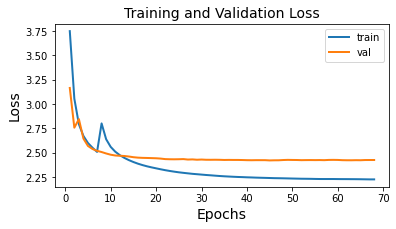

Epoch: 1


Training Epoch 1: 100%|██████████| 144/144 [00:53<00:00,  2.69it/s]


Training loss: 3.7490218066506915


Validation Epoch 1: 100%|██████████| 46/46 [00:15<00:00,  2.91it/s]

Validation loss: 3.1657864010852315


Epoch 2, LR: 0.001
Epoch: 2


Training Epoch 2: 100%|██████████| 144/144 [00:59<00:00,  2.44it/s]


Training loss: 3.0558026648230023


Validation Epoch 2: 100%|██████████| 46/46 [00:16<00:00,  2.85it/s]

Validation loss: 2.7581050914266836


Epoch 3, LR: 0.001
Epoch: 3


Training Epoch 3: 100%|██████████| 144/144 [00:52<00:00,  2.73it/s]


Training loss: 2.794004612498813


Validation Epoch 3: 100%|██████████| 46/46 [00:16<00:00,  2.75it/s]

Validation loss: 2.6151681879292363


Epoch 4, LR: 0.001
Epoch: 4


Training Epoch 4: 100%|██████████| 144/144 [01:10<00:00,  2.03it/s]


Training loss: 2.6735837045643063


Validation Epoch 4: 100%|██████████| 46/46 [00:16<00:00,  2.86it/s]

Validation loss: 2.5651170118995337


Epoch 5, LR: 0.001
Epoch: 5


Training Epoch 5: 100%|██████████| 144/144 [00:54<00:00,  2.67it/s]


Training loss: 2.6007338530487485


Validation Epoch 5: 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

Validation loss: 2.531139612197876


Epoch 6, LR: 0.001
Epoch: 6


Training Epoch 6: 100%|██████████| 144/144 [00:52<00:00,  2.75it/s]


Training loss: 2.552420159180959


Validation Epoch 6: 100%|██████████| 46/46 [00:16<00:00,  2.85it/s]


Validation loss: 2.52223641457765
Epoch 7, LR: 0.001
Epoch: 7


Training Epoch 7: 100%|██████████| 144/144 [00:53<00:00,  2.71it/s]


Training loss: 2.5095666299263635


Validation Epoch 7: 100%|██████████| 46/46 [00:17<00:00,  2.70it/s]

Validation loss: 2.508364781089451


Epoch 8, LR: 0.001
Epoch: 8


Training Epoch 8: 100%|██████████| 144/144 [00:53<00:00,  2.71it/s]


Training loss: 2.48105431927575


Validation Epoch 8: 100%|██████████| 46/46 [00:15<00:00,  2.98it/s]

Validation loss: 2.494169463282046


Epoch 9, LR: 0.001
Epoch: 9


Training Epoch 9: 100%|██████████| 144/144 [00:53<00:00,  2.70it/s]


Training loss: 2.4520947022570505


Validation Epoch 9: 100%|██████████| 46/46 [00:15<00:00,  2.90it/s]


Validation loss: 2.477917018144027
Epoch 10, LR: 0.001
Epoch: 10


Training Epoch 10: 100%|██████████| 144/144 [00:54<00:00,  2.63it/s]


Training loss: 2.4264267798927097


Validation Epoch 10: 100%|██████████| 46/46 [00:17<00:00,  2.70it/s]


Validation loss: 2.470163775526959
Epoch 11, LR: 0.0005
Epoch: 11


Training Epoch 11: 100%|██████████| 144/144 [01:11<00:00,  2.00it/s]


Training loss: 2.401404552989536


Validation Epoch 11: 100%|██████████| 46/46 [00:15<00:00,  3.01it/s]


Validation loss: 2.4701524921085523
Epoch 12, LR: 0.0005
Epoch: 12


Training Epoch 12: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]


Training loss: 2.3880610217650733


Validation Epoch 12: 100%|██████████| 46/46 [00:15<00:00,  2.90it/s]

Validation loss: 2.469284477441207


Epoch 13, LR: 0.0005
Epoch: 13


Training Epoch 13: 100%|██████████| 144/144 [00:52<00:00,  2.77it/s]


Training loss: 2.3766704383823605


Validation Epoch 13: 100%|██████████| 46/46 [00:15<00:00,  2.94it/s]


Validation loss: 2.463481421056001
Epoch 14, LR: 0.0005
Epoch: 14


Training Epoch 14: 100%|██████████| 144/144 [00:52<00:00,  2.72it/s]


Training loss: 2.367363808883561


Validation Epoch 14: 100%|██████████| 46/46 [00:15<00:00,  2.88it/s]


Validation loss: 2.4538917956144912
Epoch 15, LR: 0.0005
Epoch: 15


Training Epoch 15: 100%|██████████| 144/144 [00:53<00:00,  2.72it/s]


Training loss: 2.353379416796896


Validation Epoch 15: 100%|██████████| 46/46 [00:17<00:00,  2.62it/s]

Validation loss: 2.4482689422109853


Epoch 16, LR: 0.0005
Epoch: 16


Training Epoch 16: 100%|██████████| 144/144 [00:53<00:00,  2.68it/s]


Training loss: 2.3446432103713355


Validation Epoch 16: 100%|██████████| 46/46 [00:16<00:00,  2.85it/s]

Validation loss: 2.449926251950471


Epoch 17, LR: 0.0005
Epoch: 17


Training Epoch 17: 100%|██████████| 144/144 [00:52<00:00,  2.76it/s]


Training loss: 2.336323988106516


Validation Epoch 17: 100%|██████████| 46/46 [00:15<00:00,  2.95it/s]


Validation loss: 2.447050177532694
Epoch 18, LR: 0.0005
Epoch: 18


Training Epoch 18: 100%|██████████| 144/144 [00:54<00:00,  2.64it/s]


Training loss: 2.3254276795519724


Validation Epoch 18: 100%|██████████| 46/46 [00:15<00:00,  2.95it/s]

Validation loss: 2.4449590029923813


Epoch 19, LR: 0.0005
Epoch: 19


Training Epoch 19: 100%|██████████| 144/144 [00:53<00:00,  2.68it/s]


Training loss: 2.3150684667958155


Validation Epoch 19: 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]


Validation loss: 2.445630913195403
Epoch 20, LR: 0.0005
Epoch: 20


Training Epoch 20: 100%|██████████| 144/144 [01:10<00:00,  2.04it/s]


Training loss: 2.3090608186191983


Validation Epoch 20: 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

Validation loss: 2.4421871485917466


Epoch 21, LR: 0.00025
Epoch: 21


Training Epoch 21: 100%|██████████| 144/144 [00:53<00:00,  2.70it/s]


Training loss: 2.298259855972396


Validation Epoch 21: 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

Validation loss: 2.4352533972781636


Epoch 22, LR: 0.00025
Epoch: 22


Training Epoch 22: 100%|██████████| 144/144 [00:56<00:00,  2.54it/s]


Training loss: 2.2944711264636783


Validation Epoch 22: 100%|██████████| 46/46 [00:16<00:00,  2.72it/s]

Validation loss: 2.429451693659243


Epoch 23, LR: 0.00025
Epoch: 23


Training Epoch 23: 100%|██████████| 144/144 [00:54<00:00,  2.65it/s]


Training loss: 2.2887014928791256


Validation Epoch 23: 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

Validation loss: 2.437618374824524


Epoch 24, LR: 0.00025
Epoch: 24


Validation Epoch 25: 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

Validation loss: 2.431755833003832


Epoch 26, LR: 0.00025
Epoch: 26


Training Epoch 26: 100%|██████████| 144/144 [00:56<00:00,  2.55it/s]


Training loss: 2.281616883145438


Validation Epoch 26: 100%|██████████| 46/46 [00:19<00:00,  2.33it/s]

Validation loss: 2.4419609722883804


Epoch 27, LR: 0.00025
Epoch: 27


Training Epoch 27: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]


Training loss: 2.273859726058112


Validation Epoch 27: 100%|██████████| 46/46 [00:16<00:00,  2.77it/s]

Validation loss: 2.4194742752158125


Epoch 28, LR: 0.00025
Epoch: 28


Training Epoch 28: 100%|██████████| 144/144 [00:55<00:00,  2.61it/s]


Training loss: 2.269176796078682


Validation Epoch 28: 100%|██████████| 46/46 [00:21<00:00,  2.19it/s]


Validation loss: 2.4364558769309004
Epoch 29, LR: 0.00025
Epoch: 29


Training Epoch 29: 100%|██████████| 144/144 [00:55<00:00,  2.61it/s]


Training loss: 2.267238658335474


Validation Epoch 29: 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

Validation loss: 2.4317408644634746


Epoch 30, LR: 0.00025
Epoch: 30


Training Epoch 30: 100%|██████████| 144/144 [00:53<00:00,  2.69it/s]


Training loss: 2.2628749029503927


Validation Epoch 30: 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

Validation loss: 2.425196559532829


Epoch 31, LR: 0.000125
Epoch: 31


Training Epoch 31: 100%|██████████| 144/144 [00:55<00:00,  2.58it/s]


Training loss: 2.2567383075753846


Validation Epoch 31: 100%|██████████| 46/46 [00:17<00:00,  2.69it/s]


Validation loss: 2.4298484843710195
Epoch 32, LR: 0.000125
Epoch: 32


Training Epoch 32: 100%|██████████| 144/144 [00:55<00:00,  2.59it/s]


Training loss: 2.260022391875585


Validation Epoch 32: 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

Validation loss: 2.43090662230616


Epoch 33, LR: 0.000125
Epoch: 33


Training Epoch 33: 100%|██████████| 144/144 [00:54<00:00,  2.66it/s]


Training loss: 2.2534446004364224


Validation Epoch 33: 100%|██████████| 46/46 [00:18<00:00,  2.52it/s]

Validation loss: 2.426593656125276


Epoch 34, LR: 0.000125
Epoch: 34


Training Epoch 34: 100%|██████████| 144/144 [00:53<00:00,  2.67it/s]


Training loss: 2.2539612617757587


Validation Epoch 34: 100%|██████████| 46/46 [00:16<00:00,  2.80it/s]

Validation loss: 2.427794472030971


Epoch 35, LR: 0.000125
Epoch: 35


Training Epoch 35: 100%|██████████| 144/144 [01:00<00:00,  2.40it/s]


Training loss: 2.2504795690377555


Validation Epoch 35: 100%|██████████| 46/46 [00:15<00:00,  2.93it/s]

Validation loss: 2.4259754160176152


Epoch 36, LR: 0.000125
Epoch: 36


Training Epoch 36: 100%|██████████| 144/144 [01:09<00:00,  2.06it/s]


Training loss: 2.2493309353788695


Validation Epoch 36: 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

Validation loss: 2.42885654905568


Epoch 37, LR: 0.000125
Epoch: 37


Training Epoch 37: 100%|██████████| 144/144 [00:53<00:00,  2.71it/s]


Training loss: 2.2484410852193832


Validation Epoch 37: 100%|██████████| 46/46 [00:15<00:00,  2.91it/s]

Validation loss: 2.4262070863143257


Epoch 38, LR: 0.000125
Epoch: 38


Training Epoch 38: 100%|██████████| 144/144 [00:54<00:00,  2.66it/s]


Training loss: 2.246052356229888


Validation Epoch 38: 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

Validation loss: 2.4260775213656216


Epoch 39, LR: 0.000125
Epoch: 39


Training Epoch 39: 100%|██████████| 144/144 [00:53<00:00,  2.67it/s]


Training loss: 2.2441069376137524


Validation Epoch 39: 100%|██████████| 46/46 [00:15<00:00,  2.92it/s]

Validation loss: 2.426086462062338


Epoch 40, LR: 0.000125
Epoch: 40


Training Epoch 40: 100%|██████████| 144/144 [00:55<00:00,  2.62it/s]


Training loss: 2.2441089236074023


Validation Epoch 40:  11%|█         | 5/46 [00:01<00:13,  2.95it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

Training Epoch 54: 100%|██████████| 144/144 [00:53<00:00,  2.67it/s]


Training loss: 2.229970201022095


Validation Epoch 54: 100%|██████████| 46/46 [00:16<00:00,  2.86it/s]

Validation loss: 2.428267178328141


Epoch 55, LR: 3.125e-05
Epoch: 55


Training Epoch 55: 100%|██████████| 144/144 [00:54<00:00,  2.63it/s]


Training loss: 2.2298333504133754


Validation Epoch 55: 100%|██████████| 46/46 [00:17<00:00,  2.65it/s]

Validation loss: 2.4232973482297813


Epoch 56, LR: 3.125e-05
Epoch: 56


Training Epoch 56: 100%|██████████| 144/144 [00:54<00:00,  2.62it/s]


Training loss: 2.2311154024468527


Validation Epoch 56: 100%|██████████| 46/46 [00:17<00:00,  2.65it/s]

Validation loss: 2.426195668137592


Epoch 57, LR: 3.125e-05
Epoch: 57


Training Epoch 57: 100%|██████████| 144/144 [00:53<00:00,  2.68it/s]


Training loss: 2.2322711249192557


Validation Epoch 57: 100%|██████████| 46/46 [00:18<00:00,  2.44it/s]

Validation loss: 2.4249253376670508


Epoch 58, LR: 3.125e-05
Epoch: 58


Training Epoch 58: 100%|██████████| 144/144 [00:54<00:00,  2.62it/s]


Training loss: 2.230808396306303


Validation Epoch 58: 100%|██████████| 46/46 [00:15<00:00,  2.88it/s]


Validation loss: 2.4305919719778974
Epoch 59, LR: 3.125e-05
Epoch: 59


Training Epoch 59: 100%|██████████| 144/144 [00:54<00:00,  2.66it/s]


Training loss: 2.2315821184052362


Validation Epoch 59: 100%|██████████| 46/46 [00:16<00:00,  2.72it/s]

Validation loss: 2.4277184113212256


Epoch 60, LR: 3.125e-05
Epoch: 60


Training Epoch 60: 100%|██████████| 144/144 [01:00<00:00,  2.39it/s]


Training loss: 2.226611017353005


Validation Epoch 60: 100%|██████████| 46/46 [00:16<00:00,  2.71it/s]

Validation loss: 2.4228749119717143


Epoch 61, LR: 1.5625e-05
Epoch: 61


Training Epoch 61: 100%|██████████| 144/144 [00:55<00:00,  2.61it/s]


Training loss: 2.2307715920938387


Validation Epoch 61: 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

Validation loss: 2.4234105659567793


Epoch 62, LR: 1.5625e-05
Epoch: 62


Training Epoch 62: 100%|██████████| 144/144 [00:58<00:00,  2.46it/s]


Training loss: 2.229310657415125


Validation Epoch 62: 100%|██████████| 46/46 [00:16<00:00,  2.84it/s]

Validation loss: 2.425298887750377


Epoch 63, LR: 1.5625e-05
Epoch: 63


Training Epoch 63: 100%|██████████| 144/144 [00:53<00:00,  2.69it/s]


Training loss: 2.226558050347699


Validation Epoch 63: 100%|██████████| 46/46 [00:16<00:00,  2.82it/s]

Validation loss: 2.42240644019583


Epoch 64, LR: 1.5625e-05
Epoch: 64


Training Epoch 64: 100%|██████████| 144/144 [00:54<00:00,  2.66it/s]


Training loss: 2.228643272485998


Validation Epoch 64: 100%|██████████| 46/46 [00:16<00:00,  2.79it/s]

Validation loss: 2.426311731338501


Epoch 65, LR: 1.5625e-05
Epoch: 65


Training Epoch 65: 100%|██████████| 144/144 [01:12<00:00,  1.98it/s]


Training loss: 2.2278553760714


Validation Epoch 65: 100%|██████████| 46/46 [00:15<00:00,  2.90it/s]


Validation loss: 2.4234563267749287
Epoch 66, LR: 1.5625e-05
Epoch: 66


Training Epoch 66: 100%|██████████| 144/144 [00:59<00:00,  2.41it/s]


Training loss: 2.2248223332895174


Validation Epoch 66: 100%|██████████| 46/46 [00:16<00:00,  2.81it/s]


Validation loss: 2.4285325589387314
Epoch 67, LR: 1.5625e-05
Epoch: 67


Training Epoch 67: 100%|██████████| 144/144 [00:54<00:00,  2.64it/s]


Training loss: 2.225580451389154


Validation Epoch 67: 100%|██████████| 46/46 [00:16<00:00,  2.78it/s]

Validation loss: 2.426887278971465


Epoch 68, LR: 1.5625e-05
Epoch: 68


Training Epoch 68: 100%|██████████| 144/144 [00:55<00:00,  2.61it/s]


Training loss: 2.226427410211828


Validation Epoch 68: 100%|██████████| 46/46 [00:16<00:00,  2.83it/s]

Validation loss: 2.4240040571793267


Epoch 69, LR: 1.5625e-05
Epoch: 69


Training Epoch 69:  92%|█████████▏| 133/144 [00:49<00:04,  2.69it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [16]:
# https://stats.stackexchange.com/questions/352036/what-should-i-do-when-my-neural-network-doesnt-learn
# Optionally introduce gradient clipping
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.25)

fig_loss, ax_loss = plt.subplots(1, 1)
fig_loss.set_figwidth(6)
fig_loss.set_figheight(3)

display_loss = display(1, display_id=True)

optimizer.zero_grad()
# Training loop
for epoch in range(1, 101):
    print(f'Epoch: {epoch}')
    
    loss = train(model, converter, optimizer, train_dl, epoch, loss_obj=criterion, device=device)
    print(f"Training loss: {loss}")
    train_loss_hist.append(loss)
    
    val_loss = test(model, converter, test_dl, epoch, loss_obj=criterion, device=device)
    val_loss_hist.append(val_loss)
    print(f"Validation loss: {val_loss}")
    
    ax_loss.clear()
    plot_loss(train_loss_hist, val_loss_hist, ax=ax_loss)
    display_loss.update(fig_loss)
    time.sleep(1)
    
    scheduler.step()
    print(f"Epoch {epoch+1}, LR: {scheduler.get_last_lr()[0]}")

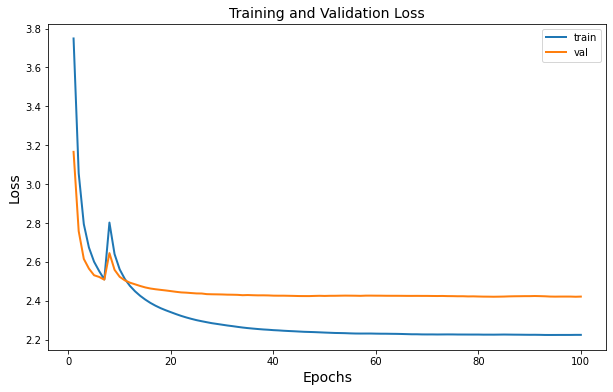

In [17]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(10)
epochs = len(train_loss_hist)
ax.plot(range(1, epochs+1), moving_average(train_loss_hist, 8), label='train', linewidth=2)
ax.plot(range(1, epochs+1), moving_average(val_loss_hist, 8), label='val', linewidth=2)
ax.set_ylabel("Loss", fontsize=14)
ax.set_xlabel("Epochs", fontsize=14)
ax.set_title("Training and Validation Loss", fontsize=14)
ax.legend()

In [ ]:
date = f"{datetime.now():%Y-%m-%d}"
save_model(model, epoch, optimizer, train_loss_hist, val_loss_hist, model_folder, f"tranformer_date_{date}.pt")

## Test Full Event

In [ ]:
from EventGrouping import EventGrouping

In [ ]:
model2 = Transformer(vocab_size, d_model, num_heads, num_layers, d_ff, feature_num, max_nodes, max_seq_length, dropout).to(device)
weights = torch.load("/eos/user/c/czeh/tranformer_4.pt", weights_only=True)
model2.load_state_dict(weights["model_state_dict"])

In [ ]:
runner = EventGrouping(converter, model2, neighborhood=1, seq_length=input_length)
runner(dataset_test.get(0))

In [ ]:
model_feature_keys = np.array([0,  2,  3,  4,  6,  7, 10, 14, 15, 16, 17, 18, 22, 24, 25, 26, 28, 29])
dataset_training.__getitem__(0)[0][:, model_feature_keys][:, -1]

In [ ]:
dataset_test.get(0).cluster

In [ ]:
dataset_training.node_feature_keys[16]

In [ ]:
G = torch_geometric.utils.to_networkx(dataset_test.get(0), to_undirected=True)

In [ ]:
dataset_training.get(0).x[:, 16]

In [ ]:
fig, ax = plt.subplots(1, 1)
nx.draw(G, with_labels=True, ax=ax)

## Random Tests

In [ ]:
targets = dataset_training.__getitem__(0)[2]
mask = targets != -4
mask.unsqueeze(-1)

In [ ]:
targets[targets[:, -1] != -4, :]

In [ ]:
targets[mask].shape[0]/3

In [ ]:
opts = dataset_training.__getitem__(0)[1]
opts = torch.roll(opts, -1, dims=0)
opts[-1] = 5
opts

In [ ]:
out_mask = opts != -4
opts[out_mask].shape[0]

In [ ]:
targets = torch.reshape(targets[mask], (int(targets[mask].shape[0]/3), 3))

In [ ]:
targets[0, :]